In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading in train DataFrame from datasets folder
df = pd.read_csv('./data/train.csv')

# Reading in test DataFrame
fd = pd.read_csv('./data/test.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Dropping irrelevant columns
df.drop(columns=['Id'], inplace=True)
fd.drop(columns=['Id'], inplace=True)

# Functions to facilitate repeated operations

In [4]:
# Function for plotting value_counts() in train and test DataFrames

def val_plotter(series):
    '''
    --purpose--
    Function for plotting value_counts() in TRAIN, TEST of categorical series.
    
    --parameters--
    series: pandas.Series to be explored
    
    --expected output--
    'NaNs in df: 0'
    'NaNs in fd: 0'
    seaborn.pairplot:
       seaborn.barplot, seaborn.barplot
    '''
    print(f'NaNs in df: {df[series].isnull().sum()}')
    print(f'NaNs in fd: {fd[series].isnull().sum()}')
    print(f'value_count() of {series} categories in df, fd')
          
    plt.rcParams['figure.figsize']=(16,5)
    fig, axs = plt.subplots(ncols=2, sharey=True)
    
    sns.barplot(df[series].value_counts().index,
                df[series].value_counts(),
                color='b',
                ax=axs[0])
    sns.barplot(fd[series].value_counts().index,
                fd[series].value_counts(),
                color='b')
    plt.ylabel('Count')
    return fig, axs

In [5]:
def dist_plotter(series):
    '''
    --purpose--
    Function for plotting distribution of numeric series
    (violin, boxplot, histogram, regression)
    
    --parameters--
    series: pandas.Series to be explored
    
    --expected output--
    'NaNs in df: 0'
    'NaNs in fd: 0'
    seaborn.pairplot:
       seaborn.violinplot, seaborn.boxplot,
       seaborn.distplot, seaborn.regplot
    '''
    print(df[series].describe())
    print()
    print(f'NaNs in fd: {fd[series].isnull().sum()}')
    plt.rcParams['figure.figsize']=(16,9)
    fig, axs = plt.subplots(nrows=2, ncols=2)
    sns.violinplot(df[series],
                   orient='v',
                   ax=axs[0,0])
    sns.boxplot(df[series],
                orient='v',
                ax=axs[0,1])
    sns.distplot(df[series],
                 ax=axs[1,0])
    sns.regplot(df[series],
                np.log(df['SalePrice']),
                ax=axs[1,1]);
    return fig, axs

In [6]:
# Function for plotting categoricals and their average sale price, vertically

def bar_plotter(series):
    '''
    --purpose--
    Function for plotting categoricals and their average sale price, vertically
    
    --parameters--
    series: pandas.Series to be explored
    
    --expected output
    matplotlib.pyplot.barh plot with average price shown in red
    '''
    print(f"Overall Average Sale Price: ${round(df['SalePrice'].mean(), 2)}")
    print("(shown in red)")
    plt.rcParams['figure.figsize']=(8,5)
    plt.bar(x=df.groupby(df[series])['SalePrice'].mean().index,
            height=df.groupby(df[series])['SalePrice'].mean())
    plt.ylabel('Sale Price, $')
    plt.title(f'{series} : Average Sale Price')
    plt.axhline(df['SalePrice'].mean(), c='r')
    return plt.bar

In [7]:
def barh_plotter(series):
    '''
    --purpose--
    Function for plotting categoricals and their average sale price, horizontally
    
    --parameters--
    series: pandas.Series to be explored
    
    --expected output
    matplotlib.pyplot.barh plot with average price shown in red 
    '''
    print(f"Overall Average Sale Price: ${round(df['SalePrice'].mean(), 2)}")
    print("(shown in red)")
    plt.rcParams['figure.figsize']=(10, 10)
    plt.barh(y=df.groupby(df[series])['SalePrice'].mean().index,
             width=df.groupby(df[series])['SalePrice'].mean())
    plt.xlabel('Sale Price, $')
    plt.title(f'{series} : Average Sale Price')
    plt.axvline(df['SalePrice'].mean(), c='r')
    return plt.barh

In [8]:
def shape_tester(df,fd):
    '''
    --purpose--
    Testing to ensure TRAIN and TEST DataFrames are valid for modeling,
    commonly used after adding singular features (see dummy_tester
    for testing on multiple features). Specifically, it tests four conditions.
        a: Column length of TRAIN (excluding the label, 'SalePrice') equals
           column length of TEST
        b: No rows have been dropped from TEST
           (remember: rows may only be dropped from TRAIN)
        c: No nulls exist in most recently added column in TRAIN
           (this function is often invoked right after adding singular feature)
        d: No nulls exist in most recently added column in TEST
    
    --parameters--
    df: TRAIN pandas.DataFrame
    fd: TEST pandas.DataFrame
    
    --expected output--
    Test for shape: Passed'
    '''
    condition_a = list(df.drop(columns=['SalePrice']).columns)!=list(fd.columns)
    condition_b = fd.shape[0]!=1459
    condition_c = df[df.columns[-1]].isnull().sum()!=0
    condition_d = fd[fd.columns[-1]].isnull().sum()!=0

    if condition_a:
        print('Column error: TRAIN does not match TEST')
    if condition_b:
        print('Row error: TEST rows have been corrupted')
    if condition_c:
        print('NaN error: NaN in TRAIN series')
    if condition_d:
        print('NaN error: NaN in TEST series')
    
    if not condition_a or condition_b or condition_c or condition_d:
        print('Test for shape: Passed')

    return

In [9]:
def series_dummier(df, fd, series):
    '''
    --purpose--
    Function to create dummy columns in both TRAIN and TEST, while ensuring:
       a: Unique column labels are used
       b: Column lengths of dummied DataFrames are identical
       c: Columns are added in identical order
       d: Original series is dropped from TRAIN, TEST
       e: Dummied DataFrames are joined with TRAIN, TEST
    
    --parameters--
    df: TRAIN DataFrame
    fd: TEST DataFrame
    
    --expected output--
    Columns in TRAIN absent TEST: SalePrice
        
            Category        NaN count      Mean  Corresponds
    0       example one           0    0.009277         True
    1       example two           0    0.049316         True
    2            .                0    0.000488         True
    3            .                0    0.006836         True
    4            .                0    0.779785         True
    5       MS Zoning_RM          0    0.154297         True
    '''
    # Creating dummy DataFrames
    dummy = pd.get_dummies(df[series])
    test = pd.get_dummies(fd[series])
    
#     # Ensuring dummy and test have proper shape
#     if dummy.shape[1] != test.shape[1]:
#         print('ShapeError: TRAIN, TEST dummied DataFrames have incompatible shapes.')
#         print('Run feature_checker(series) to investigate.')
#         return df, fd
    
    # Renaming dummy columns for consistency and uniqueness
    dummy = dummy.rename(columns=lambda x: f'{series}_{x}')
    test = test.rename(columns=lambda x: f'{series}_{x}')
    
    # Dropping dummies that are not shared between TRAIN and TEST
    for i in dummy.columns.values:
        if i not in list(test.columns.values):
            dummy = dummy.drop(columns=[i])
    for i in test.columns.values:
        if i not in list(dummy.columns.values):
            test = test.drop(columns=[i])
    
    # Ensuring proper order
    dummy = dummy[list(test.columns.values)]
    
    # Dropping dummied series
    df.drop(columns=[series], axis=1, inplace=True)
    fd.drop(columns=[series], axis=1, inplace=True)
    
    # Concatenating dummy DataFrame with df, fd
    df = df.join(dummy)
    fd = fd.join(test)
    
    dummy_tester(df,fd,dummy)
    
    return df, fd

In [10]:
def dummy_tester(df,fd,dummy):
    '''
    --purpose--
    This is a function to ensure that dummy transformations do not yield incompatable DataFrames.
    TRAIN and TEST DataFrames require identical columns in the same order
    
    Test for identical columns:
        Expected output: "Columns in TRAIN absent TEST: SalePrice"
        
    Test for NaNs, and to ensure values are not overwritten with 0s:
        Expected output: DataFrame with all zero NaN count, with all nonzero Mean, and all True Corresponds
       
    --parameters--
    df: TRAIN pandas.DataFrame
    fd: TEST pandas.DataFrame
    dummy: pandas.Series to be dummied   
       
    --expected output--
    Columns in TRAIN absent TEST: SalePrice
        
            Category        NaN count      Mean  Corresponds
    0       example one           0    0.009277         True
    1       example two           0    0.049316         True
    2            .                0    0.000488         True
    3            .                0    0.006836         True
    4            .                0    0.779785         True
    5       MS Zoning_RM          0    0.154297         True        
    '''
    
    # Ensuring that the set of columns in df is the set of columns in fd,
    # with the SOLE EXCEPTION being SalePrice, which is what we are trying to predict in fd
    for i in df.columns:
        if i not in fd.columns:
            print(f'Categories in TRAIN absent TEST: {i}')
    for i in fd.columns:
        if i not in df.columns:
            print(f'Categories in TEST absent TRAIN: {i}')
    print()
    
    # Ensuring that no NaNs obtain in dummy columns, and that values are not overwritten with 0s
    val = pd.DataFrame(columns=['Category','NaN count','Mean'])
    val['Category'] = pd.Series(df.columns[-(dummy.shape[1]):])
    val['NaN count'] = pd.Series(df[i].isnull().sum() for i in df.columns[-(dummy.shape[1]):])
    val['Mean'] = pd.Series(df[i].mean() for i in df.columns[-(dummy.shape[1]):])
    val['Corresponds'] = pd.Series(df.columns[-(dummy.shape[1]):]==fd.columns[-(dummy.shape[1]):])
    print(val)
    
    print()
    
    # Esuring that TRAIN has exactly one column more than TEST (SalePrice),
    # and that no rows are dropped from TEST
    if list(df.drop(columns=['SalePrice']).columns)==list(fd.columns) and fd.shape[0]==1459:
        print("Test for shape: Passed")
    elif list(df.drop(columns=['SalePrice']).columns)!=list(fd.columns):
        print("Column Error")
    else:
        print("Row Error")


    return                 

In [11]:
# Function for checking whether there exist categories in df[feature] that are absent fd[feature],
# which would pose problems durring dummying

def feature_checker(df,fd,feature):
    '''Function for checking whether there exist categories in df[feature] that are absent fd[feature],
    which would pose problems durring dummying'''
    
    a = []
    b = []
    for i in df[feature].unique():
        if i not in fd[feature].unique():
            a.append(i)
    for i in fd[feature].unique():
        if i not in df[feature].unique():
            b.append(i)
    print(f"Categories in TRAIN absent TEST: {set(a)}")
    print()
    print(f"Categories in TEST absent TRAIN: {set(b)}")
    return

# EDA

In [12]:
for i in df.columns:
    if df[i].isnull().sum() != 0:
        print(i)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


### MSSubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

NaNs in df: 0
NaNs in fd: 0
value_count() of MSSubClass categories in df, fd


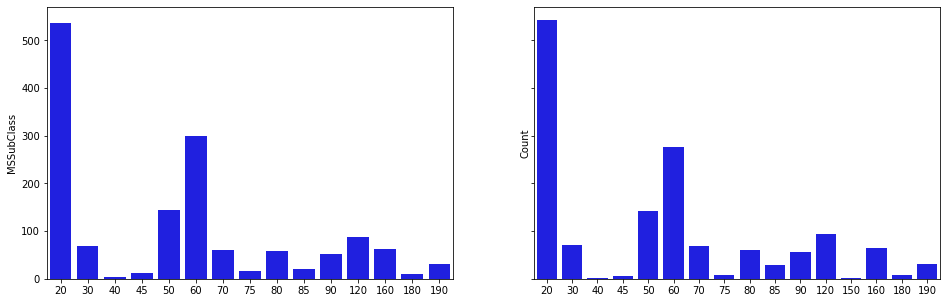

In [13]:
val_plotter('MSSubClass');

In [14]:
feature_checker(df,fd,'MSSubClass')

Categories in TRAIN absent TEST: set()

Categories in TEST absent TRAIN: {150}


In [15]:
df,fd = series_dummier(df,fd,'MSSubClass')

Categories in TRAIN absent TEST: SalePrice

          Category  NaN count      Mean  Corresponds
0    MSSubClass_20          0  0.367123         True
1    MSSubClass_30          0  0.047260         True
2    MSSubClass_40          0  0.002740         True
3    MSSubClass_45          0  0.008219         True
4    MSSubClass_50          0  0.098630         True
5    MSSubClass_60          0  0.204795         True
6    MSSubClass_70          0  0.041096         True
7    MSSubClass_75          0  0.010959         True
8    MSSubClass_80          0  0.039726         True
9    MSSubClass_85          0  0.013699         True
10   MSSubClass_90          0  0.035616         True
11  MSSubClass_120          0  0.059589         True
12  MSSubClass_160          0  0.043151         True
13  MSSubClass_180          0  0.006849         True
14  MSSubClass_190          0  0.020548         True

Test for shape: Passed


### MSZoning (Nominal): Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

NaNs in df: 0
NaNs in fd: 4
value_count() of MSZoning categories in df, fd


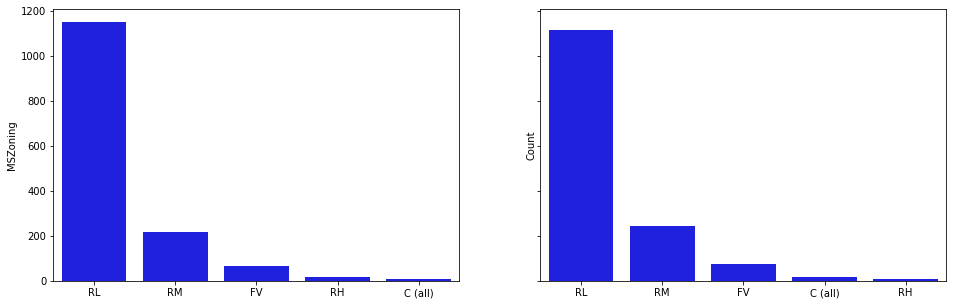

In [16]:
val_plotter('MSZoning');

In [17]:
fd['MSZoning'] = fd['MSZoning'].fillna('missing')

Overall Average Sale Price: $180921.2
(shown in red)


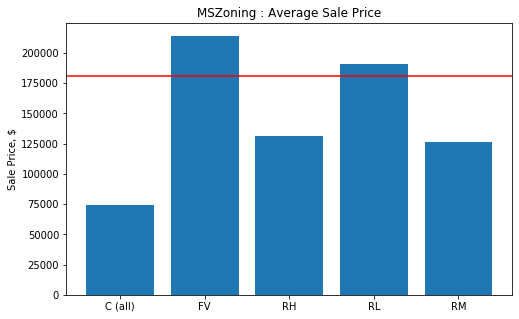

In [18]:
bar_plotter('MSZoning');

In [19]:
df, fd = series_dummier(df,fd,'MSZoning')

Categories in TRAIN absent TEST: SalePrice

           Category  NaN count      Mean  Corresponds
0  MSZoning_C (all)          0  0.006849         True
1       MSZoning_FV          0  0.044521         True
2       MSZoning_RH          0  0.010959         True
3       MSZoning_RL          0  0.788356         True
4       MSZoning_RM          0  0.149315         True

Test for shape: Passed


### LotFrontage (Continuous): Linear feet of street connected to property

In [20]:
print(df['LotFrontage'].isnull().sum())
print(fd['LotFrontage'].isnull().sum())

259
227


In [21]:
# Imputing NaN Lot Footage as average Lot Frontage
#     (Note: I expected that missing Lot Frontage may indicate apartments,
#      but I notice that most of these properties are MSZoned as Residential Low Density (RL))
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
fd['LotFrontage'] = fd['LotFrontage'].fillna(df['LotFrontage'].mean())

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

NaNs in fd: 0


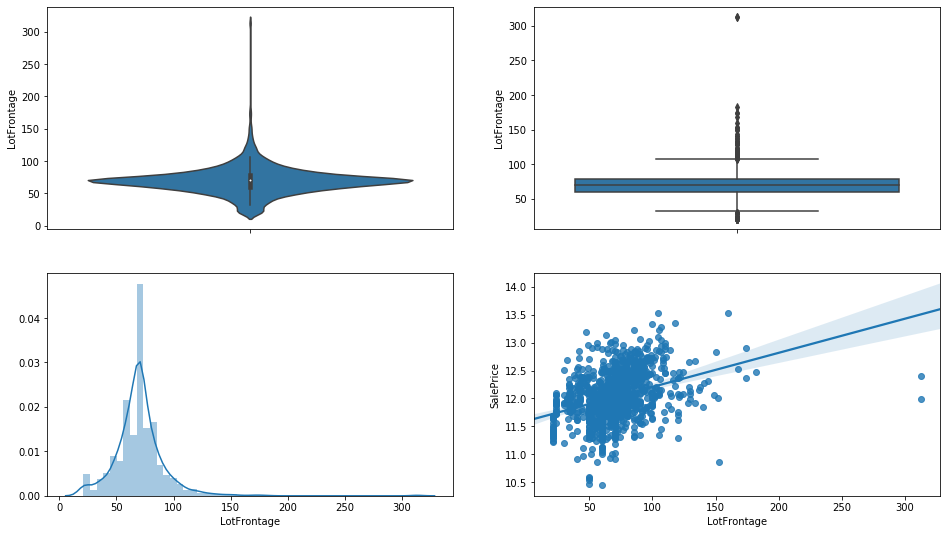

In [22]:
dist_plotter('LotFrontage');

In [23]:
# Removing outliers
df.drop(df[df['LotFrontage']>300].index, inplace = True)

count    1458.000000
mean       69.716694
std        20.114423
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       182.000000
Name: LotFrontage, dtype: float64

NaNs in fd: 0


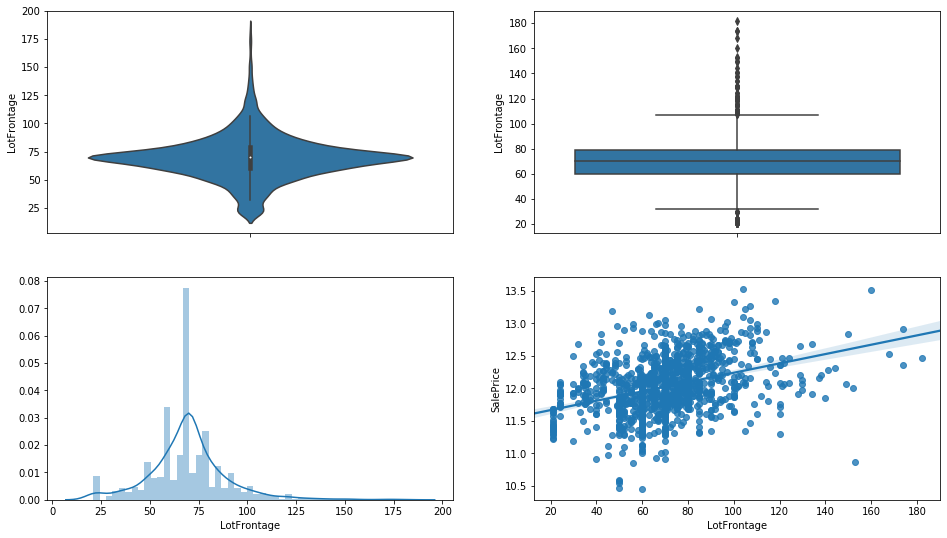

In [24]:
dist_plotter('LotFrontage');

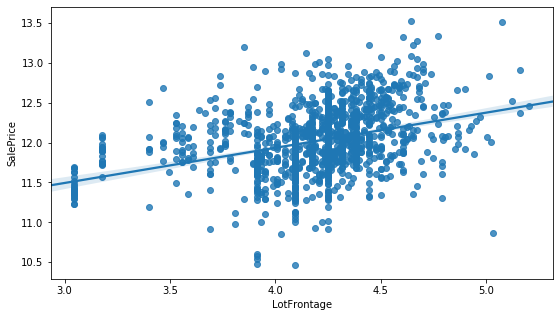

In [25]:
# Plotting the np.log(df['LotFrontage']) to see whether there's better correlation.
plt.figure(figsize=(9,5))
sns.regplot(x=np.log(df['LotFrontage']),
            y=np.log(df['SalePrice']));

In [26]:
# Since np.log(df['LotFrontage']) appears to have more heteroskedacisty,
# we refrain from taking the log of this feature.
shape_tester(df,fd)

Test for shape: Passed


### Lot Area (Continuous): Lot size in square feet

count      1458.000000
mean      10468.471879
std        9879.455077
min        1300.000000
25%        7544.500000
50%        9475.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64

NaNs in fd: 0


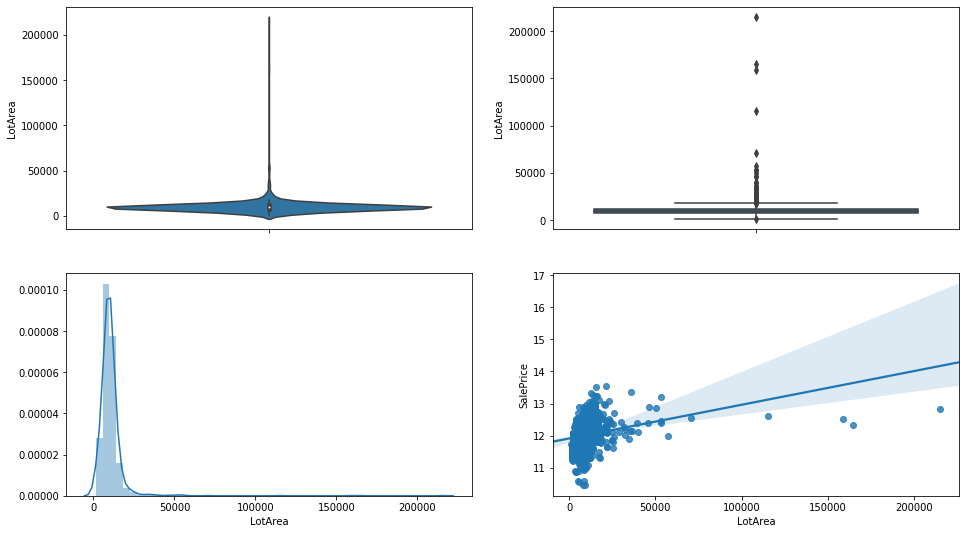

In [27]:
dist_plotter('LotArea');

In [28]:
# Dropping outliers
df.drop(df[df['LotArea']>100_000].index, inplace=True)

count     1454.000000
mean     10047.440165
std       5454.098257
min       1300.000000
25%       7536.250000
50%       9458.500000
75%      11546.250000
max      70761.000000
Name: LotArea, dtype: float64

NaNs in fd: 0


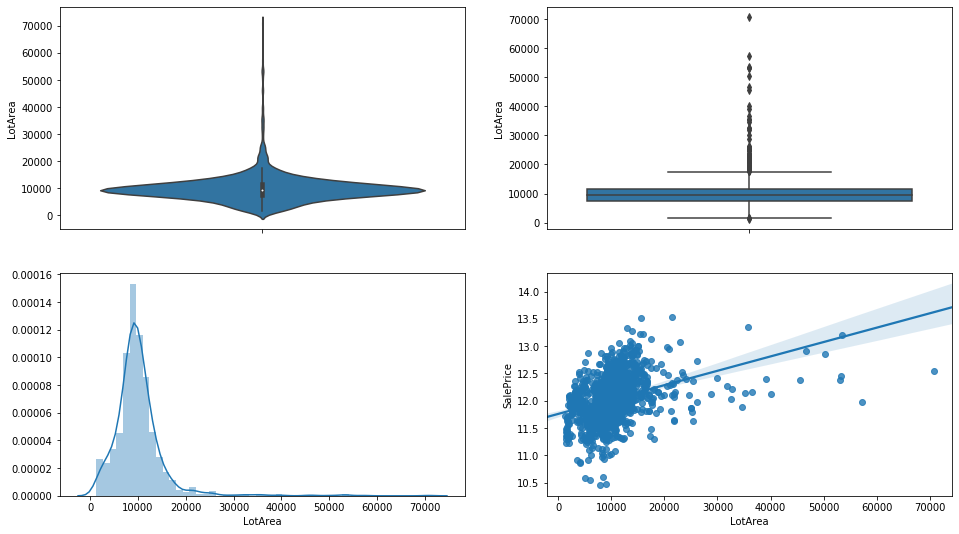

In [29]:
dist_plotter('LotArea');

In [30]:
# Dropping outliers
df = df.drop(df[df['LotArea']>70_000].index)

count     1453.000000
mean     10005.655196
std       5217.975302
min       1300.000000
25%       7535.000000
50%       9453.000000
75%      11526.000000
max      57200.000000
Name: LotArea, dtype: float64

NaNs in fd: 0


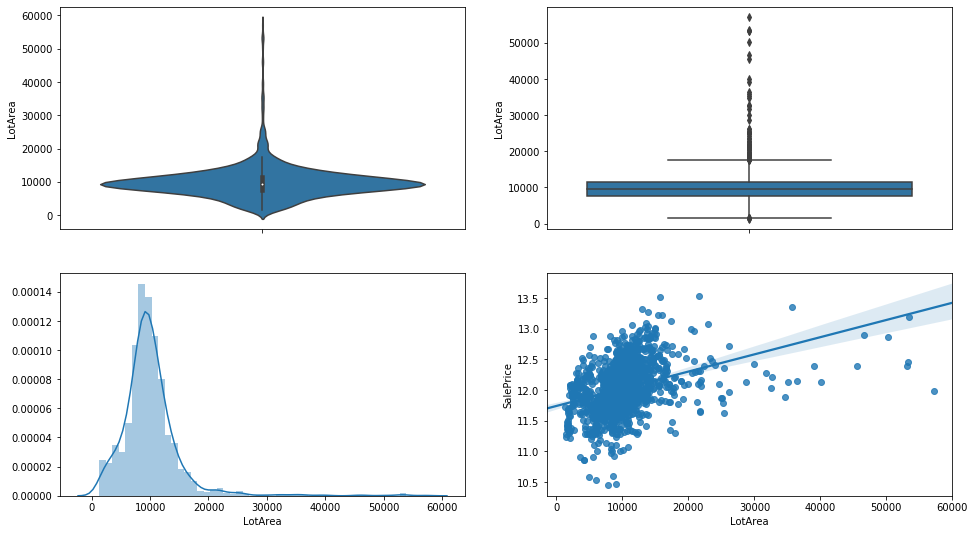

In [31]:
dist_plotter('LotArea');

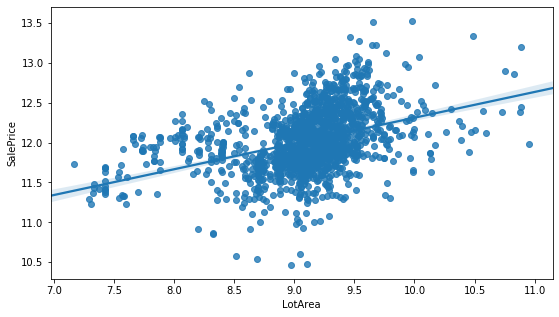

In [32]:
# Plotting the np.log(df['LotFrontage']) to see whether there's better correlation.
plt.figure(figsize=(9,5))
sns.regplot(x=np.log(df['LotArea']),
            y=np.log(df['SalePrice']));

In [33]:
# Taking log of Lot Area to satisfy linear assumptions

df['LotArea'] = np.log(df['LotArea'])
fd['LotArea'] = np.log(fd['LotArea'])

shape_tester(df,fd)

Test for shape: Passed


### Street (Nominal): Type of road access to property

       Grvl	Gravel	
       Pave	Paved

NaNs in df: 0
NaNs in fd: 0
value_count() of Street categories in df, fd


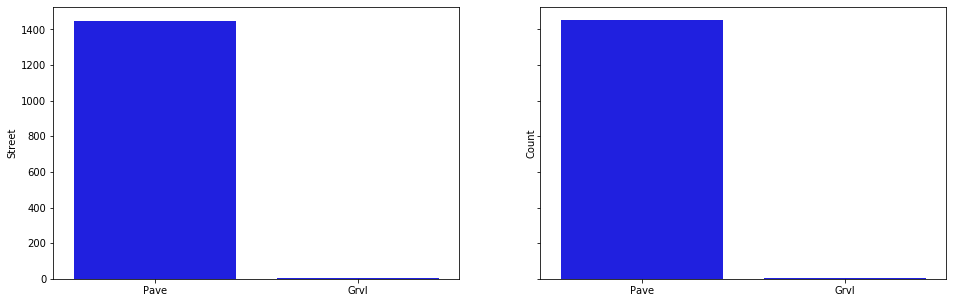

In [34]:
val_plotter('Street');

Overall Average Sale Price: $180509.29
(shown in red)


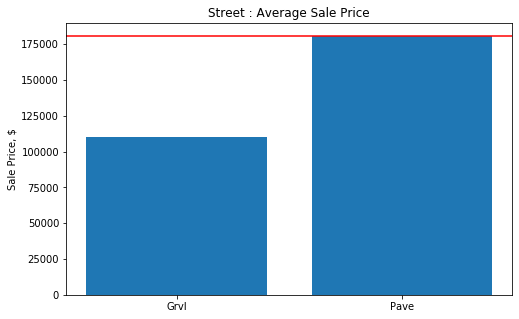

In [35]:
bar_plotter('Street');

In [36]:
df['Street'] = df['Street'].map({'Grvl':1,'Pave':0})
fd['Street'] = fd['Street'].map({'Grvl':1,'Pave':0})

shape_tester(df,fd)

Test for shape: Passed


### Alley (Nominal): Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	 No alley access

NaNs in df: 1362
NaNs in fd: 1352
value_count() of Alley categories in df, fd


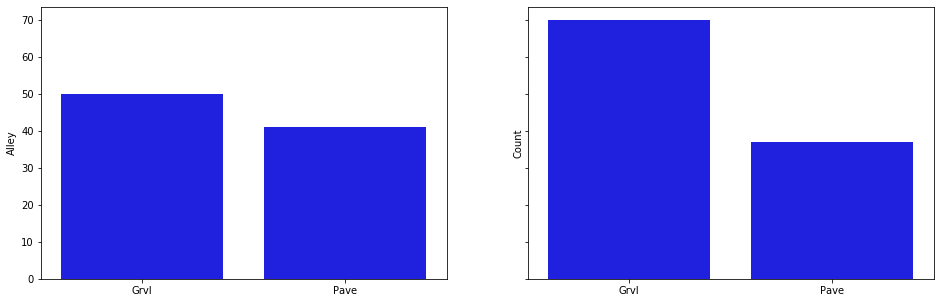

In [37]:
val_plotter('Alley');

In [38]:
# Replacing NaNs with 'no_alley' for consistent dummying
df['Alley'] = df['Alley'].fillna('no_alley')
fd['Alley'] = fd['Alley'].fillna('no_alley')

Overall Average Sale Price: $180509.29
(shown in red)


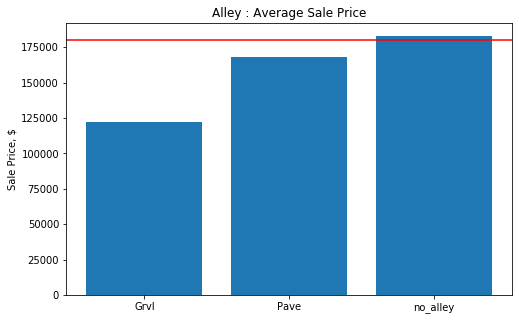

In [39]:
bar_plotter('Alley');

In [40]:
# Not using the function series_dummier() in order to drop the no_alley column.

dummy_series = 'Alley'

# Creating dummy DataFrames
dummy = pd.get_dummies(df[dummy_series])
test = pd.get_dummies(fd[dummy_series])

dummy = dummy.drop(columns=['no_alley'], axis=1)
test = test.drop(columns=['no_alley'], axis=1)

# Renaming dummy columns for uniqueness, and consistency
dummy = dummy.rename(columns=lambda x: f'{dummy_series}_{x}')
test = test.rename(columns=lambda x: f'{dummy_series}_{x}')

# Dropping dummied series
df.drop(columns=[dummy_series], axis=1, inplace=True)
fd.drop(columns=[dummy_series], axis=1, inplace=True)

# Concatenating dummy DataFrame with df
df = pd.concat([df,dummy], axis=1)
fd = pd.concat([fd,test], axis=1)

dummy_tester(df,fd,dummy)

Categories in TRAIN absent TEST: SalePrice

     Category  NaN count      Mean  Corresponds
0  Alley_Grvl          0  0.034412         True
1  Alley_Pave          0  0.028217         True

Test for shape: Passed


### Lot Shape (Ordinal): General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

NaNs in df: 0
NaNs in fd: 0
value_count() of LotShape categories in df, fd


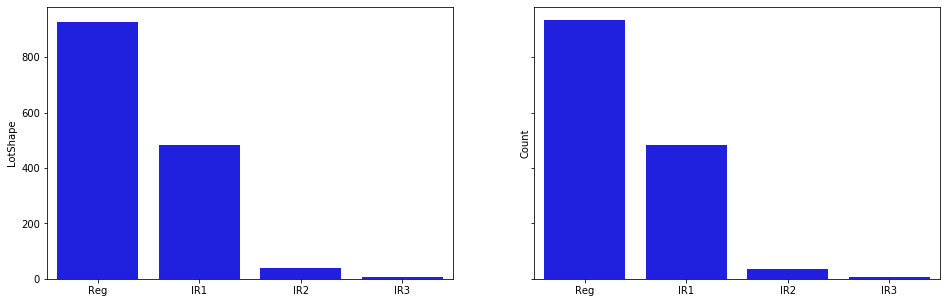

In [41]:
val_plotter('LotShape');

Overall Average Sale Price: $180509.29
(shown in red)


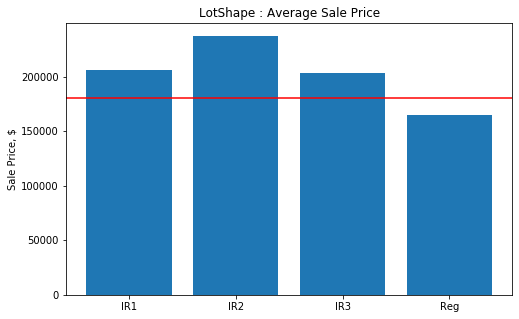

In [42]:
bar_plotter('LotShape');

In [43]:
df.groupby(df['LotShape'])['GrLivArea'].mean().rename_axis('GrLivArea')

GrLivArea
IR1    1624.927386
IR2    1792.842105
IR3    1678.875000
Reg    1438.669189
Name: GrLivArea, dtype: float64

In [44]:
df.groupby(df['LotShape'])['LotArea'].mean().rename_axis('LotArea')

LotArea
IR1    9.270321
IR2    9.581536
IR3    9.638199
Reg    8.985885
Name: LotArea, dtype: float64

In [45]:
df.groupby(df['LotShape'])['OverallQual'].mean().rename_axis('OverallQual')

OverallQual
IR1    6.433610
IR2    6.736842
IR3    6.375000
Reg    5.889730
Name: OverallQual, dtype: float64

In [46]:
# Replacing ordinal Lot Shape with numeric rank
#    (Note: Regular properties tend to have lower selling prices than irregular ones.
#     The regularity of property shape PER SE should indicate higher price,
#     but irregularly shaped properties tend to have bigger plots, lower qual, etc.)

df['LotShape'] = df['LotShape'].map({'Reg':3,
                                       'IR1':2,
                                       'IR2':1,
                                       'IR3':0})
fd['LotShape'] = fd['LotShape'].map({'Reg':3,
                                       'IR1':2,
                                       'IR2':1,
                                       'IR3':0})
shape_tester(df,fd)

Test for shape: Passed


### Land Contour (Nominal): Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

NaNs in df: 0
NaNs in fd: 0
value_count() of LandContour categories in df, fd


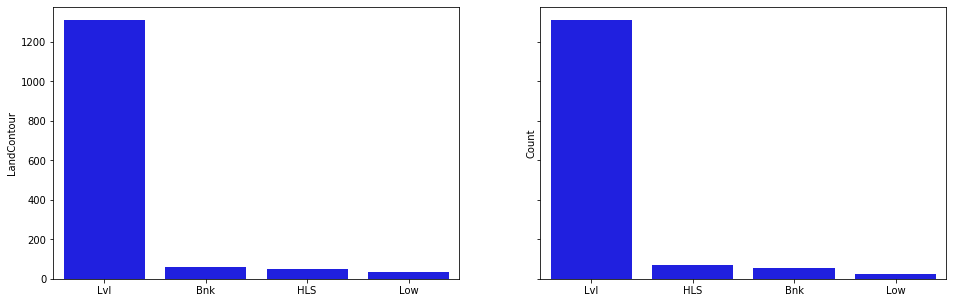

In [47]:
val_plotter('LandContour');

Overall Average Sale Price: $180509.29
(shown in red)


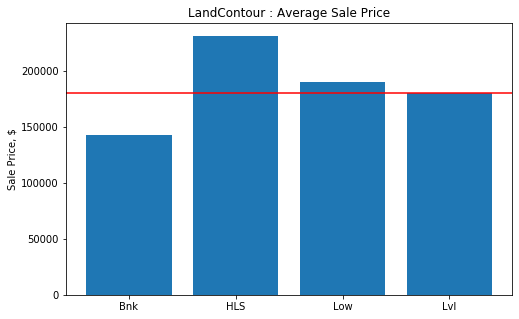

In [48]:
bar_plotter('LandContour');

In [49]:
df, fd = series_dummier(df,fd,'LandContour')

Categories in TRAIN absent TEST: SalePrice

          Category  NaN count      Mean  Corresponds
0  LandContour_Bnk          0  0.042670         True
1  LandContour_HLS          0  0.033035         True
2  LandContour_Low          0  0.022023         True
3  LandContour_Lvl          0  0.902271         True

Test for shape: Passed


### Utilities (Ordinal): Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	   Electricity only

NaNs in df: 0
NaNs in fd: 2
value_count() of Utilities categories in df, fd


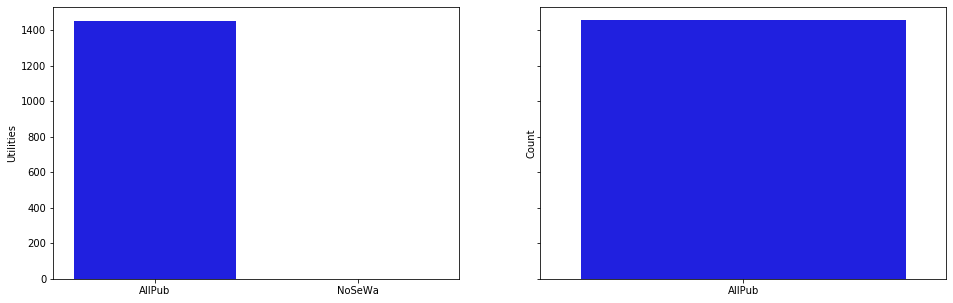

In [50]:
val_plotter('Utilities');

Overall Average Sale Price: $180509.29
(shown in red)


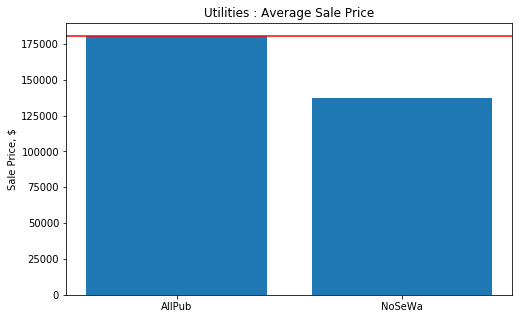

In [51]:
bar_plotter('Utilities');

In [52]:
# Dropping the row in df that does not have AllPub utilities
# (all rows in fd have AllPub utilities)
df = df.drop(df[df['Utilities'] == 'NoSeWa'].index)

In [53]:
# Since there is just one property in fd that lacks all utilities, we drop this feature
df.drop(columns=['Utilities'], inplace=True)
fd.drop(columns=['Utilities'], inplace=True)

### Lot Config (Nominal): Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac   Cul-de-sac
       FR2	   Frontage on 2 sides of property
       FR3	   Frontage on 3 sides of property

NaNs in df: 0
NaNs in fd: 0
value_count() of LotConfig categories in df, fd


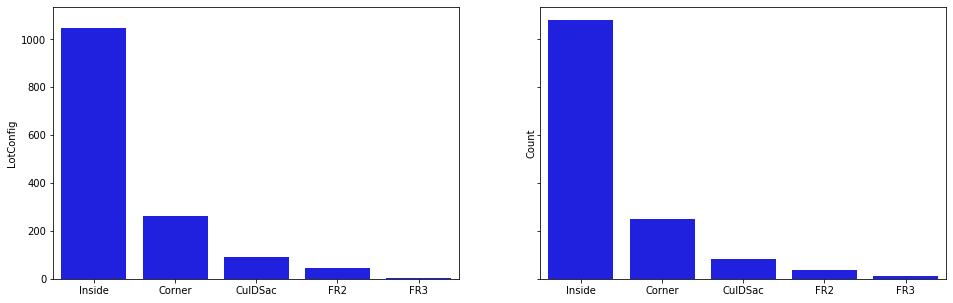

In [54]:
val_plotter('LotConfig');

Overall Average Sale Price: $180538.91
(shown in red)


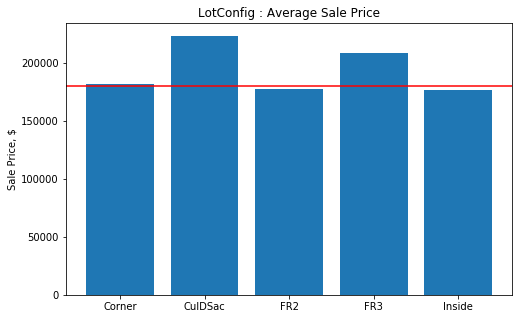

In [55]:
bar_plotter('LotConfig');

In [56]:
df, fd = series_dummier(df,fd,'LotConfig')

Categories in TRAIN absent TEST: SalePrice

            Category  NaN count      Mean  Corresponds
0   LotConfig_Corner          0  0.179752         True
1  LotConfig_CulDSac          0  0.062672         True
2      LotConfig_FR2          0  0.032369         True
3      LotConfig_FR3          0  0.002755         True
4   LotConfig_Inside          0  0.722452         True

Test for shape: Passed


### Land Slope (Ordinal): Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

NaNs in df: 0
NaNs in fd: 0
value_count() of LandSlope categories in df, fd


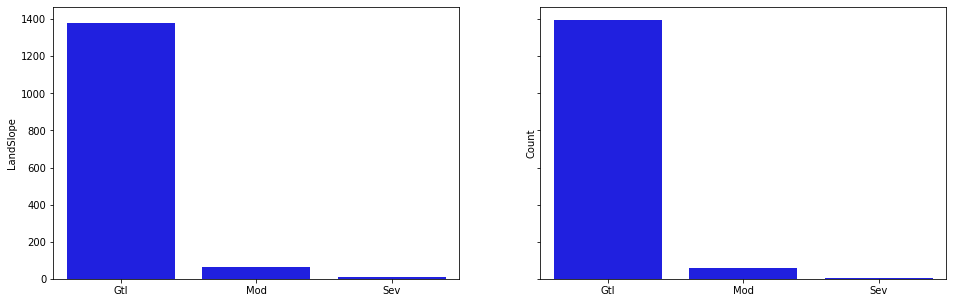

In [57]:
val_plotter('LandSlope');

Overall Average Sale Price: $180538.91
(shown in red)


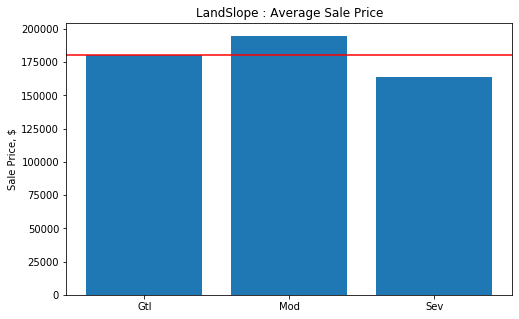

In [58]:
bar_plotter('LandSlope');

In [59]:
df.groupby(df['LandSlope'])['LotArea'].mean().rename_axis('AverageLotArea')

AverageLotArea
Gtl    9.083906
Mod    9.316627
Sev    9.903497
Name: LotArea, dtype: float64

In [60]:
df.groupby(df['LandSlope'])['OverallQual'].mean().rename_axis('AverageQuality')

AverageQuality
Gtl    6.117391
Mod    5.746032
Sev    5.111111
Name: OverallQual, dtype: float64

In [61]:
df['LandSlope'] = df['LandSlope'].map({'Gtl':2,
                                       'Mod':1,
                                       'Sev':0})
fd['LandSlope'] = fd['LandSlope'].map({'Gtl':2,
                                       'Mod':1,
                                       'Sev':0})
shape_tester(df,fd)

Test for shape: Passed


### Neighborhood (Nominal): Physical locations within Ames city limits (map available)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	 Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	 Greens
       GrnHill    Green Hills
       IDOTRR	 Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	  North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	 Northwest Ames
       OldTown	Old Town
       SWISU	  South & West of Iowa State University
       Sawyer	 Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	 Timberland
       Veenker	Veenker

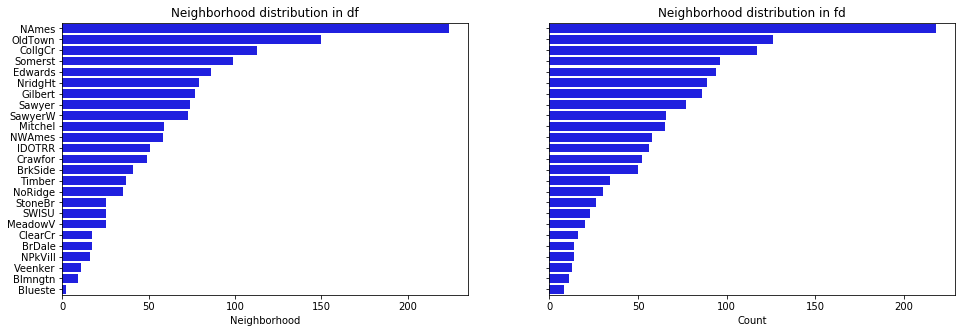

In [62]:
plt.rcParams['figure.figsize']=(16,5)
fig, axs = plt.subplots(ncols=2, sharey=True)
    
sns.barplot(df['Neighborhood'].value_counts(),
            df['Neighborhood'].value_counts().index.values,
            color='b',
            orient='h',
            ax=axs[0])
axs[0].set_title('Neighborhood distribution in df')
sns.barplot(fd['Neighborhood'].value_counts(),
            fd['Neighborhood'].value_counts().index,
            orient='h',
            color='b',
            ax=axs[1])
plt.title('Neighborhood distribution in fd')
plt.xlabel('Count');

In [63]:
feature_checker(df,fd,'Neighborhood')

Categories in TRAIN absent TEST: set()

Categories in TEST absent TRAIN: set()


Overall Average Sale Price: $180538.91
(shown in red)


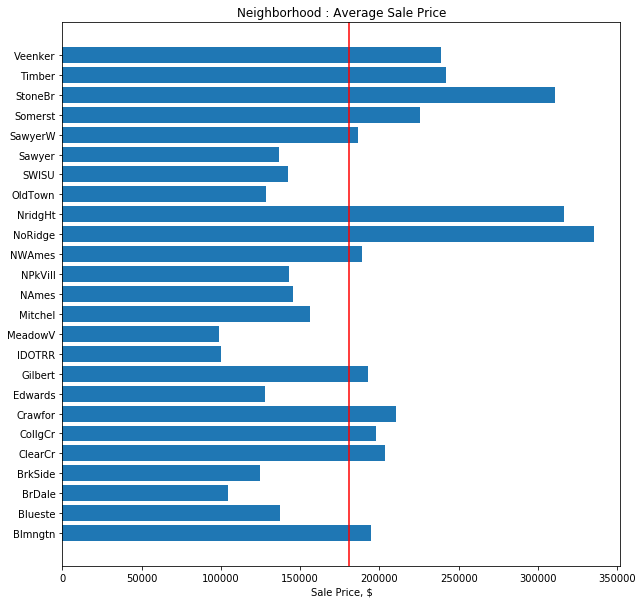

In [64]:
barh_plotter('Neighborhood');

In [65]:
df, fd = series_dummier(df,fd,'Neighborhood')

Categories in TRAIN absent TEST: SalePrice

                Category  NaN count      Mean  Corresponds
0   Neighborhood_Blmngtn          0  0.011708         True
1   Neighborhood_Blueste          0  0.001377         True
2    Neighborhood_BrDale          0  0.011019         True
3   Neighborhood_BrkSide          0  0.039945         True
4   Neighborhood_ClearCr          0  0.017218         True
5   Neighborhood_CollgCr          0  0.103306         True
6   Neighborhood_Crawfor          0  0.035124         True
7   Neighborhood_Edwards          0  0.068182         True
8   Neighborhood_Gilbert          0  0.054408         True
9    Neighborhood_IDOTRR          0  0.025482         True
10  Neighborhood_MeadowV          0  0.011708         True
11  Neighborhood_Mitchel          0  0.033747         True
12    Neighborhood_NAmes          0  0.154270         True
13  Neighborhood_NPkVill          0  0.006198         True
14   Neighborhood_NWAmes          0  0.050275         True
15  Neighbor

### Condition 1 (Nominal): Proximity to various conditions
	
       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
       
### Condition 2 (Nominal): Proximity to various conditions (if more than one is present)

       SAME AS ABOVE

NaNs in df: 0
NaNs in fd: 0
value_count() of Condition1 categories in df, fd


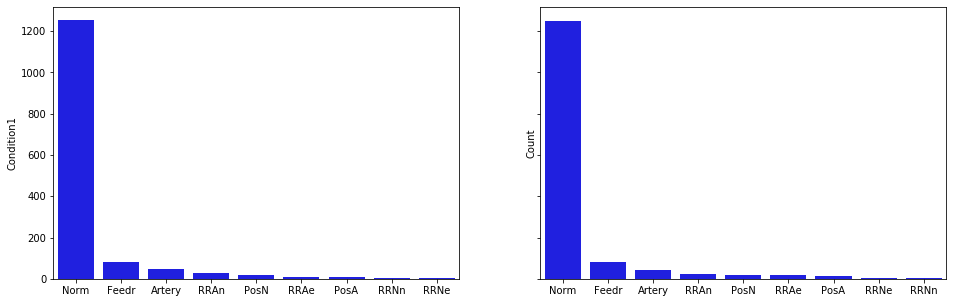

In [66]:
val_plotter('Condition1');

Overall Average Sale Price: $180538.91
(shown in red)


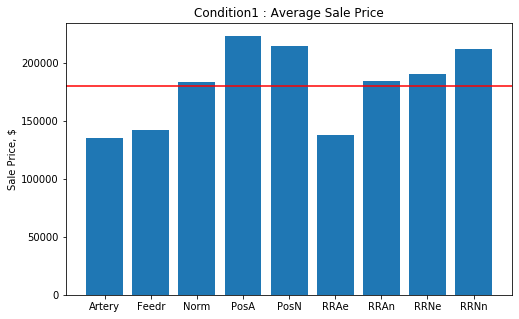

In [67]:
bar_plotter('Condition1');

NaNs in df: 0
NaNs in fd: 0
value_count() of Condition2 categories in df, fd


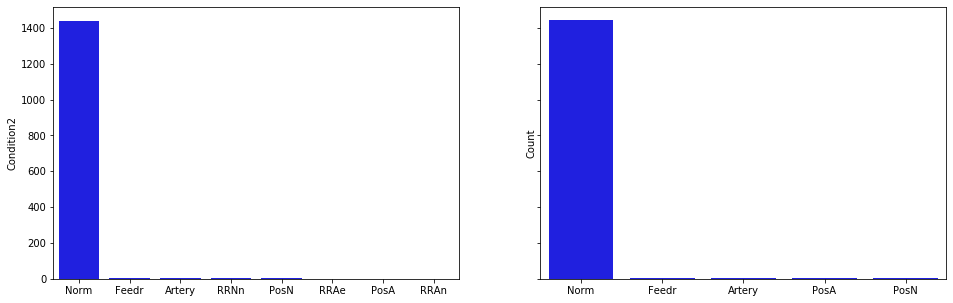

In [68]:
val_plotter('Condition2');

Overall Average Sale Price: $180538.91
(shown in red)


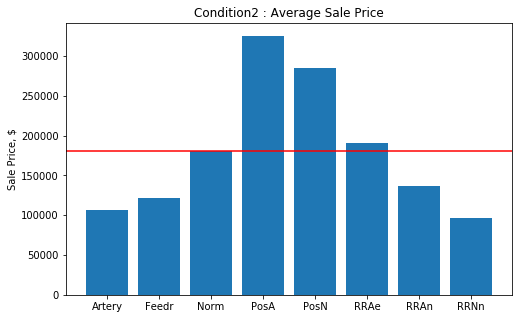

In [69]:
bar_plotter('Condition2');

In [70]:
def conditions(condition):
    if condition == 'PosA':
        return 1
    elif condition == 'PosN':
        return 1
    else:
        return 0

In [71]:
# Creating Conditions series to show proximity to high-value features
df['Conditions'] = df['Condition1'].map(conditions)
fd['Conditions'] = fd['Condition1'].map(conditions)

In [72]:
# Removing Condition 1 and Condition 2 series from df, fd
df = df.drop(columns=['Condition1', 'Condition2'], axis=1)
fd = fd.drop(columns=['Condition1', 'Condition2'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Bldg Type (Nominal): Type of dwelling
		
       1Fam	  Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	 Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

NaNs in df: 0
NaNs in fd: 0
value_count() of BldgType categories in df, fd


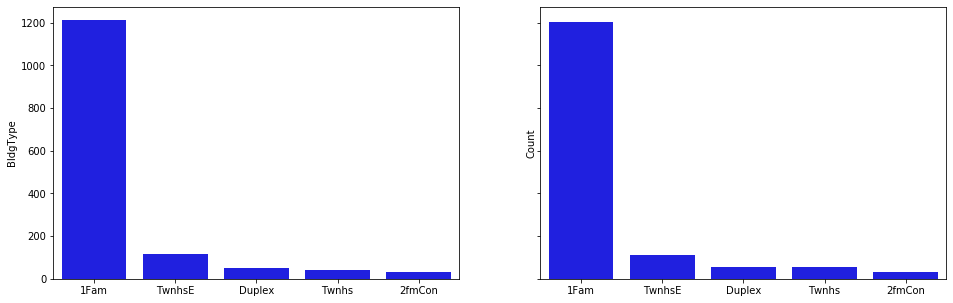

In [73]:
val_plotter('BldgType');

Overall Average Sale Price: $180538.91
(shown in red)


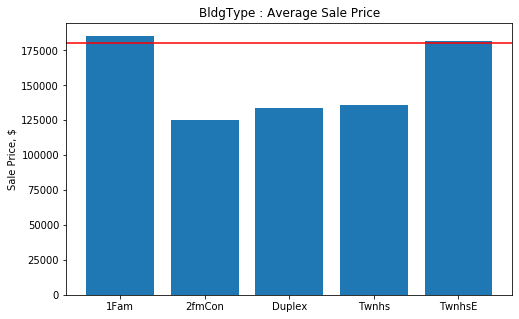

In [74]:
bar_plotter('BldgType');

In [75]:
df,fd = series_dummier(df,fd,'BldgType')

Categories in TRAIN absent TEST: SalePrice

          Category  NaN count      Mean  Corresponds
0    BldgType_1Fam          0  0.835399         True
1  BldgType_2fmCon          0  0.020661         True
2  BldgType_Duplex          0  0.035813         True
3   BldgType_Twnhs          0  0.029614         True
4  BldgType_TwnhsE          0  0.078512         True

Test for shape: Passed


### House Style (Nominal): Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl  	Split Level

NaNs in df: 0
NaNs in fd: 0
value_count() of HouseStyle categories in df, fd


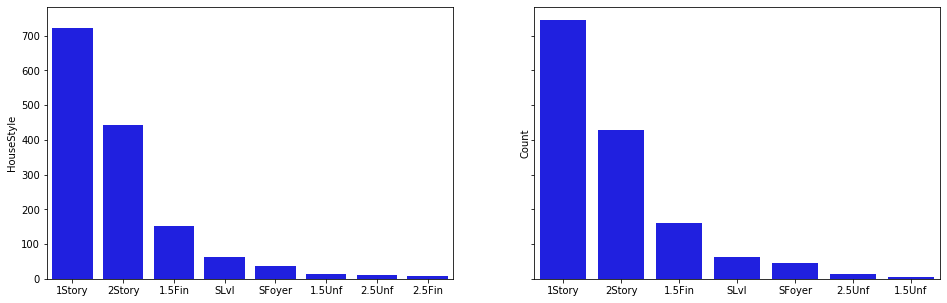

In [76]:
val_plotter('HouseStyle');

Overall Average Sale Price: $180538.91
(shown in red)


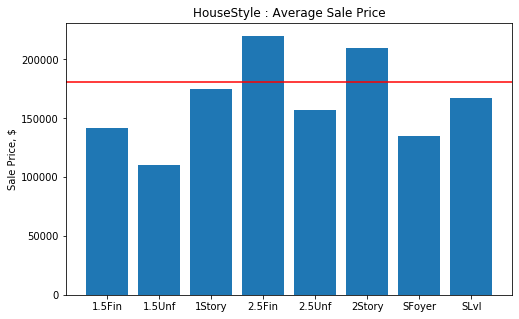

In [77]:
bar_plotter('HouseStyle');

In [78]:
df,fd = series_dummier(df,fd,'HouseStyle')

Categories in TRAIN absent TEST: SalePrice

            Category  NaN count      Mean  Corresponds
0  HouseStyle_1.5Fin          0  0.104683         True
1  HouseStyle_1.5Unf          0  0.009642         True
2  HouseStyle_1Story          0  0.497245         True
3  HouseStyle_2.5Unf          0  0.007576         True
4  HouseStyle_2Story          0  0.305785         True
5  HouseStyle_SFoyer          0  0.025482         True
6    HouseStyle_SLvl          0  0.044077         True

Test for shape: Passed


### Overall Qual (Ordinal): Rates the overall material and finish of the house

       10   Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

count    1452.000000
mean        6.095041
std         1.381896
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

NaNs in fd: 0


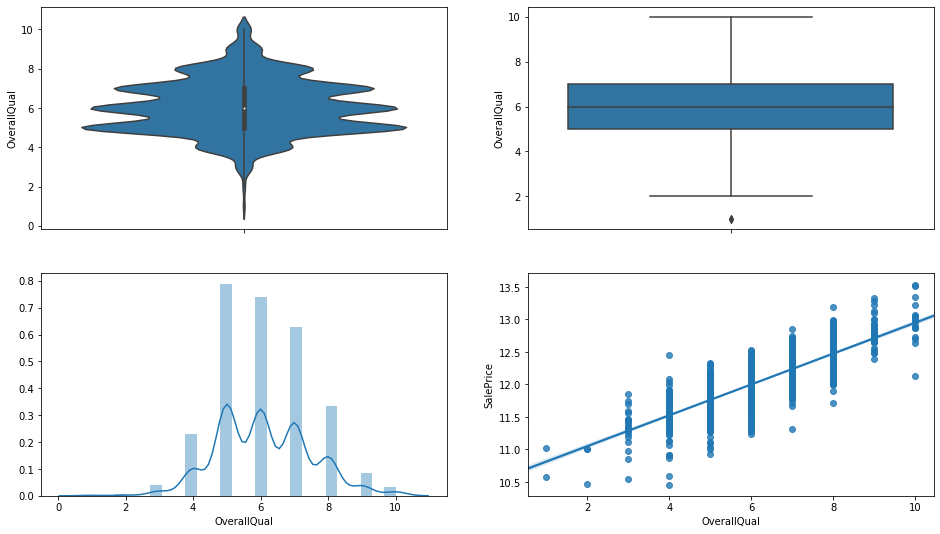

In [79]:
dist_plotter('OverallQual');

Overall Average Sale Price: $180538.91
(shown in red)


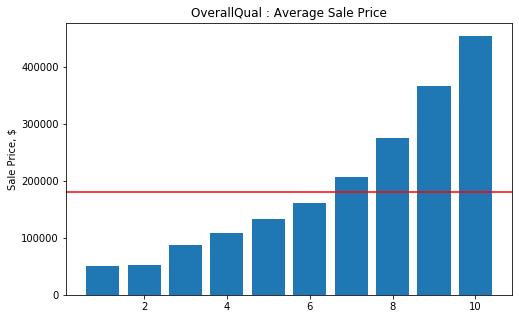

In [80]:
bar_plotter('OverallQual');

### Overall Cond (Ordinal): Rates the overall condition of the house

       10   Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

NaNs in df: 0
NaNs in fd: 0
value_count() of OverallCond categories in df, fd


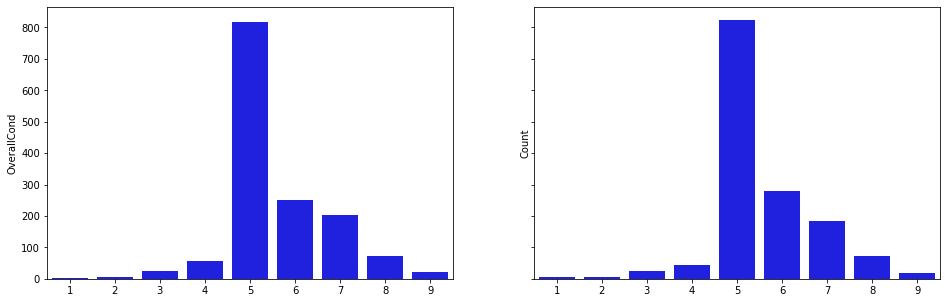

In [81]:
val_plotter('OverallCond');

Overall Average Sale Price: $180538.91
(shown in red)


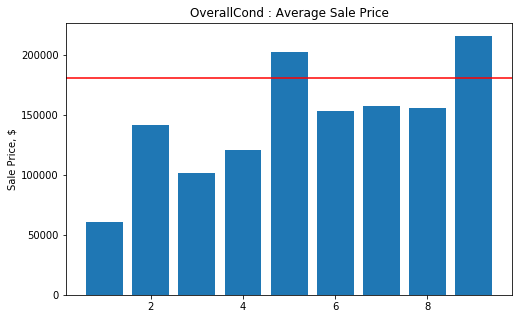

In [82]:
bar_plotter('OverallCond');

In [83]:
for i in df.columns:
    if 'verall' in i:
        print(i)

OverallQual
OverallCond


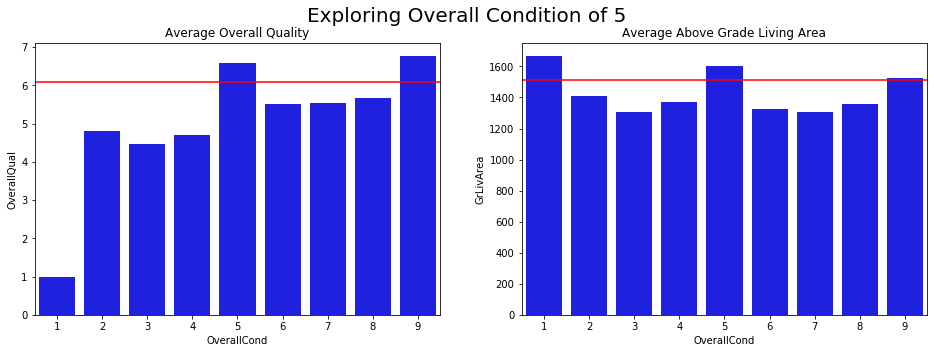

In [84]:
# Investigating why properties of mediocre quality (5) have such high selling prices.
# Assessing whether these properties are associated with other high-value features.

plt.rcParams['figure.figsize']=(16,5)
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Exploring Overall Condition of 5', fontsize=20)

sns.barplot(df.groupby(df['OverallCond'])['OverallQual'].mean().index,
            df.groupby(df['OverallCond'])['OverallQual'].mean(),
            color='b',
            ax=axs[0])
axs[0].set_title('Average Overall Quality')
axs[0].axhline(df['OverallQual'].mean(), c='r')
sns.barplot(fd.groupby(fd['OverallCond'])['GrLivArea'].mean().index,
            fd.groupby(fd['OverallCond'])['GrLivArea'].mean(),
            color='b',
            ax=axs[1])
axs[1].axhline(df['GrLivArea'].mean(), c='r')
plt.title('Average Above Grade Living Area');

### Year Built (Discrete): Original construction date

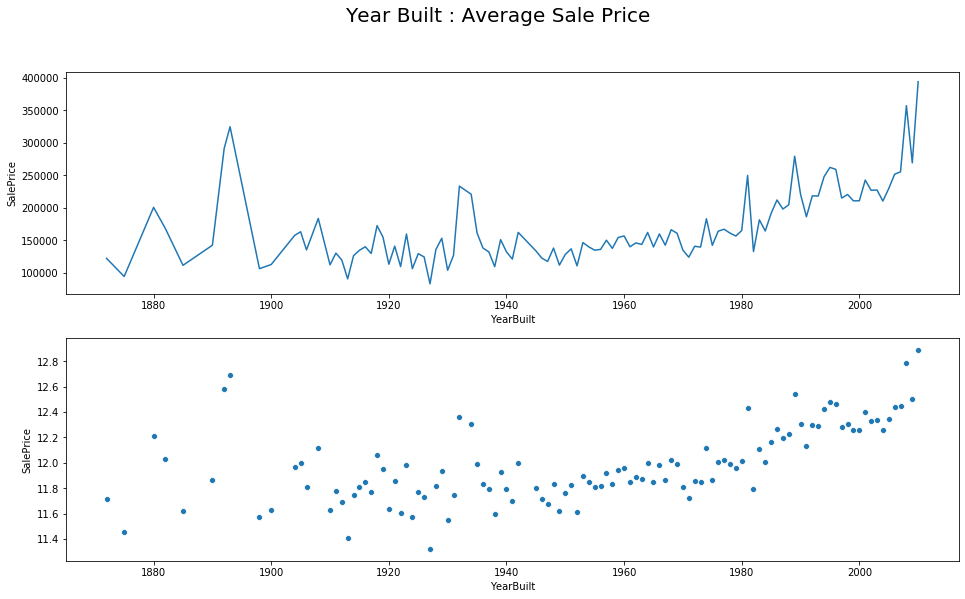

In [85]:
plt.rcParams['figure.figsize']=(16,9)
fig, axs = plt.subplots(nrows=2)
fig.suptitle('Year Built : Average Sale Price', fontsize=20)
    
sns.lineplot(x=df.groupby(df['YearBuilt'])['SalePrice'].mean().index,
             y=df.groupby(df['YearBuilt'])['SalePrice'].mean(),
             ax=axs[0])
sns.scatterplot(x=df.groupby(df['YearBuilt'])['SalePrice'].mean().index,
                y=np.log(df.groupby(df['YearBuilt'])['SalePrice'].mean()),
                ax=axs[1]);

In [86]:
print(f"Mean SalePrice, rennovated: ${round(df[df['YearBuilt']==df['YearRemodAdd']]['SalePrice'].mean(), 2)}")
print(f"Mean SalePrice, non-rennov: ${round(df[df['YearBuilt']!=df['YearRemodAdd']]['SalePrice'].mean(), 2)}")
print(f"Mean SalePrice, in general: ${round(df['SalePrice'].mean(), 2)}")

Mean SalePrice, rennovated: $182229.86
Mean SalePrice, non-rennov: $178686.91
Mean SalePrice, in general: $180538.91


### Year Remod/Add (Discrete): Remodel date
        (same as construction date if no remodeling or additions)

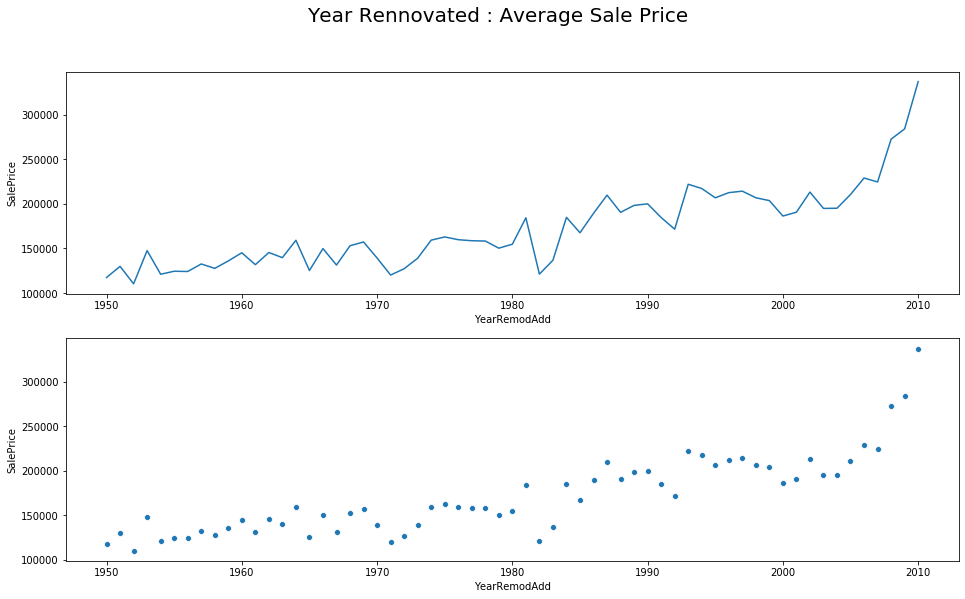

In [87]:
plt.rcParams['figure.figsize']=(16,9)
fig, axs = plt.subplots(nrows=2)
fig.suptitle('Year Rennovated : Average Sale Price', fontsize=20)
    
sns.lineplot(x=df.groupby(df['YearRemodAdd'])['SalePrice'].mean().index,
             y=df.groupby(df['YearRemodAdd'])['SalePrice'].mean(),
             ax=axs[0])
sns.scatterplot(x=df.groupby(df['YearRemodAdd'])['SalePrice'].mean().index,
                y=df.groupby(df['YearRemodAdd'])['SalePrice'].mean(),
                ax=axs[1]);

Overall Average Sale Price: 180538.9090909091
(shown in red)


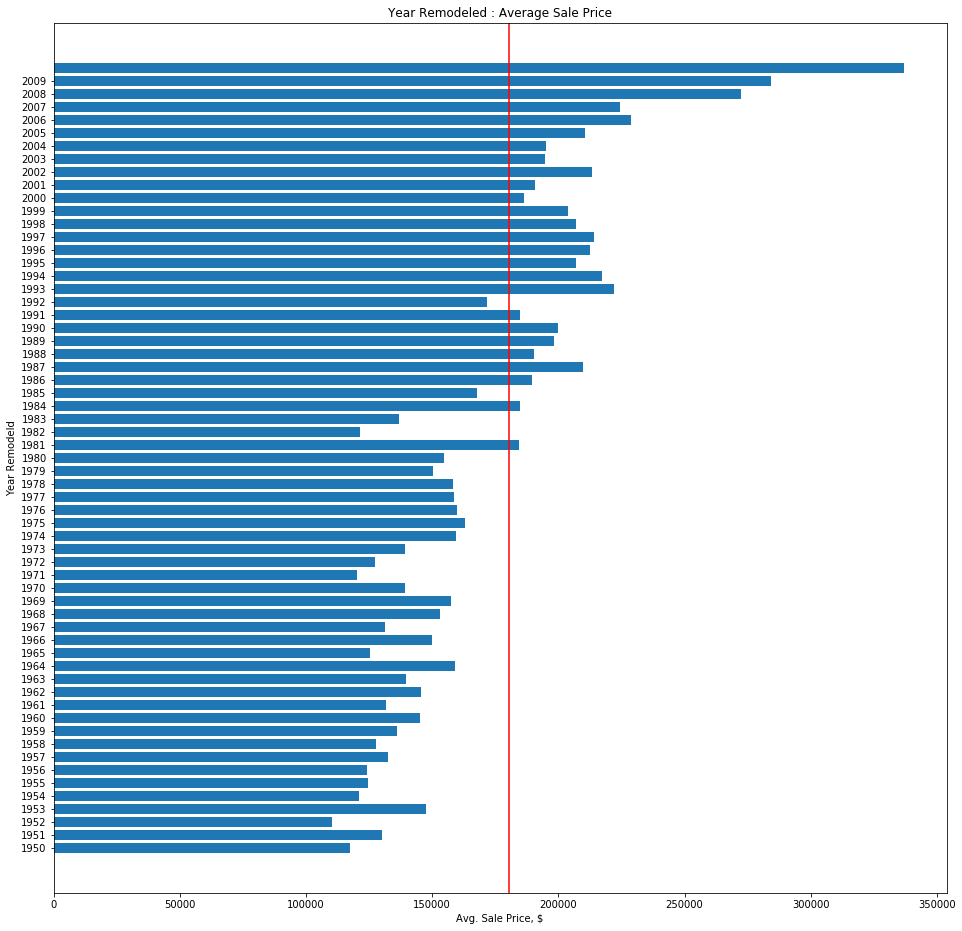

In [88]:
print(f"Overall Average Sale Price: {df['SalePrice'].mean()}")
print('(shown in red)')
plt.figure(figsize=(16,16))
plt.barh(y=df.groupby('YearRemodAdd')['SalePrice'].mean().index,
         width=df.groupby('YearRemodAdd')['SalePrice'].mean())
plt.title('Year Remodeled : Average Sale Price')
plt.yticks(range(df['YearRemodAdd'].min(), df['YearRemodAdd'].max()))
plt.ylabel('Year Remodeld')
plt.xlabel('Avg. Sale Price, $')
plt.axvline(df['SalePrice'].mean(), c='r');

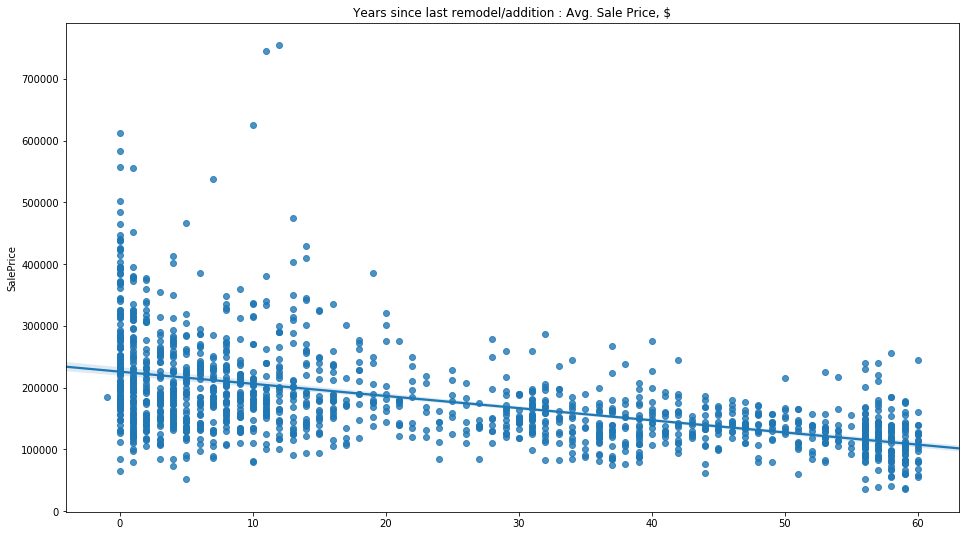

In [89]:
# Showing relationship: Years since last remodel/addition
sns.regplot(x=df['YrSold']-df['YearRemodAdd'],
            y=df['SalePrice'])
plt.title('Years since last remodel/addition : Avg. Sale Price, $');

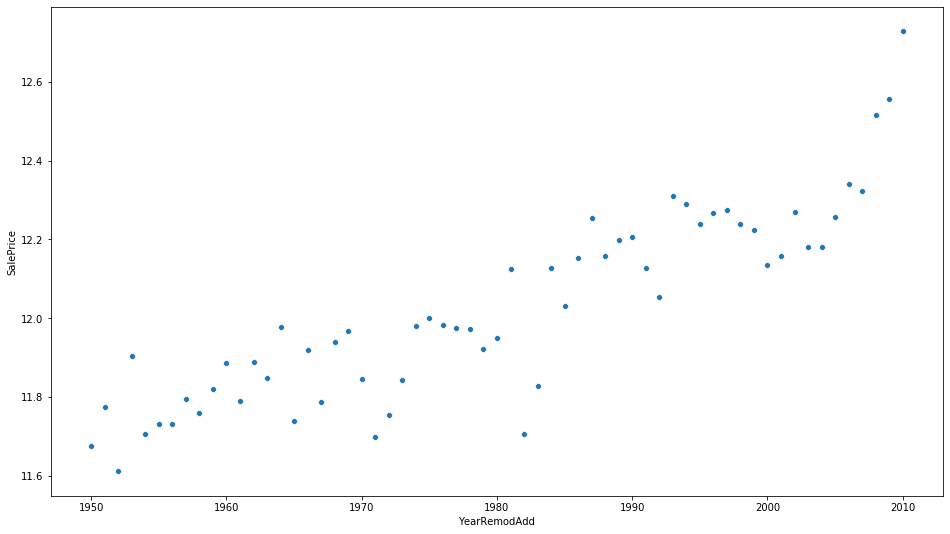

In [90]:
sns.scatterplot(x=df.groupby(['YearRemodAdd'])['SalePrice'].mean().index,
                y=np.log(df.groupby(['YearRemodAdd'])['SalePrice'].mean()));

count    1452.000000
mean     1984.860882
std        20.646009
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

NaNs in fd: 0


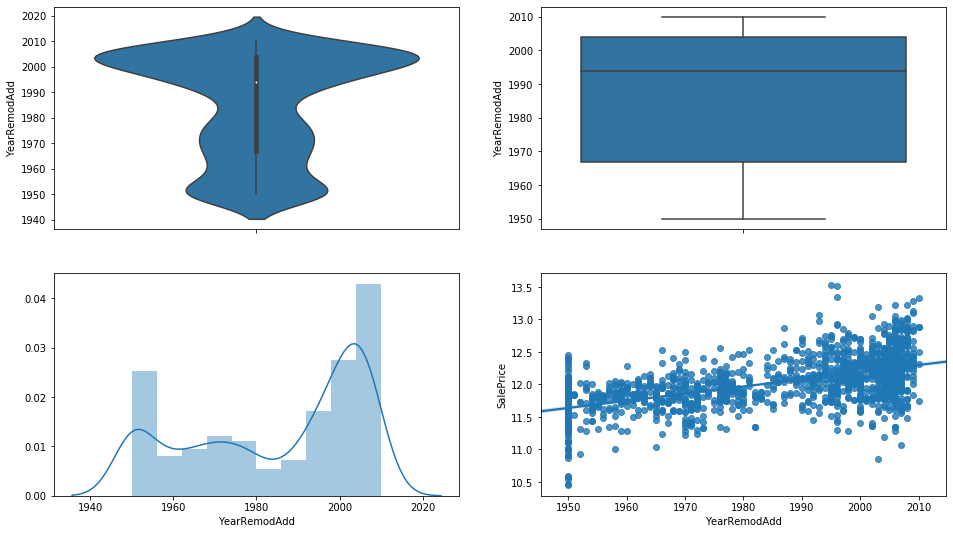

In [91]:
dist_plotter('YearRemodAdd');

In [92]:
# Features are engineered reflecting whether a house was remodeled
# and the time since remodeling.

def remodeled(house):
    if house['YearBuilt'] == house['YearRemodAdd']:
        return 1
    else:
        return 0

def time_since_remodeled(house):
    return house['YrSold']-house['YearRemodAdd']

In [93]:
# Adding binary feature for whether a property was remodeled
df['Remodeled'] = df.apply(lambda house: remodeled(house), axis=1)
fd['Remodeled'] = fd.apply(lambda house: remodeled(house), axis=1)

# Adding continuous feature for timespan between latest remodel and sale
df['TimeSinceRemodel'] = df.apply(lambda house: time_since_remodeled(house), axis=1)
fd['TimeSinceRemodel'] = fd.apply(lambda house: time_since_remodeled(house), axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Roof Style (Nominal): Type of roof

       Flat  	 Flat
       Gable 	 Gable
       Gambrel	Gabrel (Barn)
       Hip	    Hip
       Mansard	Mansard
       Shed	   Shed

NaNs in df: 0
NaNs in fd: 0
value_count() of RoofStyle categories in df, fd


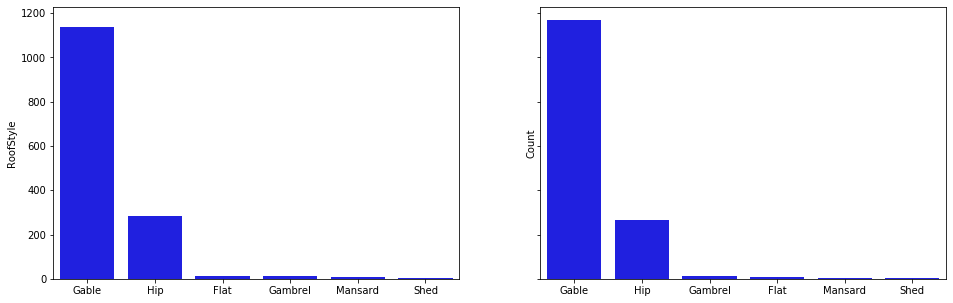

In [94]:
val_plotter('RoofStyle');

Overall Average Sale Price: $180538.91
(shown in red)


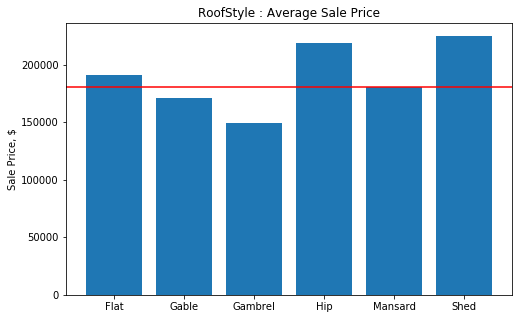

In [95]:
bar_plotter('RoofStyle');

In [96]:
df,fd = series_dummier(df,fd,'RoofStyle')

Categories in TRAIN absent TEST: SalePrice

            Category  NaN count      Mean  Corresponds
0     RoofStyle_Flat          0  0.008264         True
1    RoofStyle_Gable          0  0.782369         True
2  RoofStyle_Gambrel          0  0.007576         True
3      RoofStyle_Hip          0  0.195592         True
4  RoofStyle_Mansard          0  0.004821         True
5     RoofStyle_Shed          0  0.001377         True

Test for shape: Passed


### Roof Matl (Nominal): Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	  Metal
       Roll	   Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

NaNs in df: 0
NaNs in fd: 0
value_count() of RoofMatl categories in df, fd


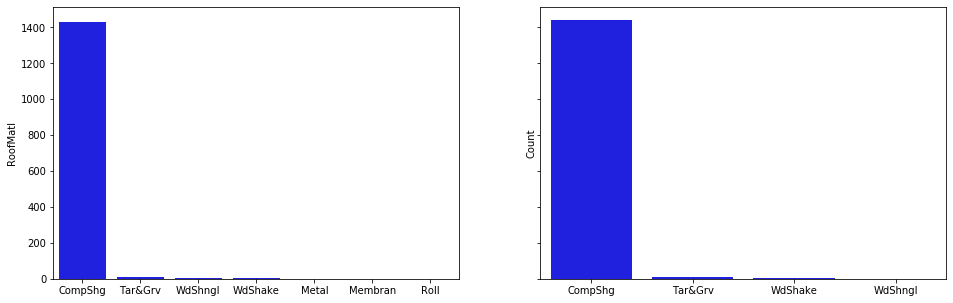

In [97]:
val_plotter('RoofMatl');

Overall Average Sale Price: $180538.91
(shown in red)


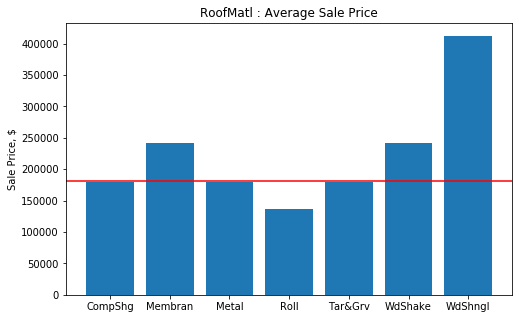

In [98]:
bar_plotter('RoofMatl');

In [99]:
df, fd = series_dummier(df,fd,'RoofMatl')

Categories in TRAIN absent TEST: SalePrice

           Category  NaN count      Mean  Corresponds
0  RoofMatl_CompShg          0  0.984160         True
1  RoofMatl_Tar&Grv          0  0.006887         True
2  RoofMatl_WdShake          0  0.003444         True
3  RoofMatl_WdShngl          0  0.003444         True

Test for shape: Passed


### Exterior 1st (Nominal): Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone      Stone
       Stucco 	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
### Exterior 2nd (Nominal): Exterior covering on house

       (same)

NaNs in df: 0
NaNs in fd: 1
value_count() of Exterior1st categories in df, fd


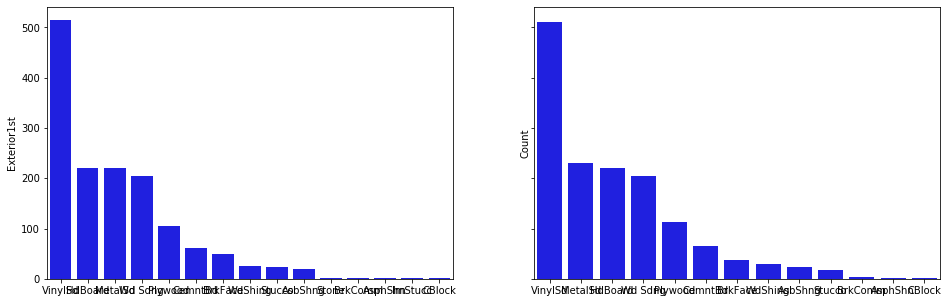

In [100]:
val_plotter('Exterior1st');

In [101]:
feature_checker(df,fd,'Exterior1st')

Categories in TRAIN absent TEST: {'ImStucc', 'Stone'}

Categories in TEST absent TRAIN: {nan}


In [102]:
# Filling NaN in fd with the most common category
fd['Exterior1st'] = fd['Exterior1st'].fillna('VinylSd')

Overall Average Sale Price: $180538.91
(shown in red)


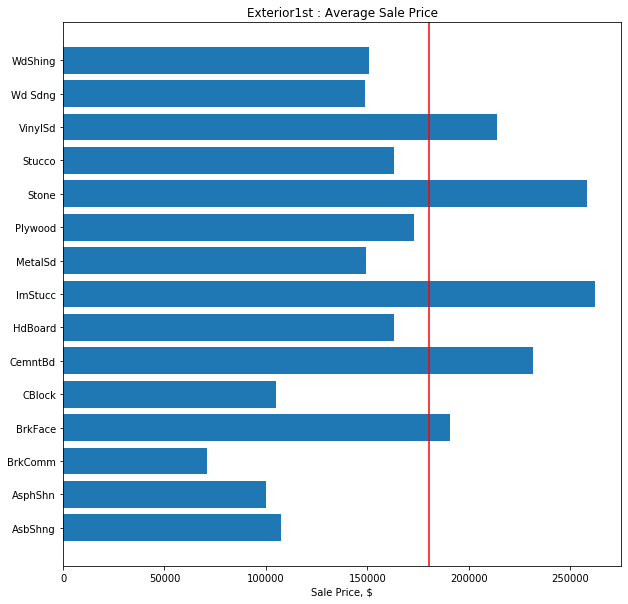

In [103]:
barh_plotter('Exterior1st');

In [104]:
df,fd = series_dummier(df,fd,'Exterior1st')

Categories in TRAIN absent TEST: SalePrice

               Category  NaN count      Mean  Corresponds
0   Exterior1st_AsbShng          0  0.013774         True
1   Exterior1st_AsphShn          0  0.000689         True
2   Exterior1st_BrkComm          0  0.001377         True
3   Exterior1st_BrkFace          0  0.033747         True
4    Exterior1st_CBlock          0  0.000689         True
5   Exterior1st_CemntBd          0  0.042011         True
6   Exterior1st_HdBoard          0  0.152204         True
7   Exterior1st_MetalSd          0  0.151515         True
8   Exterior1st_Plywood          0  0.072314         True
9    Exterior1st_Stucco          0  0.016529         True
10  Exterior1st_VinylSd          0  0.354683         True
11  Exterior1st_Wd Sdng          0  0.140496         True
12  Exterior1st_WdShing          0  0.017906         True

Test for shape: Passed


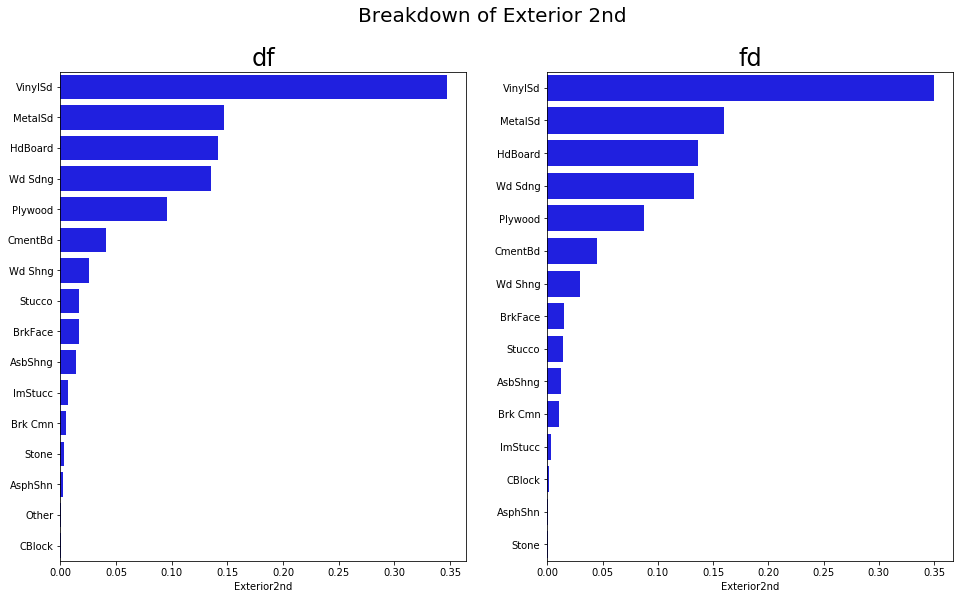

In [105]:
plt.rcParams['figure.figsize']=(16,9)
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Breakdown of Exterior 2nd', fontsize=20)
    
sns.barplot(x=df['Exterior2nd'].value_counts(normalize=True),
            y=df['Exterior2nd'].value_counts().index,
            orient = 'h',
            color='b',
            ax=axs[0])
axs[0].set_title('df', fontsize=24)
sns.barplot(x=fd['Exterior2nd'].value_counts(normalize=True),
            y=fd['Exterior2nd'].value_counts().index,
            orient = 'h',
            color='b',
            ax=axs[1])
axs[1].set_title('fd', fontsize=24);

Overall Average Sale Price: $180538.91
(shown in red)


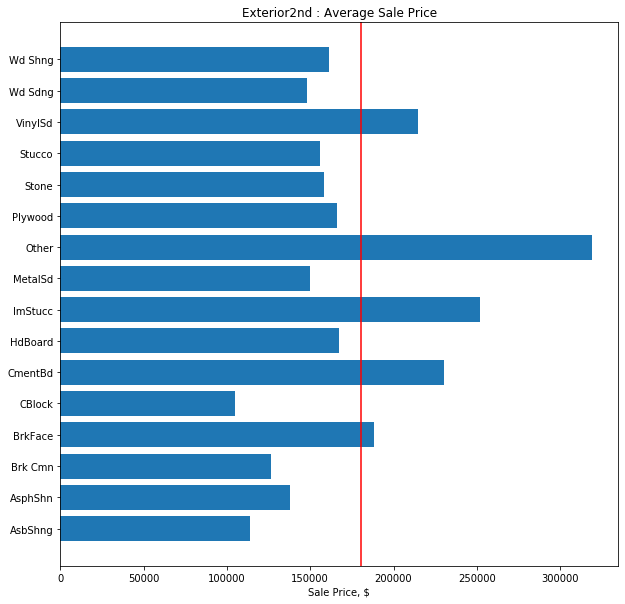

In [106]:
barh_plotter('Exterior2nd');

In [107]:
df,fd = series_dummier(df,fd,'Exterior2nd')

Categories in TRAIN absent TEST: SalePrice

               Category  NaN count      Mean  Corresponds
0   Exterior2nd_AsbShng          0  0.013774         True
1   Exterior2nd_AsphShn          0  0.002066         True
2   Exterior2nd_Brk Cmn          0  0.004821         True
3   Exterior2nd_BrkFace          0  0.016529         True
4    Exterior2nd_CBlock          0  0.000689         True
5   Exterior2nd_CmentBd          0  0.041322         True
6   Exterior2nd_HdBoard          0  0.141185         True
7   Exterior2nd_ImStucc          0  0.006887         True
8   Exterior2nd_MetalSd          0  0.147383         True
9   Exterior2nd_Plywood          0  0.095730         True
10    Exterior2nd_Stone          0  0.003444         True
11   Exterior2nd_Stucco          0  0.017218         True
12  Exterior2nd_VinylSd          0  0.347107         True
13  Exterior2nd_Wd Sdng          0  0.134986         True
14  Exterior2nd_Wd Shng          0  0.026171         True

Test for shape: Passed


### Mas Vnr Type (Nominal): Masonry veneer type

       BrkCmn	Brick Common
       BrkFace   Brick Face
       CBlock	Cinder Block
       None	  None
       Stone	 Stone

NaNs in df: 8
NaNs in fd: 16
value_count() of MasVnrType categories in df, fd


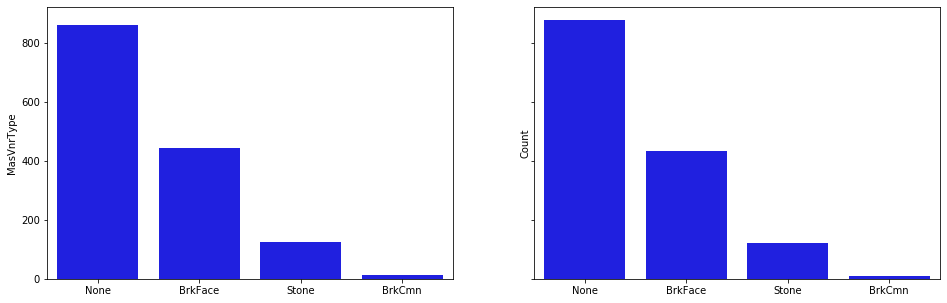

In [108]:
val_plotter('MasVnrType');

Overall Average Sale Price: $180538.91
(shown in red)


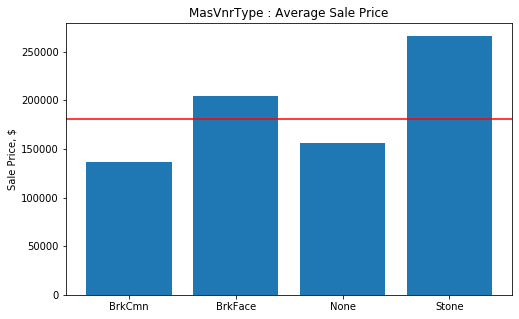

In [109]:
bar_plotter('MasVnrType');

In [110]:
print(f"Avg. Sale Price for NaNs: ${round(df.groupby(df['MasVnrType'].isnull())['SalePrice'].mean()[True],2)}")

Avg. Sale Price for NaNs: $236484.25


In [111]:
# Since Avg. Sale Price for MasVnrType: NaN differs much from that of MasVnrType: None, 
# this category (NaN) is likely unrelated to an absent MasVnrType,
# and is treated as distinct category

df['MasVnrType'] = df['MasVnrType'].fillna('missing')
fd['MasVnrType'] = fd['MasVnrType'].fillna('missing')

Overall Average Sale Price: $180538.91
(shown in red)


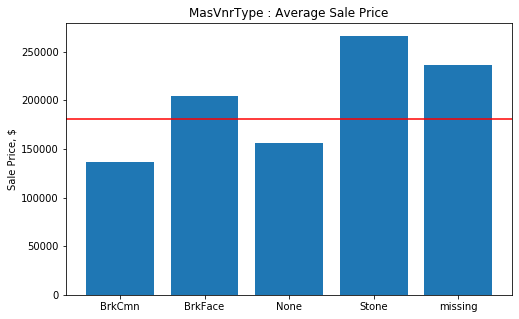

In [112]:
bar_plotter('MasVnrType');

In [113]:
feature_checker(df,fd,'MasVnrType')

Categories in TRAIN absent TEST: set()

Categories in TEST absent TRAIN: set()


In [114]:
df,fd = series_dummier(df,fd,'MasVnrType')

Categories in TRAIN absent TEST: SalePrice

             Category  NaN count      Mean  Corresponds
0   MasVnrType_BrkCmn          0  0.009642         True
1  MasVnrType_BrkFace          0  0.305785         True
2     MasVnrType_None          0  0.592287         True
3    MasVnrType_Stone          0  0.086777         True
4  MasVnrType_missing          0  0.005510         True

Test for shape: Passed


### Mas Vnr Area (Continuous): Masonry veneer area in square feet

In [115]:
print(f"NaNs in Train: {df['MasVnrArea'].isnull().sum()}")
print(f"NaNs in Test: {fd['MasVnrArea'].isnull().sum()}")

NaNs in Train: 8
NaNs in Test: 15


In [116]:
print(f"Missing MasVnrArea Avg. Sale Price : ${df[df['MasVnrArea'].isnull()]['SalePrice'].mean()}")
print(f"Zero MasVnrArea Avg. Sale Price    : ${round(df[df['MasVnrArea']==0]['SalePrice'].mean(), 2)}")

Missing MasVnrArea Avg. Sale Price : $236484.25
Zero MasVnrArea Avg. Sale Price    : $155974.84


In [117]:
# Since Avg. Sale Price for MasVnrArea: NaN differs much from that of MasVnrArea: 0, 
# this value (NaN) is likely unrelated to zero MasVnrArea, so we impute the mean value
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
fd['MasVnrArea'] = fd['MasVnrArea'].fillna(fd['MasVnrArea'].mean())

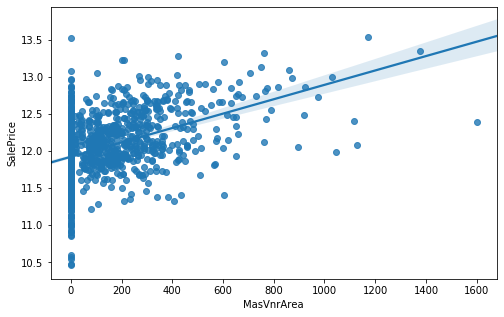

In [118]:
plt.figure(figsize=(8,5))
sns.regplot(df['MasVnrArea'],
            np.log(df['SalePrice']));

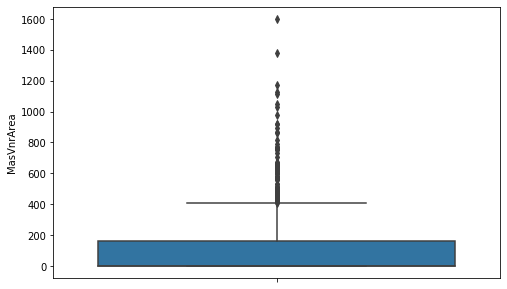

In [119]:
plt.figure(figsize=(8,5))
sns.boxplot(df['MasVnrArea'], orient='v');

In [120]:
df.drop(df[df['MasVnrArea']>1300].index, inplace=True)

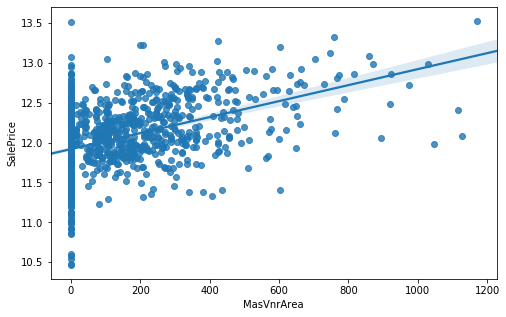

In [121]:
sns.regplot((df['MasVnrArea']),
            np.log(df['SalePrice']));

### Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

NaNs in df: 0
NaNs in fd: 0
value_count() of ExterQual categories in df, fd


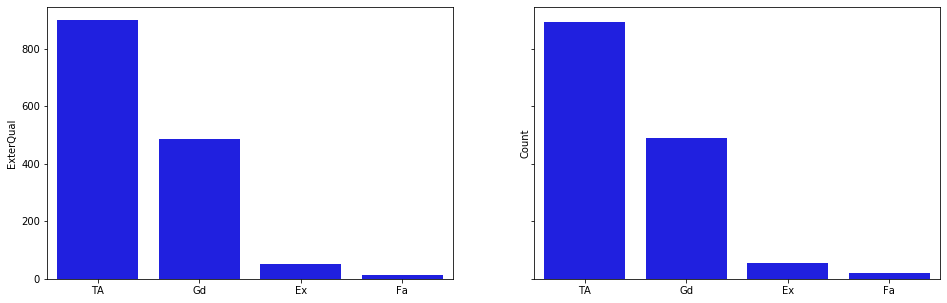

In [122]:
val_plotter('ExterQual');

Overall Average Sale Price: $180192.07
(shown in red)


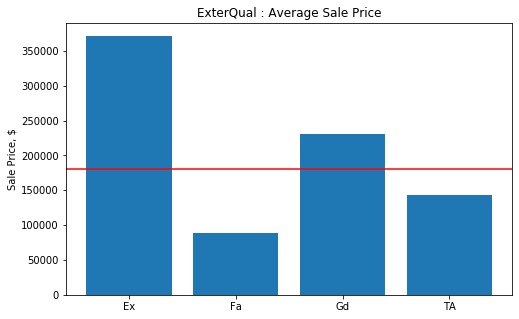

In [123]:
bar_plotter('ExterQual');

In [124]:
# Replacing ordinal Exter Qual with numeric rank

df['ExterQual'] = df['ExterQual'].map({'Ex':3,
                                       'Gd':2,
                                       'TA':1,
                                       'Fa':0})
fd['ExterQual'] = fd['ExterQual'].map({'Ex':3,
                                       'Gd':2,
                                       'TA':1,
                                       'Fa':0})
shape_tester(df,fd)

Test for shape: Passed


### Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

NaNs in df: 0
NaNs in fd: 0
value_count() of ExterCond categories in df, fd


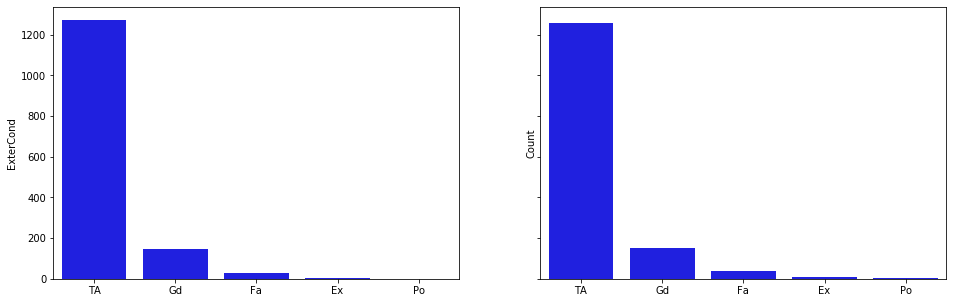

In [125]:
val_plotter('ExterCond');

Overall Average Sale Price: $180192.07
(shown in red)


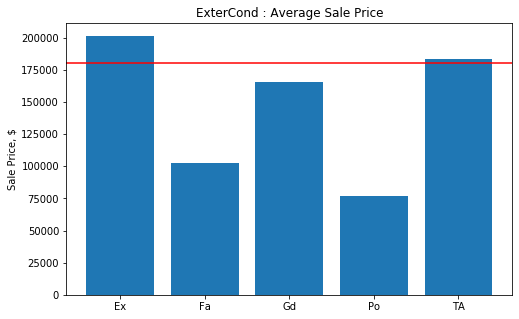

In [126]:
bar_plotter('ExterCond');

In [127]:
feature_checker(df,fd,'ExterCond')

Categories in TRAIN absent TEST: set()

Categories in TEST absent TRAIN: set()


In [128]:
# Investigating why ExterCond: TA has higher average sale price than Gd
print(df.groupby(df['ExterCond'])['GrLivArea'].mean().rename_axis('SQFT'))
print()
print(df.groupby(df['ExterCond'])['OverallQual'].mean().rename_axis('Overall Quality'))

SQFT
Ex    1617.000000
Fa    1290.428571
Gd    1481.117241
Po    1306.000000
TA    1517.337785
Name: GrLivArea, dtype: float64

Overall Quality
Ex    7.333333
Fa    4.607143
Gd    5.758621
Po    3.000000
TA    6.161822
Name: OverallQual, dtype: float64


In [129]:
# Replacing ordinal ExterCond with numeric rank
df['ExterCond'] = df['ExterCond'].map({'Ex':4,
                                       'Gd':3,
                                       'TA':2,
                                       'Fa':1,
                                       'Po':0})
fd['ExterCond'] = fd['ExterCond'].map({'Ex':4,
                                       'Gd':3,
                                       'TA':2,
                                       'Fa':1,
                                       'Po':0})
shape_tester(df,fd)

Test for shape: Passed


### Foundation (Nominal): Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	 Poured Contrete	
       Slab	  Slab
       Stone 	Stone
       Wood  	Wood

NaNs in df: 0
NaNs in fd: 0
value_count() of Foundation categories in df, fd


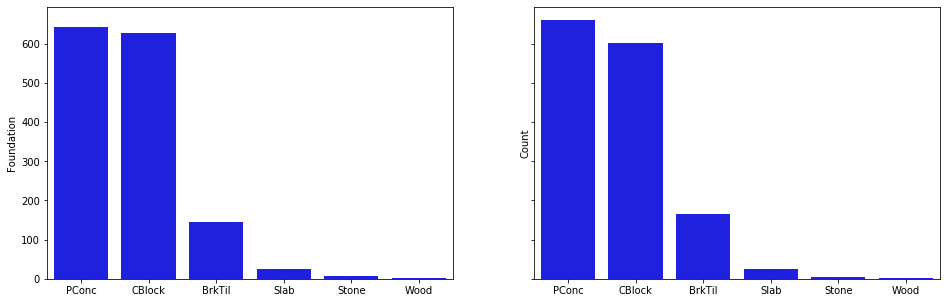

In [130]:
val_plotter('Foundation');

Overall Average Sale Price: $180192.07
(shown in red)


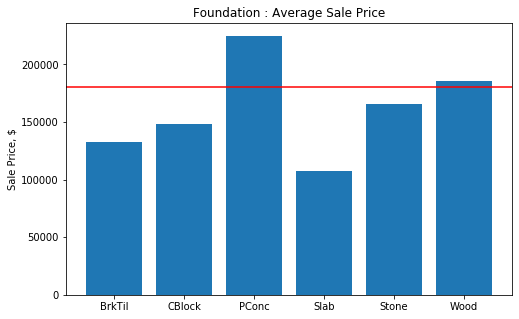

In [131]:
bar_plotter('Foundation');

In [132]:
df,fd = series_dummier(df,fd,'Foundation')

Categories in TRAIN absent TEST: SalePrice

            Category  NaN count      Mean  Corresponds
0  Foundation_BrkTil          0  0.100690         True
1  Foundation_CBlock          0  0.432414         True
2   Foundation_PConc          0  0.444138         True
3    Foundation_Slab          0  0.016552         True
4   Foundation_Stone          0  0.004138         True
5    Foundation_Wood          0  0.002069         True

Test for shape: Passed


### Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [133]:
df['BsmtQual'] = df['BsmtQual'].fillna('no_basement')
fd['BsmtQual'] = fd['BsmtQual'].fillna('no_basement')

NaNs in df: 0
NaNs in fd: 0
value_count() of BsmtQual categories in df, fd


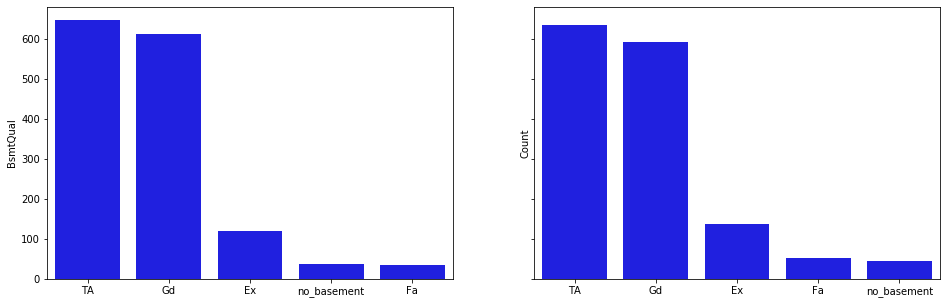

In [134]:
val_plotter('BsmtQual');

Overall Average Sale Price: $180192.07
(shown in red)


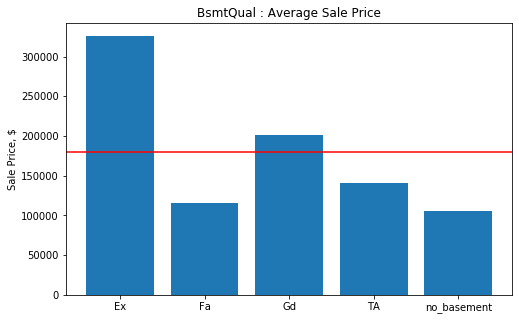

In [135]:
bar_plotter('BsmtQual');

In [136]:
# Replacing ordinal Bsmt Qual with numeric rank

df['BsmtQual'] = df['BsmtQual'].map({'Ex':4,
                                       'Gd':3,
                                       'TA':2,
                                       'Fa':1,
                                       'no_basement':0})
fd['BsmtQual'] = fd['BsmtQual'].map({'Ex':4,
                                       'Gd':3,
                                       'TA':2,
                                       'Fa':1,
                                       'no_basement':0})
shape_tester(df,fd)

Test for shape: Passed


### Bsmt Cond (Ordinal): Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [137]:
df['BsmtCond'] = df['BsmtCond'].fillna('no_basement')
fd['BsmtCond'] = fd['BsmtCond'].fillna('no_basement')

NaNs in df: 0
NaNs in fd: 0
value_count() of BsmtCond categories in df, fd


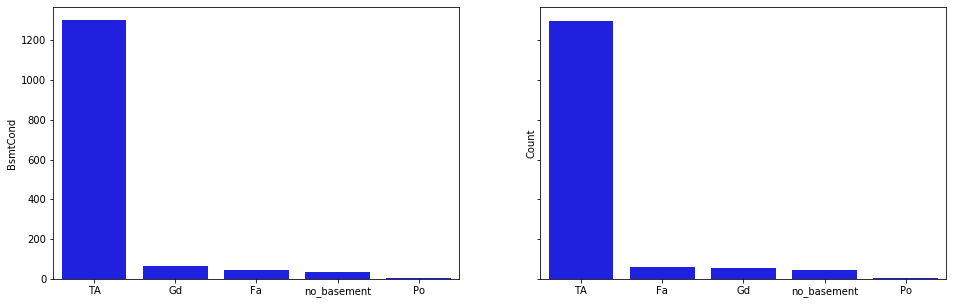

In [138]:
val_plotter('BsmtCond');

Overall Average Sale Price: $180192.07
(shown in red)


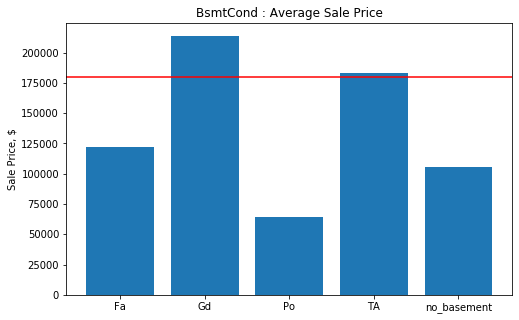

In [139]:
bar_plotter('BsmtCond');

In [140]:
df.groupby(df['BsmtCond'])['GrLivArea'].mean().index

Index(['Fa', 'Gd', 'Po', 'TA', 'no_basement'], dtype='object', name='BsmtCond')

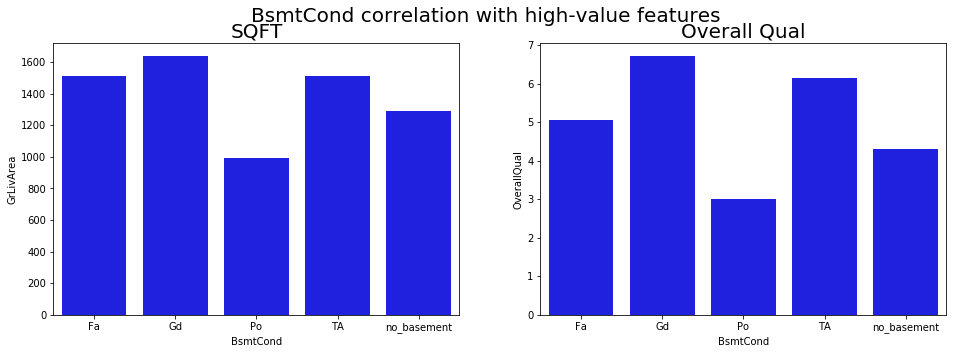

In [141]:
# Investigating why no_basement has higher price than po
plt.rcParams['figure.figsize']=(16,5)
fig, axs = plt.subplots(ncols=2)
fig.suptitle('BsmtCond correlation with high-value features', fontsize=20)
    
sns.barplot(x=df.groupby(df['BsmtCond'])['GrLivArea'].mean().index,
            y=df.groupby(df['BsmtCond'])['GrLivArea'].mean(),
            color='b',
            ax=axs[0])
axs[0].set_title('SQFT', fontsize=20)
sns.barplot(x=df.groupby(df['BsmtCond'])['OverallQual'].mean().index,
            y=df.groupby(df['BsmtCond'])['OverallQual'].mean(),
            color='b',
            ax=axs[1])
axs[1].set_title('Overall Qual', fontsize=20);

In [142]:
# Replacing ordinal Bsmt Cond with numeric rank

df['BsmtCond'] = df['BsmtCond'].map({'Gd':4,
                                     'TA':3,
                                     'Fa':2,
                                     'Po':1,
                                     'no_basement':0})

fd['BsmtCond'] = fd['BsmtCond'].map({'Gd':4,
                                     'TA':3,
                                     'Fa':2,
                                     'Po':1,
                                     'no_basement':0})
shape_tester(df,fd)

Test for shape: Passed


### Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [143]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('no_basement')
fd['BsmtExposure'] = fd['BsmtExposure'].fillna('no_basement')

NaNs in df: 0
NaNs in fd: 0
value_count() of BsmtExposure categories in df, fd


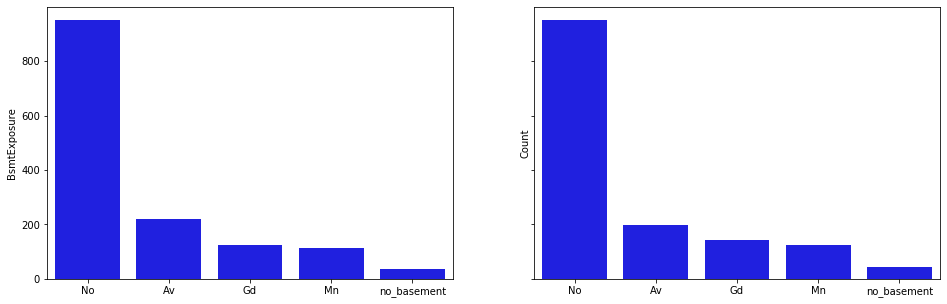

In [144]:
val_plotter('BsmtExposure');

Overall Average Sale Price: $180192.07
(shown in red)


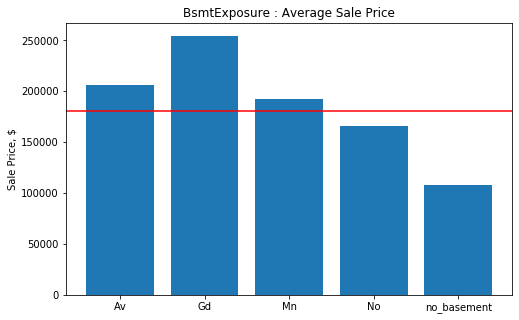

In [145]:
bar_plotter('BsmtExposure');

In [146]:
# Replacing ordinal Bsmt Exposure with numeric rank

df['BsmtExposure'] = df['BsmtExposure'].map({'Gd':4,
                                             'Av':3,
                                             'Mn':2,
                                             'No':1,
                                             'no_basement':0})

fd['BsmtExposure'] = fd['BsmtExposure'].map({'Gd':4,
                                             'Av':3,
                                             'Mn':2,
                                             'No':1,
                                             'no_basement':0})
shape_tester(df,fd)

Test for shape: Passed


### BsmtFin Type 1	(Ordinal): Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	 No Basement
		
### BsmtFin SF 1 (Continuous): Type 1 finished square feet

### BsmtFin Type 2	(Ordinal): Rating of basement finished area (if multiple types)

       (same)

### BsmtFin SF 2 (Continuous): Type 2 finished square feet

In [147]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('no_basement')
fd['BsmtFinType1'] = fd['BsmtFinType1'].fillna('no_basement')

NaNs in df: 0
NaNs in fd: 0
value_count() of BsmtFinType1 categories in df, fd


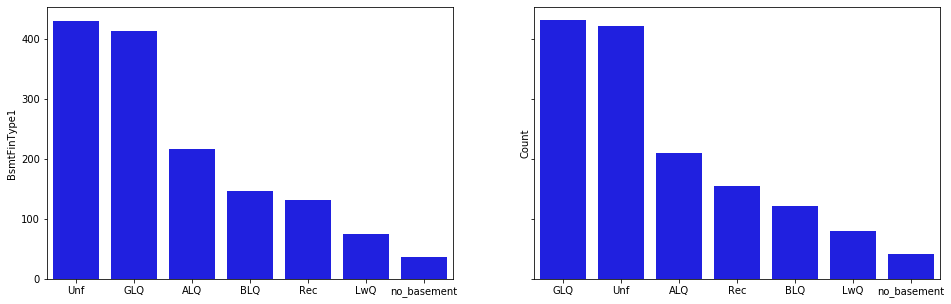

In [148]:
val_plotter('BsmtFinType1');

Overall Average Sale Price: $180192.07
(shown in red)


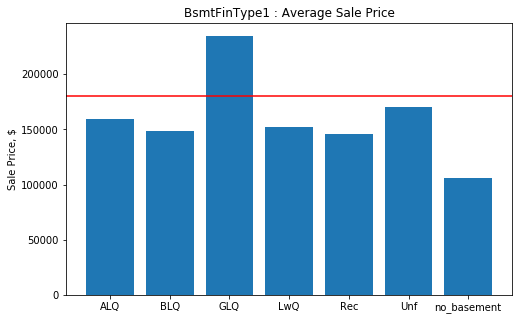

In [149]:
bar_plotter('BsmtFinType1');

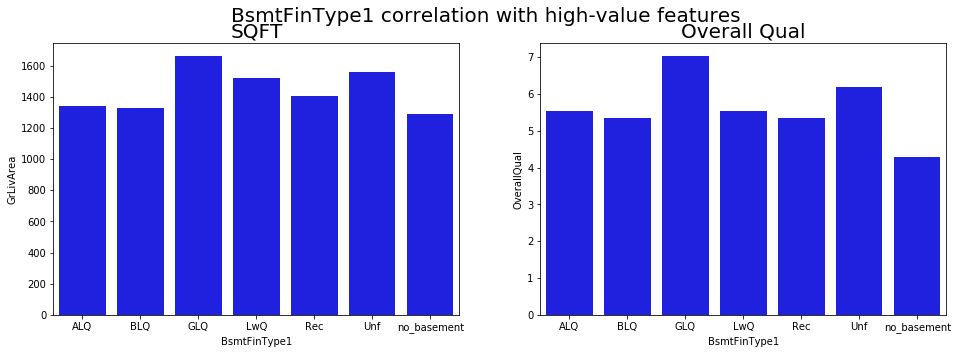

In [150]:
# Investigating why Unf outperforms relative to its ordinal rank
plt.rcParams['figure.figsize']=(16,5)
fig, axs = plt.subplots(ncols=2)
fig.suptitle('BsmtFinType1 correlation with high-value features', fontsize=20)
    
sns.barplot(x=df.groupby(df['BsmtFinType1'])['GrLivArea'].mean().index,
            y=df.groupby(df['BsmtFinType1'])['GrLivArea'].mean(),
            color='b',
            ax=axs[0])
axs[0].set_title('SQFT', fontsize=20)
sns.barplot(x=df.groupby(df['BsmtFinType1'])['OverallQual'].mean().index,
            y=df.groupby(df['BsmtFinType1'])['OverallQual'].mean(),
            color='b',
            ax=axs[1])
axs[1].set_title('Overall Qual', fontsize=20);

#### Notice that Unf has higher SQFT and higher overall quality than others (except GLQ).

count    1450.000000
mean      437.546207
std       434.360930
min         0.000000
25%         0.000000
50%       379.500000
75%       707.500000
max      2260.000000
Name: BsmtFinSF1, dtype: float64

NaNs in fd: 1


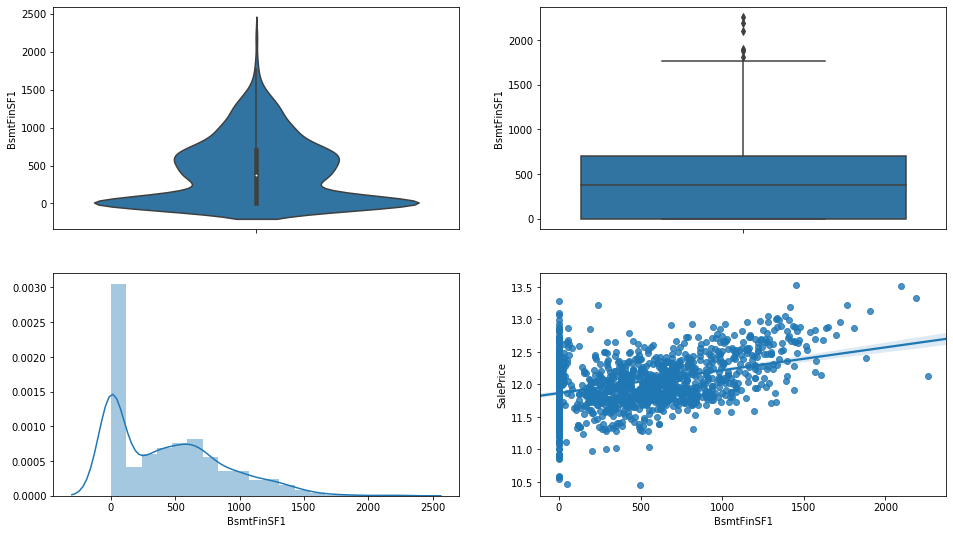

In [151]:
dist_plotter('BsmtFinSF1');

In [152]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('no_basement')
fd['BsmtFinType2'] = fd['BsmtFinType2'].fillna('no_basement')

NaNs in df: 0
NaNs in fd: 0
value_count() of BsmtFinType2 categories in df, fd


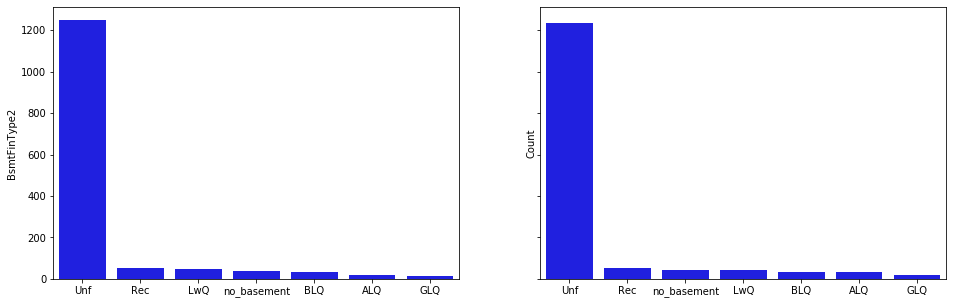

In [153]:
val_plotter('BsmtFinType2');

Overall Average Sale Price: $180192.07
(shown in red)


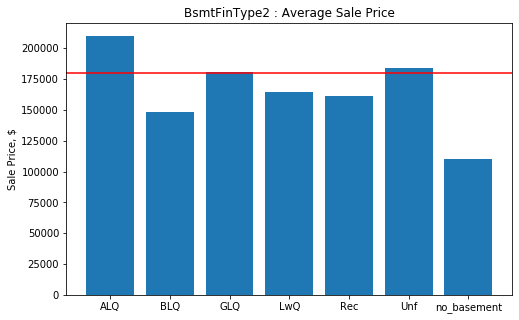

In [154]:
bar_plotter('BsmtFinType2');

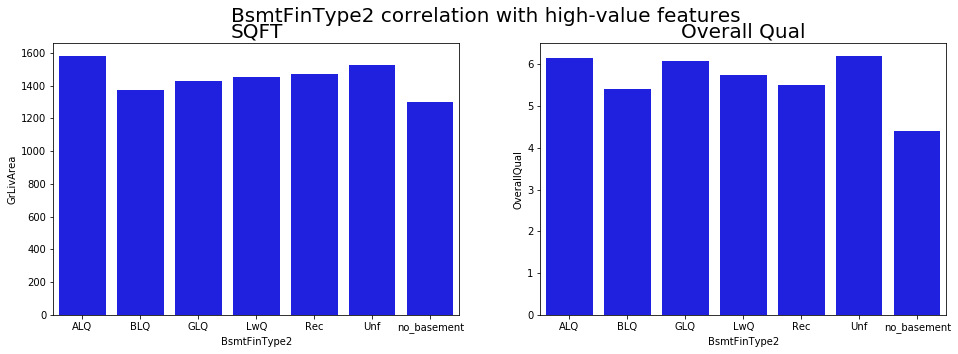

In [155]:
# Investigating why ALQ and Unf outperform relative to their ordinal rank
plt.rcParams['figure.figsize']=(16,5)
fig, axs = plt.subplots(ncols=2)
fig.suptitle('BsmtFinType2 correlation with high-value features', fontsize=20)
    
sns.barplot(x=df.groupby(df['BsmtFinType2'])['GrLivArea'].mean().index,
            y=df.groupby(df['BsmtFinType2'])['GrLivArea'].mean(),
            color='b',
            ax=axs[0])
axs[0].set_title('SQFT', fontsize=20)
sns.barplot(x=df.groupby(df['BsmtFinType2'])['OverallQual'].mean().index,
            y=df.groupby(df['BsmtFinType2'])['OverallQual'].mean(),
            color='b',
            ax=axs[1])
axs[1].set_title('Overall Qual', fontsize=20);

count    1450.000000
mean       45.959310
std       160.336014
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

NaNs in fd: 1


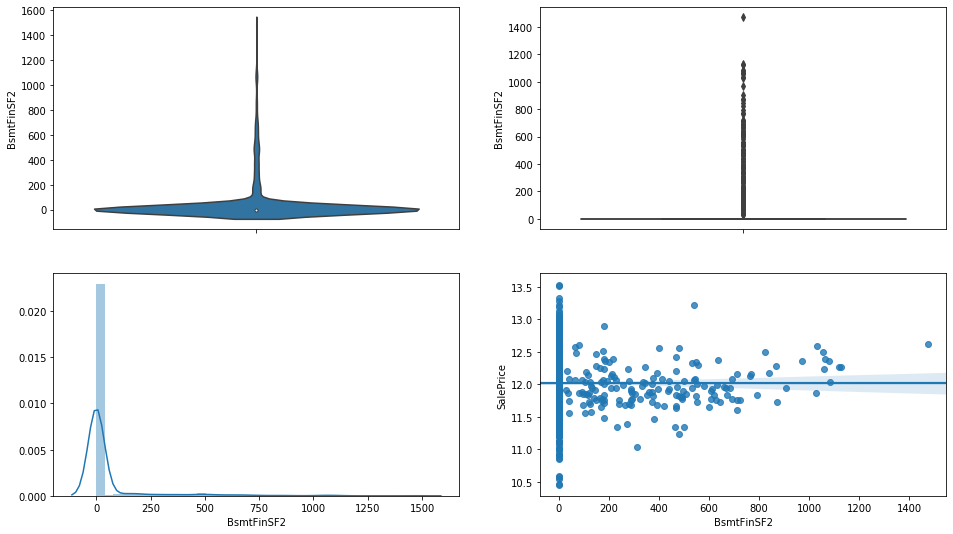

In [156]:
dist_plotter('BsmtFinSF2');

In [157]:
# Basement Finish Type 2 lacks the distribution (dominated by Unf) and distinctiveness
# (closer to the mean) that makes features informative, so it is dropped
# along with its corresponding sqft
df = df.drop(columns=['BsmtFinType2','BsmtFinSF2'], axis=1)
fd = fd.drop(columns=['BsmtFinType2','BsmtFinSF2'], axis=1)

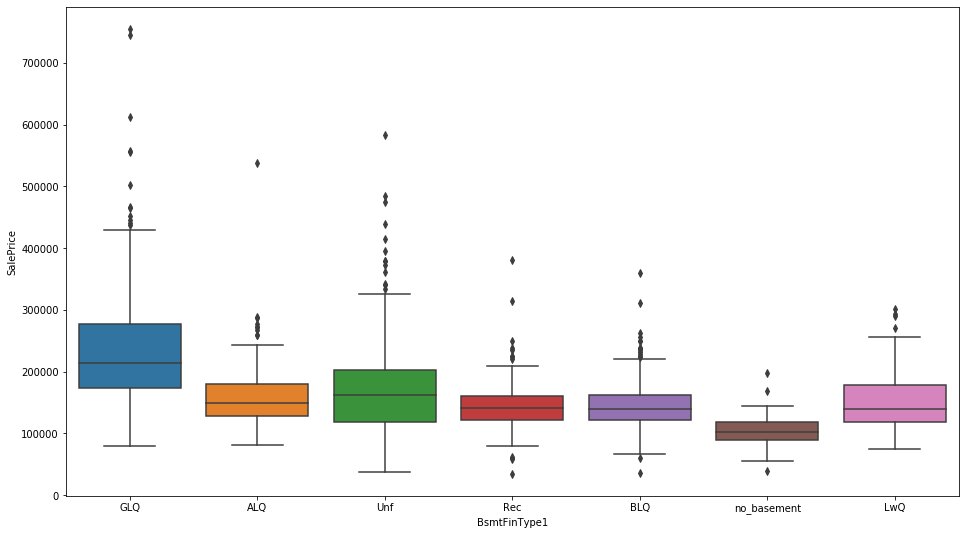

In [158]:
sns.boxplot(x=df['BsmtFinType1'],
            y=df['SalePrice']);

In [159]:
df[(df['BsmtFinType1']=='ALQ') & (df['SalePrice']>500_000)]

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_missing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
769,47.0,10.887512,0,1,1,8,5,2003,2003,603.0,...,1,0,0,0,0,0,1,0,0,0


In [160]:
df[(df['BsmtFinType1']=='Rec') & (df['SalePrice']>300_000)]

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_missing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
190,70.000000,9.265775,0,3,1,8,8,1932,1994,0.0,...,0,1,0,0,0,1,0,0,0,0
1268,70.049958,9.553930,0,2,1,8,9,1935,1997,632.0,...,1,0,0,0,0,1,0,0,0,0


In [161]:
df = df.drop(df[(df['BsmtFinType1']=='ALQ') & (df['SalePrice']>500_000)].index)
df = df.drop(df[(df['BsmtFinType1']=='Rec') & (df['SalePrice']>300_000)].index)

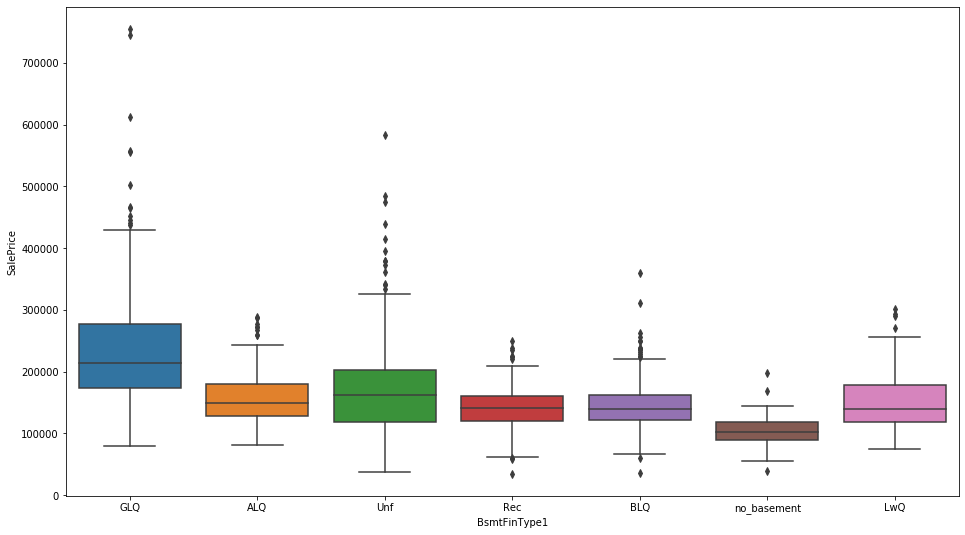

In [162]:
sns.boxplot(x=df['BsmtFinType1'],
            y=df['SalePrice']);

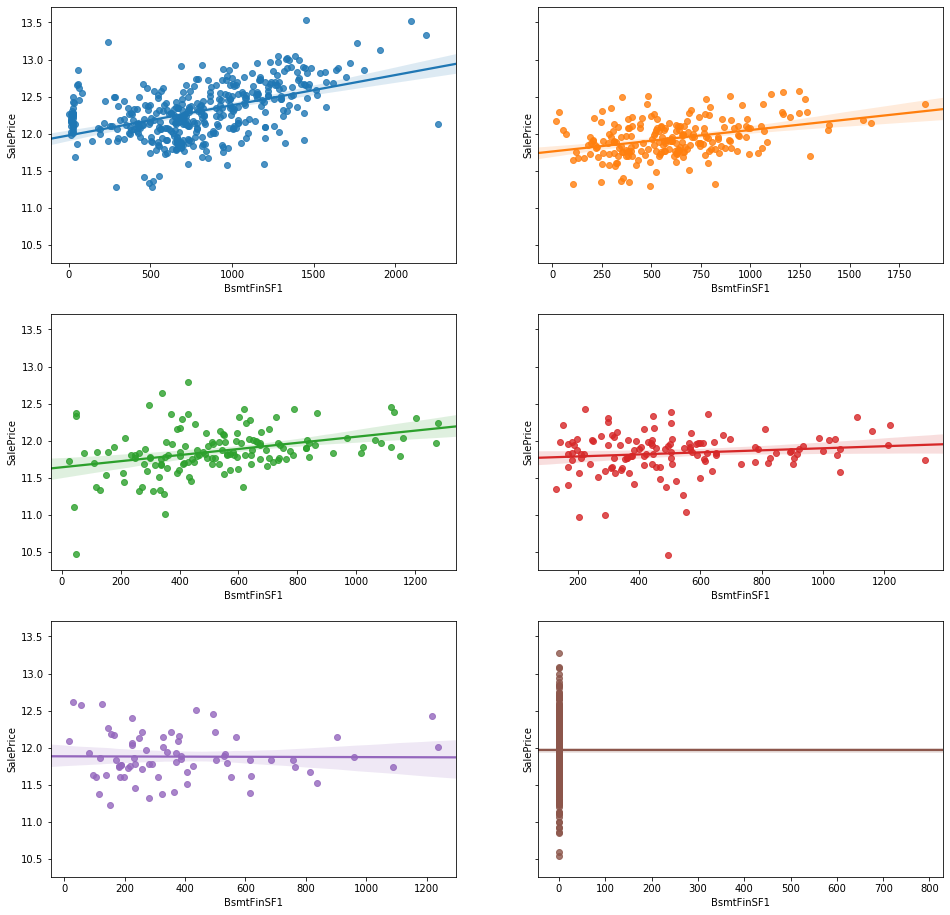

In [163]:
plt.rcParams['figure.figsize']=(16,16)
fig, axs = plt.subplots(nrows=3, ncols=2, sharey=True)
sns.regplot(x=df[df['BsmtFinType1']=='GLQ']['BsmtFinSF1'],
            y=np.log(df[df['BsmtFinType1']=='GLQ']['SalePrice']),
            ax=axs[0,0])
sns.regplot(x=df[df['BsmtFinType1']=='ALQ']['BsmtFinSF1'],
            y=np.log(df[df['BsmtFinType1']=='ALQ']['SalePrice']),
            ax=axs[0,1])
sns.regplot(x=df[df['BsmtFinType1']=='BLQ']['BsmtFinSF1'],
            y=np.log(df[df['BsmtFinType1']=='BLQ']['SalePrice']),
            ax=axs[1,0])
sns.regplot(x=df[df['BsmtFinType1']=='Rec']['BsmtFinSF1'],
            y=np.log(df[df['BsmtFinType1']=='Rec']['SalePrice']),
            ax=axs[1,1])
sns.regplot(x=df[df['BsmtFinType1']=='LwQ']['BsmtFinSF1'],
            y=np.log(df[df['BsmtFinType1']=='LwQ']['SalePrice']),
            ax=axs[2,0])
sns.regplot(x=df[df['BsmtFinType1']=='Unf']['BsmtFinSF1'],
            y=np.log(df[df['BsmtFinType1']=='Unf']['SalePrice']),
            ax=axs[2,1]);

In [164]:
df['BsmtGLQ'] = df['BsmtFinType1'].map({'GLQ':1,
                                        'ALQ':0,
                                        'BLQ':0,
                                        'Rec':0,
                                        'LwQ':0,
                                        'Unf':0})
fd['BsmtGLQ'] = fd['BsmtFinType1'].map({'GLQ':1,
                                        'ALQ':0,
                                        'BLQ':0,
                                        'Rec':0,
                                        'LwQ':0,
                                        'Unf':0})
df['BsmtGLQ'] = df['BsmtGLQ'].fillna(0)
fd['BsmtGLQ'] = fd['BsmtGLQ'].fillna(0)

# Dropping BsmtFin Type 1 because this information can be represented by Bsmt Unf SF and Total Bsmt SF
df = df.drop(columns=['BsmtFinType1','BsmtFinSF1'], axis=1)
fd = fd.drop(columns=['BsmtFinType1','BsmtFinSF1'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Bsmt Unf SF (Continuous): Unfinished square feet of basement area

### Total Bsmt SF (Continuous): Total square feet of basement area

In [165]:
# Filling NaN
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
fd['BsmtUnfSF'] = fd['BsmtUnfSF'].fillna(0)
fd['TotalBsmtSF'] = fd['BsmtUnfSF'].fillna(0)

count    1447.000000
mean      568.599862
std       443.070986
min         0.000000
25%       223.000000
50%       480.000000
75%       810.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

NaNs in fd: 0


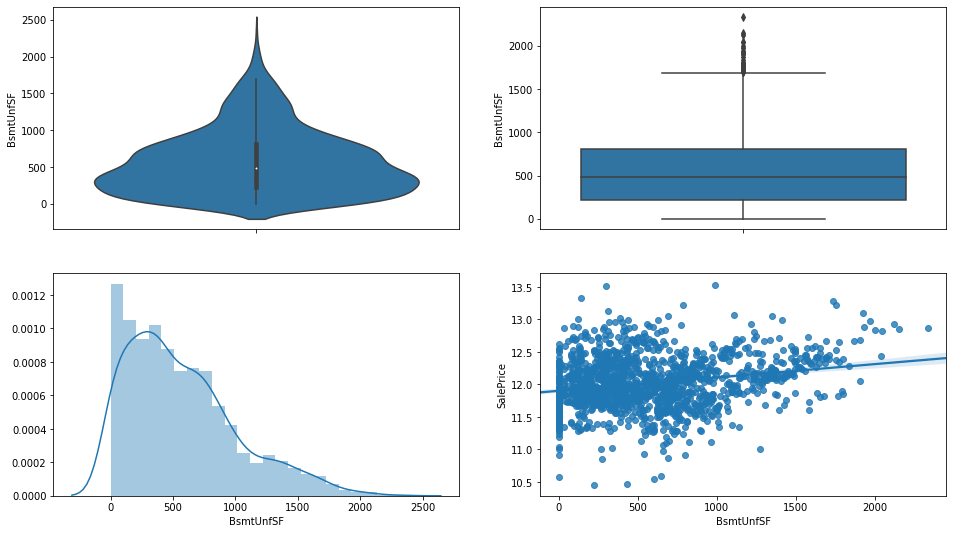

In [166]:
dist_plotter('BsmtUnfSF');

count    1447.000000
mean     1051.791292
std       417.131128
min         0.000000
25%       795.000000
50%       991.000000
75%      1289.500000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

NaNs in fd: 0


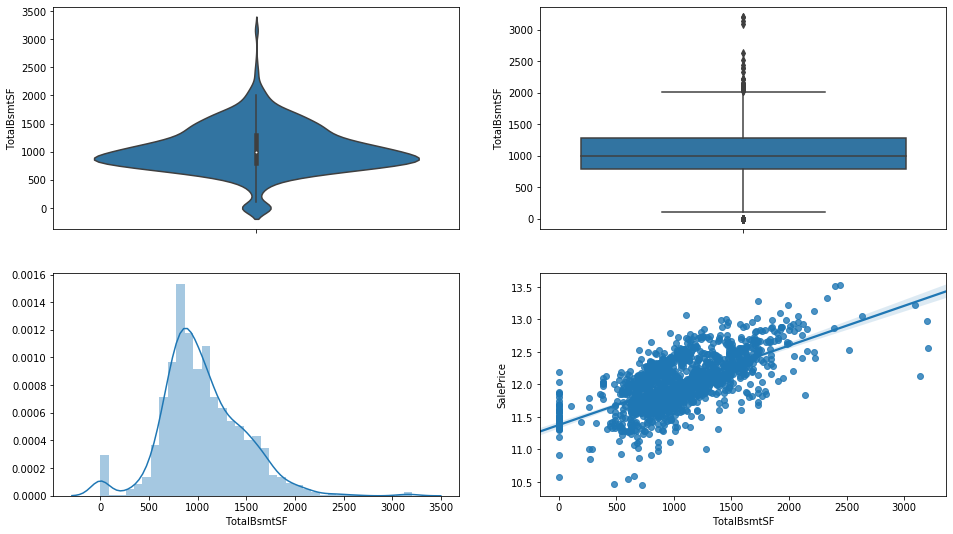

In [167]:
dist_plotter('TotalBsmtSF');

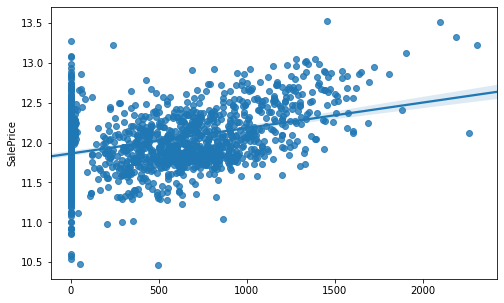

In [168]:
plt.figure(figsize=(8,5))
sns.regplot(df['TotalBsmtSF']-df['BsmtUnfSF'], np.log(df['SalePrice']));

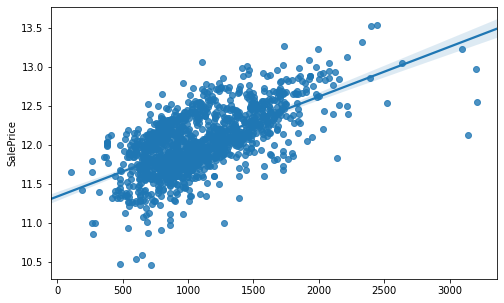

In [169]:
plt.figure(figsize=(8,5))
sns.regplot(df['TotalBsmtSF'] + (df['TotalBsmtSF']-df['BsmtUnfSF'])/df['TotalBsmtSF'],
            np.log(df['SalePrice']));

In [170]:
# Creating separate DataFrame to examine relationships in continuous basement features
bsmt_df = df[['TotalBsmtSF','BsmtUnfSF','SalePrice']]

In [171]:
bsmt_df['adj_bsmt_sf'] = df['TotalBsmtSF']+(df['TotalBsmtSF']-df['BsmtUnfSF'])/(df['TotalBsmtSF']+1)
bsmt_df['comb_bsmt_sf'] = df['TotalBsmtSF']-df['BsmtUnfSF']

/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [172]:
bsmt_df['lnSalePrice'] = np.log(bsmt_df['SalePrice'])

/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
bsmt_df['fin_ratio'] = (bsmt_df['TotalBsmtSF']-bsmt_df['BsmtUnfSF'])/bsmt_df['BsmtUnfSF']

/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
bsmt_df.corr()['lnSalePrice']

TotalBsmtSF     0.643208
BsmtUnfSF       0.229465
SalePrice       0.949283
adj_bsmt_sf     0.643242
comb_bsmt_sf    0.366817
lnSalePrice     1.000000
fin_ratio       0.116014
Name: lnSalePrice, dtype: float64

In [175]:
# Dropping features, retaining just Total Bsmt SF
df = df.drop(columns=['BsmtUnfSF'], axis=1)
fd = fd.drop(columns=['BsmtUnfSF'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Heating	(Nominal): Type of heating
		
       Floor	Floor Furnace
       GasA	 Gas forced warm air furnace
       GasW	 Gas hot water or steam heat
       Grav	 Gravity furnace	
       OthW	 Hot water or steam heat other than gas
       Wall	 Wall furnace

NaNs in df: 0
NaNs in fd: 0
value_count() of Heating categories in df, fd


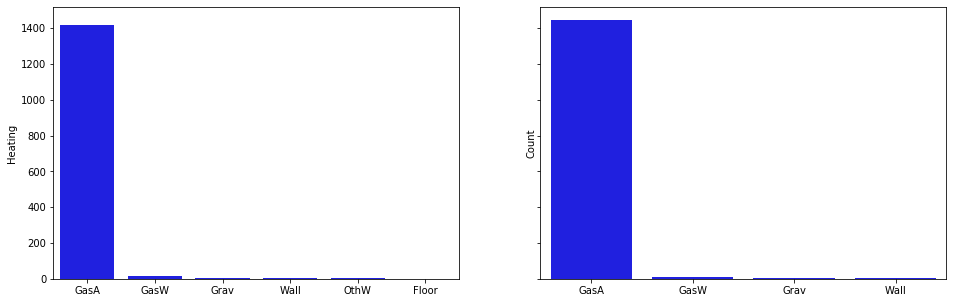

In [176]:
val_plotter('Heating');

Overall Average Sale Price: $179712.85
(shown in red)


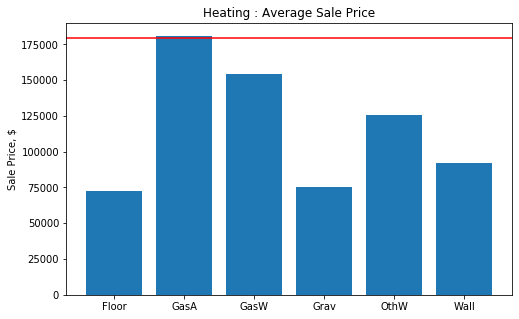

In [177]:
bar_plotter('Heating');

In [178]:
# Since Heating is dominated by the GasA category, we can drop this feature
df.drop(columns=['Heating'], inplace=True)
fd.drop(columns=['Heating'], inplace=True)

### Heating QC (Ordinal): Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

NaNs in df: 0
NaNs in fd: 0
value_count() of HeatingQC categories in df, fd


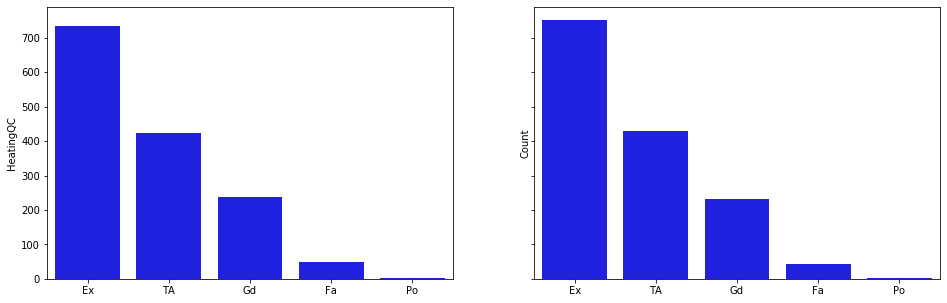

In [179]:
val_plotter('HeatingQC');

Overall Average Sale Price: $179712.85
(shown in red)


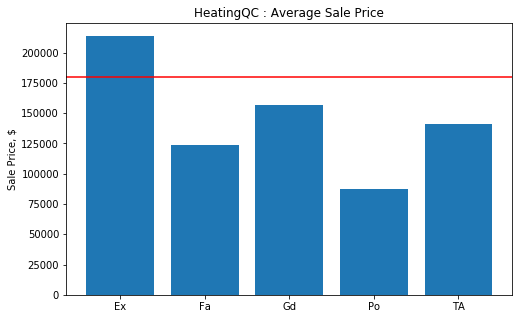

In [180]:
bar_plotter('HeatingQC');

In [181]:
df,fd = series_dummier(df,fd,'HeatingQC')

Categories in TRAIN absent TEST: SalePrice

       Category  NaN count      Mean  Corresponds
0  HeatingQC_Ex          0  0.507256         True
1  HeatingQC_Fa          0  0.033863         True
2  HeatingQC_Gd          0  0.165169         True
3  HeatingQC_Po          0  0.000691         True
4  HeatingQC_TA          0  0.293020         True

Test for shape: Passed


### Central Air (Nominal): Central air conditioning

       N	No
       Y	Yes

NaNs in df: 0
NaNs in fd: 0
value_count() of CentralAir categories in df, fd


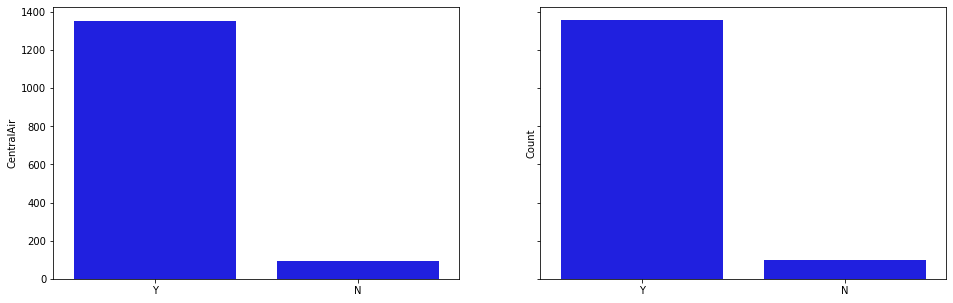

In [182]:
val_plotter('CentralAir');

Overall Average Sale Price: $179712.85
(shown in red)


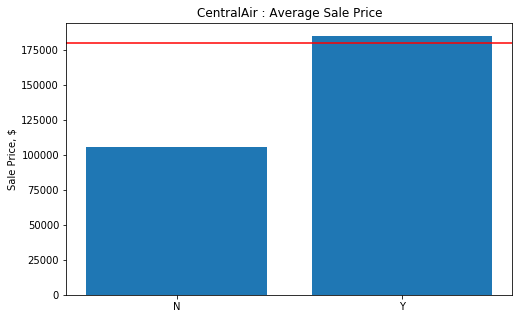

In [183]:
bar_plotter('CentralAir');

In [184]:
df['CentralAir'] = df['CentralAir'].map({'N':0, 'Y':1})
fd['CentralAir'] = fd['CentralAir'].map({'N':0, 'Y':1})

### Electrical (Ordinal): Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	  Mixed

NaNs in df: 1
NaNs in fd: 0
value_count() of Electrical categories in df, fd


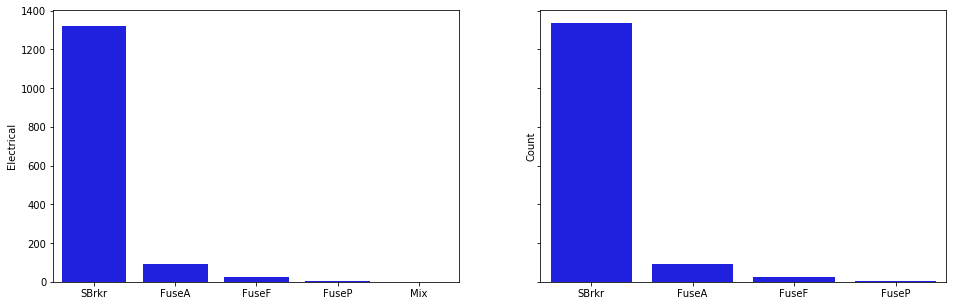

In [185]:
val_plotter('Electrical');

In [186]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

Overall Average Sale Price: $179712.85
(shown in red)


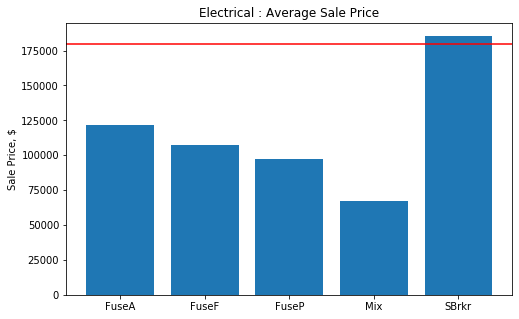

In [187]:
bar_plotter('Electrical');

In [188]:
df['Electrical'] = df['Electrical'].map({'SBrkr':4,
                                         'FuseA':3,
                                         'FuseF':2,
                                         'FuseP':1,
                                         'Mix':0})
fd['Electrical'] = fd['Electrical'].map({'SBrkr':4,
                                         'FuseA':3,
                                         'FuseF':2,
                                         'FuseP':1,
                                         'Mix':0})
shape_tester(df,fd)

Test for shape: Passed


### 1st Flr SF (Continuous): First Floor square feet
 
### 2nd Flr SF (Continuous)	: Second floor square feet

### Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)

### Gr Liv Area (Continuous): Above grade (ground) living area square feet

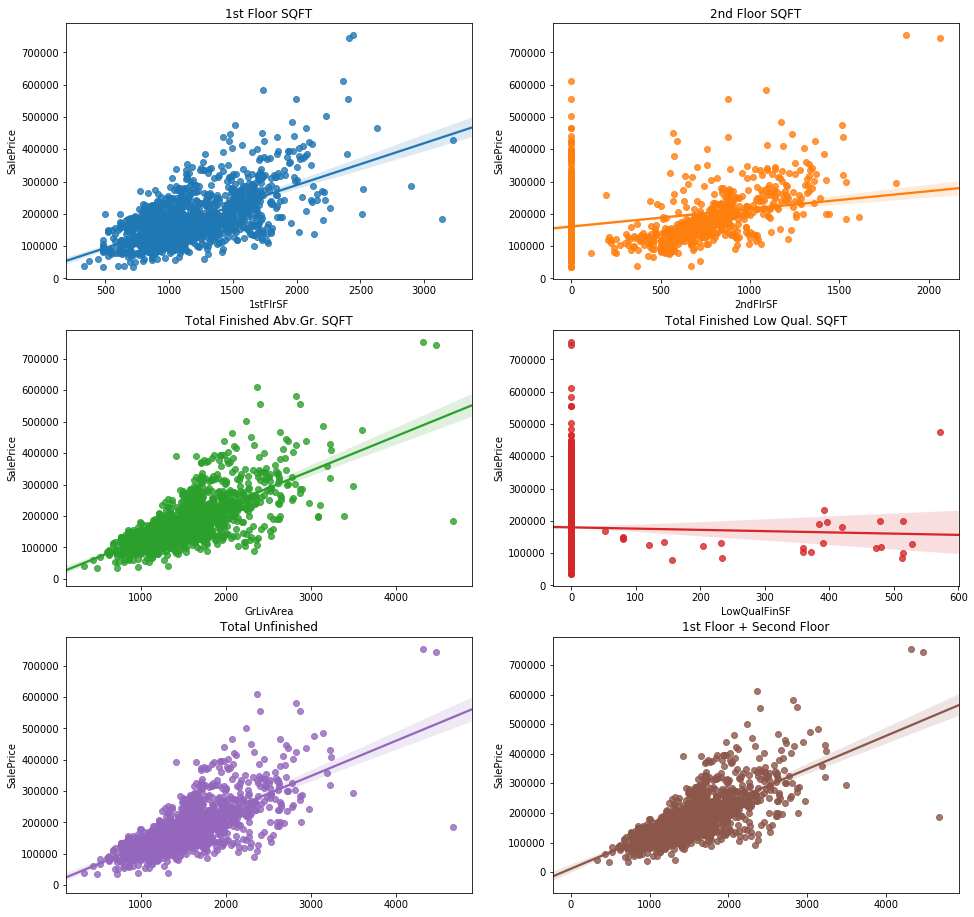

In [189]:
plt.rcParams['figure.figsize']=(16,16)
fig, axs = plt.subplots(nrows=3, ncols=2)
sns.regplot(x=df['1stFlrSF'],
            y=df['SalePrice'],
            ax=axs[0,0])
axs[0,0].set_title('1st Floor SQFT')
sns.regplot(x=df['2ndFlrSF'],
            y=df['SalePrice'],
            ax=axs[0,1])
axs[0,1].set_title('2nd Floor SQFT')
sns.regplot(x=df['GrLivArea'],
            y=df['SalePrice'],
            ax=axs[1,0])
axs[1,0].set_title('Total Finished Abv.Gr. SQFT')
sns.regplot(x=df['LowQualFinSF'],
            y=df['SalePrice'],
            ax=axs[1,1])
axs[1,1].set_title('Total Finished Low Qual. SQFT')
sns.regplot(x=df['GrLivArea']-df['LowQualFinSF'],
            y=df['SalePrice'],
            ax=axs[2,0])
axs[2,0].set_title('Total Unfinished')
sns.regplot(x=df['1stFlrSF']+df['2ndFlrSF'],
            y=df['SalePrice'],
            ax=axs[2,1]);
axs[2,1].set_title('1st Floor + Second Floor');

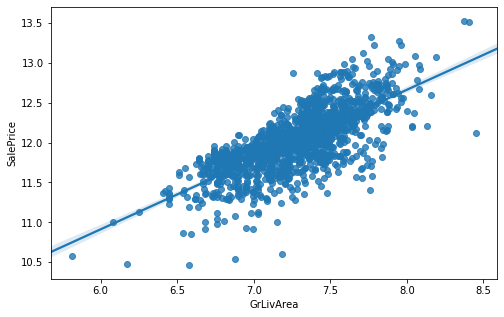

In [190]:
plt.rcParams['figure.figsize']=(8,5)
sns.regplot(x=np.log(df['GrLivArea']),
            y=np.log(df['SalePrice']))

In [191]:
# Creating separate DataFrame to explore square footage relationships
sqft_df = df[['1stFlrSF','2ndFlrSF','GrLivArea','LowQualFinSF']]

In [192]:
# Feature for finished square feet
sqft_df['FinSF'] = sqft_df['GrLivArea']-sqft_df['LowQualFinSF']

# Feature for adjusted square feet
sqft_df['AdjSF'] = (sqft_df['GrLivArea']+sqft_df['GrLivArea']-sqft_df['LowQualFinSF'])/sqft_df['GrLivArea']

# Feature for whether there is a second floor
sqft_df['Has2ndFlr'] = sqft_df['2ndFlrSF']>0
sqft_df['Has2ndFlr'] = sqft_df['Has2ndFlr'].map({True:1, False:0})

ss = StandardScaler()
sqft_df = pd.DataFrame(ss.fit_transform(sqft_df))
sqft_df.columns = ['1stFlrSF',
                   '2ndFlrSF',
                   'GrLivArea',
                   'LowQualFinSF',
                   'FinSF',
                   'AdjSF',
                   'Has2ndFlr']

# Incorporating log of SalePrice
sqft_df['SalePrice'] = np.log(df['SalePrice'])
sqft_df.head()

/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,1stFlrSF,2ndFlrSF,GrLivArea,LowQualFinSF,FinSF,AdjSF,Has2ndFlr,SalePrice
0,-0.804184,1.178726,0.402580,-0.120788,0.418034,0.118436,1.150058,12.247694
1,0.283822,-0.795081,-0.481479,-0.120788,-0.474171,0.118436,-0.869522,12.109011
2,-0.632676,1.206461,0.552555,-0.120788,0.569390,0.118436,1.150058,12.317167
3,-0.522803,0.952224,0.416394,-0.120788,0.431974,0.118436,1.150058,11.849398
4,-0.029717,1.638665,1.365573,-0.120788,1.389900,0.118436,1.150058,12.429216


In [193]:
pd.DataFrame(sqft_df.corr())['SalePrice']

1stFlrSF        0.055417
2ndFlrSF        0.041342
GrLivArea       0.077718
LowQualFinSF    0.017174
FinSF           0.076764
AdjSF           0.008850
Has2ndFlr       0.017721
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [194]:
# Since Gr Liv Area has highest correlation with log of price,
# this feature is retained and others are dropped

# df = df.drop(columns=['1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1)
# fd = fd.drop(columns=['1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Bsmt Full Bath (Discrete): Basement full bathrooms

### Bsmt Half Bath (Discrete): Basement half bathrooms

### Full Bath (Discrete): Full bathrooms above grade

### Half Bath (Discrete): Half baths above grade

NaNs in df: 0
NaNs in fd: 2
value_count() of BsmtFullBath categories in df, fd


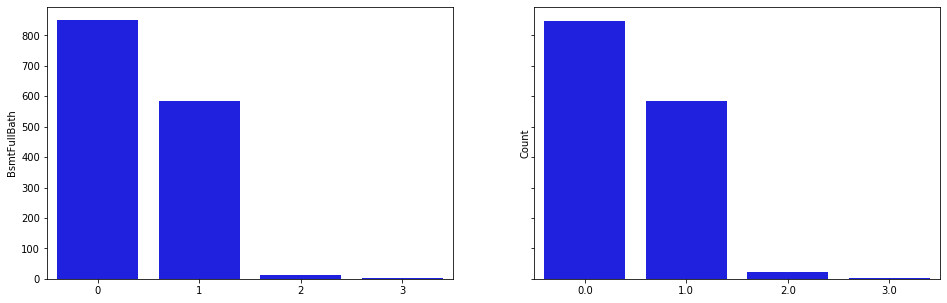

In [195]:
val_plotter('BsmtFullBath');

In [196]:
fd['BsmtHalfBath'] = fd['BsmtHalfBath'].fillna(0)
fd['BsmtFullBath'] = fd['BsmtHalfBath'].fillna(0)

Overall Average Sale Price: $179712.85
(shown in red)


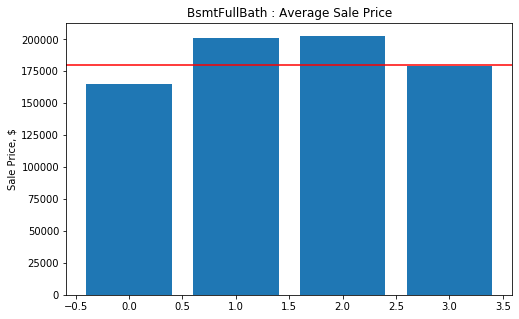

In [197]:
bar_plotter('BsmtFullBath');

NaNs in df: 0
NaNs in fd: 0
value_count() of BsmtHalfBath categories in df, fd


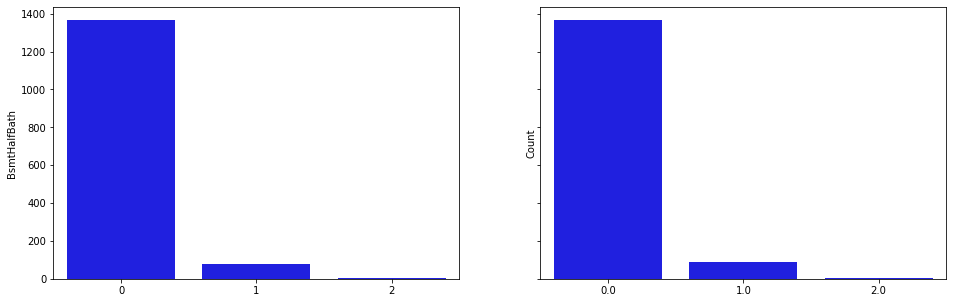

In [198]:
val_plotter('BsmtHalfBath');

Overall Average Sale Price: $179712.85
(shown in red)


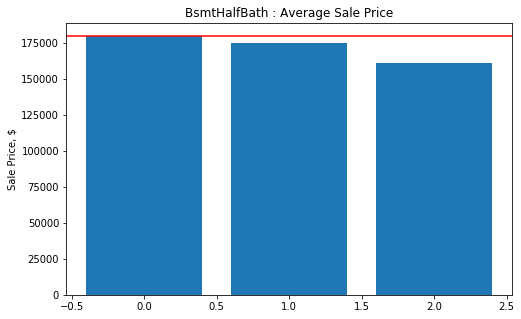

In [199]:
bar_plotter('BsmtHalfBath');

NaNs in df: 0
NaNs in fd: 0
value_count() of FullBath categories in df, fd


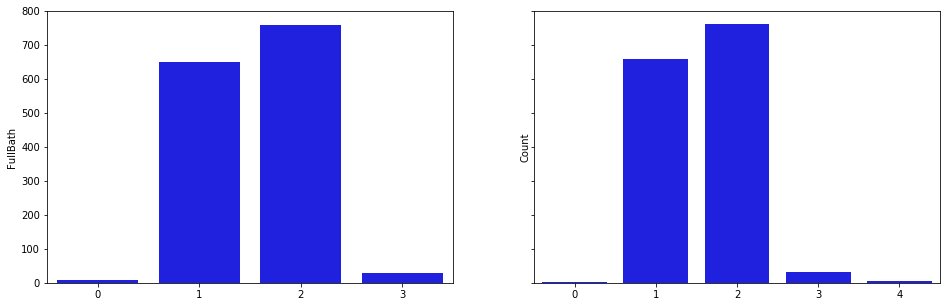

In [200]:
val_plotter('FullBath');

Overall Average Sale Price: $179712.85
(shown in red)


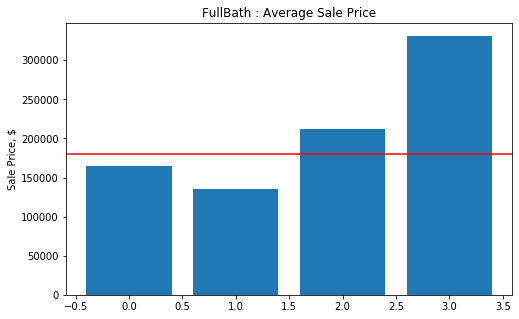

In [201]:
bar_plotter('FullBath');

NaNs in df: 0
NaNs in fd: 0
value_count() of HalfBath categories in df, fd


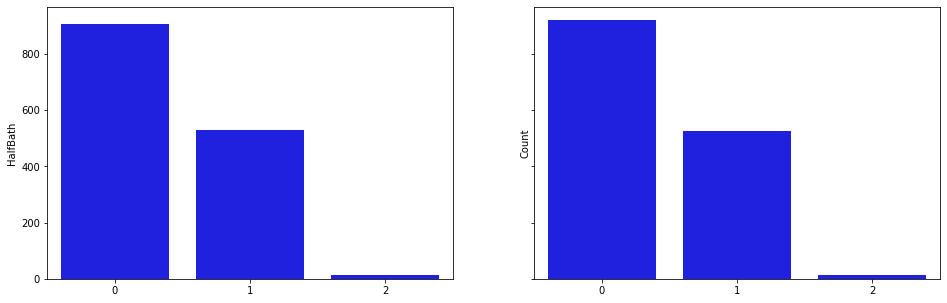

In [202]:
val_plotter('HalfBath');

Overall Average Sale Price: $179712.85
(shown in red)


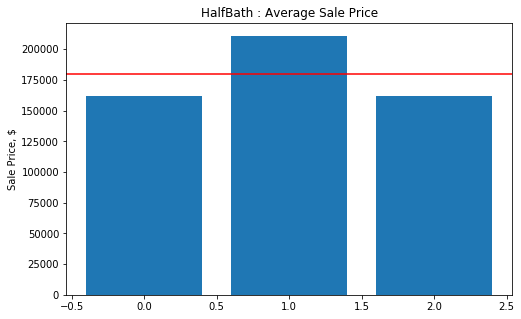

In [203]:
bar_plotter('HalfBath');

In [204]:
bath_df = df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']]

In [205]:
bath_df['lnSalePrice'] = np.log(bath_df['SalePrice'])

/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [206]:
bath_df.corr()['lnSalePrice']

BsmtFullBath    0.231962
BsmtHalfBath   -0.004591
FullBath        0.587227
HalfBath        0.314390
SalePrice       0.949283
lnSalePrice     1.000000
Name: lnSalePrice, dtype: float64

In [207]:
bath_df['Baths'] = .6*(df['BsmtFullBath']+(.5*df['BsmtHalfBath']))+df['FullBath']+(df['HalfBath']*.5)

/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
bath_df.corr()['lnSalePrice']

BsmtFullBath    0.231962
BsmtHalfBath   -0.004591
FullBath        0.587227
HalfBath        0.314390
SalePrice       0.949283
lnSalePrice     1.000000
Baths           0.696499
Name: lnSalePrice, dtype: float64

In [209]:
# Replacing bathroom features with one agglomerate feature, where basement bathrooms
# are given .6 weight of grade bathrooms, and full bathrooms are given twice the weight of half baths.

# Create agglomerate feature
df['Baths'] = .6*(df['BsmtFullBath']+(.5*df['BsmtHalfBath']))+df['FullBath']+(.5*df['HalfBath'])
fd['Baths'] = .6*(fd['BsmtFullBath']+(.5*fd['BsmtHalfBath']))+fd['FullBath']+(.5*fd['HalfBath'])

# # Removing component bathroom features
# df = df.drop(columns=['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'], axis=1)
# fd = fd.drop(columns=['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Bedroom AbvGr (Discrete): Bedrooms above grade (does NOT include basement bedrooms)

NaNs in df: 0
NaNs in fd: 0
value_count() of BedroomAbvGr categories in df, fd


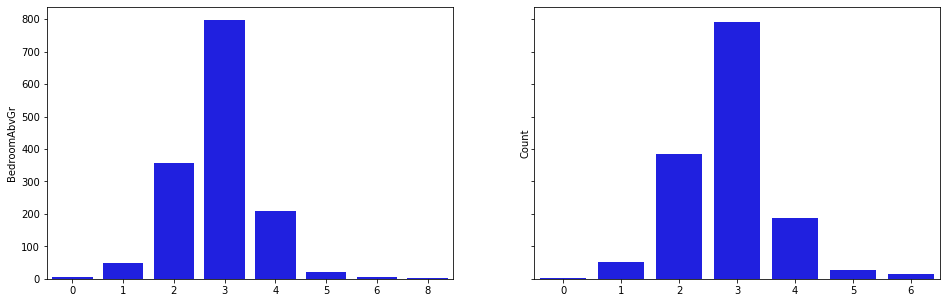

In [210]:
val_plotter('BedroomAbvGr');

Overall Average Sale Price: $179712.85
(shown in red)


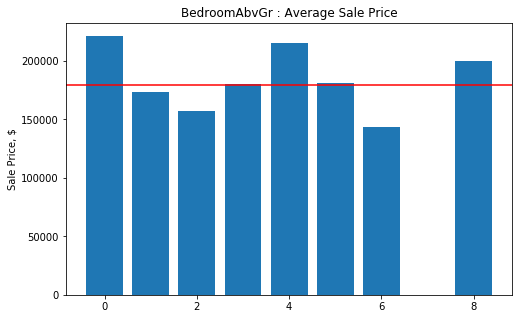

In [211]:
bar_plotter('BedroomAbvGr');

In [212]:
df[df['BedroomAbvGr']==0]

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtGLQ,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Baths
53,68.000000,10.825184,0,2,2,9,5,1981,1987,0.0,...,0,0,0,1.0,0,0,1,0,0,1.7
189,41.000000,8.501673,0,3,2,8,5,2001,2002,0.0,...,0,0,0,1.0,1,0,0,0,0,2.1
634,64.000000,8.850661,0,3,2,6,5,1980,1980,0.0,...,0,0,0,1.0,0,0,1,0,0,1.2
1163,60.000000,9.464983,0,3,2,4,4,1969,1969,0.0,...,0,0,0,1.0,0,0,0,0,1,2.2
1213,70.049958,9.234643,0,2,2,4,9,1965,2001,0.0,...,0,0,0,1.0,1,0,0,0,0,0.9
1270,70.049958,10.068790,0,3,0,7,6,1979,1979,0.0,...,0,0,0,1.0,0,0,0,0,1,1.7


In [213]:
# Since number of bedrooms does not correlate with price (which I find surprising:
# perhaps because commercial, industrial property sells at high prices and completely lacks bedrooms)
# this feature is dropped

df = df.drop(columns=['BedroomAbvGr'], axis=1)
fd = fd.drop(columns=['BedroomAbvGr'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Kitchen AbvGr (Discrete): Kitchens above grade

NaNs in df: 0
NaNs in fd: 0
value_count() of KitchenAbvGr categories in df, fd


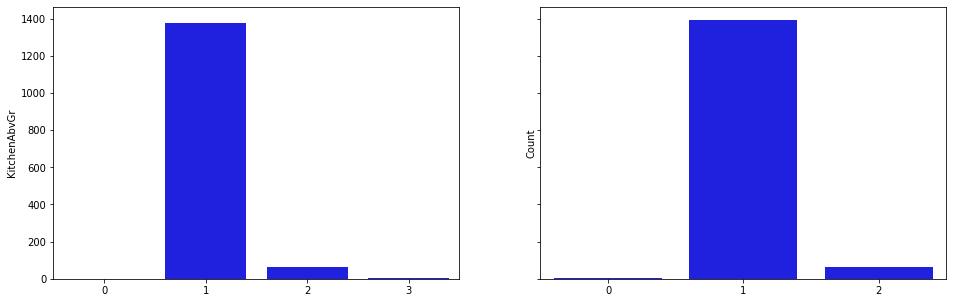

In [214]:
val_plotter('KitchenAbvGr');

Overall Average Sale Price: $179712.85
(shown in red)


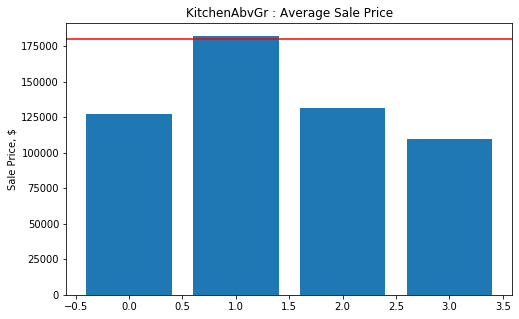

In [215]:
bar_plotter('KitchenAbvGr');

In [216]:
# Since number of kitchens is overwhelmingly 1, and since kitchen count
# does not seem to correlate with SalePrice, this feature is dropped
df = df.drop(columns=['KitchenAbvGr'], axis=1)
fd = fd.drop(columns=['KitchenAbvGr'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Kitchen Qual (Ordinal): Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

NaNs in df: 0
NaNs in fd: 1
value_count() of KitchenQual categories in df, fd


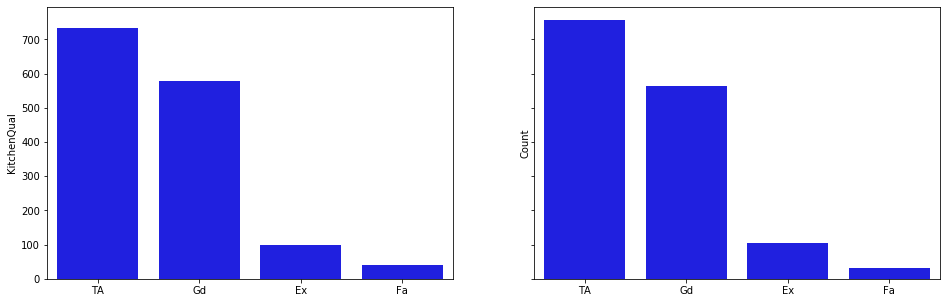

In [217]:
val_plotter('KitchenQual');

In [218]:
fd['KitchenQual'] = fd['KitchenQual'].fillna('TA')

Overall Average Sale Price: $179712.85
(shown in red)


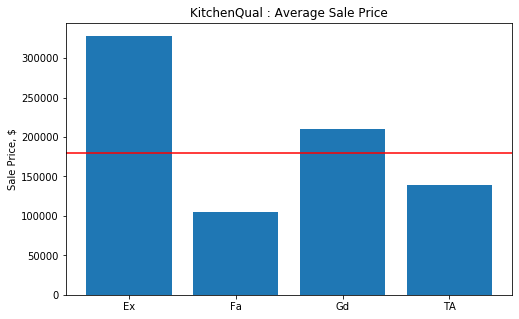

In [219]:
bar_plotter('KitchenQual');

In [220]:
df['KitchenQual'] = df['KitchenQual'].map({'Ex':3,
                                             'Gd':2,
                                             'TA':1,
                                             'Fa':0})
fd['KitchenQual'] = fd['KitchenQual'].map({'Ex':3,
                                             'Gd':2,
                                             'TA':1,
                                             'Fa':0})
shape_tester(df,fd)

Test for shape: Passed


### TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)

NaNs in df: 0
NaNs in fd: 0
value_count() of TotRmsAbvGrd categories in df, fd


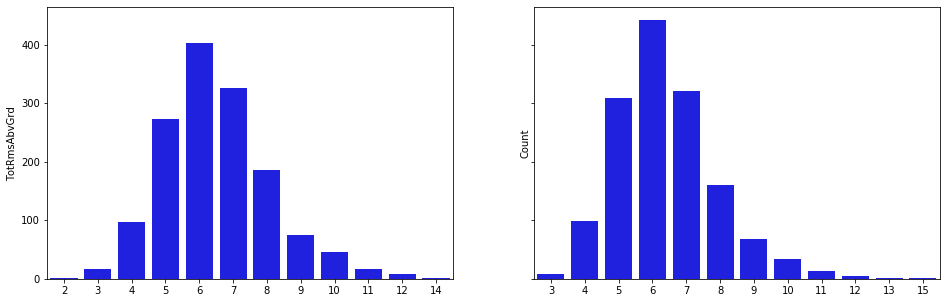

In [221]:
val_plotter('TotRmsAbvGrd');

Overall Average Sale Price: $179712.85
(shown in red)


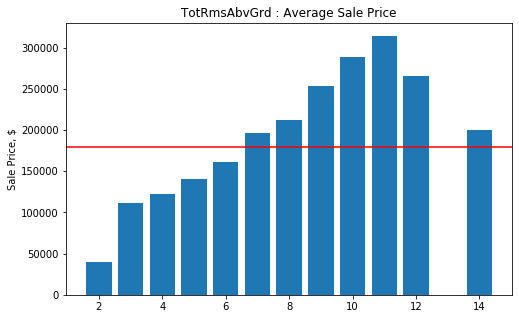

In [222]:
bar_plotter('TotRmsAbvGrd');

count    1447.000000
mean        6.500346
std         1.607329
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

NaNs in fd: 0


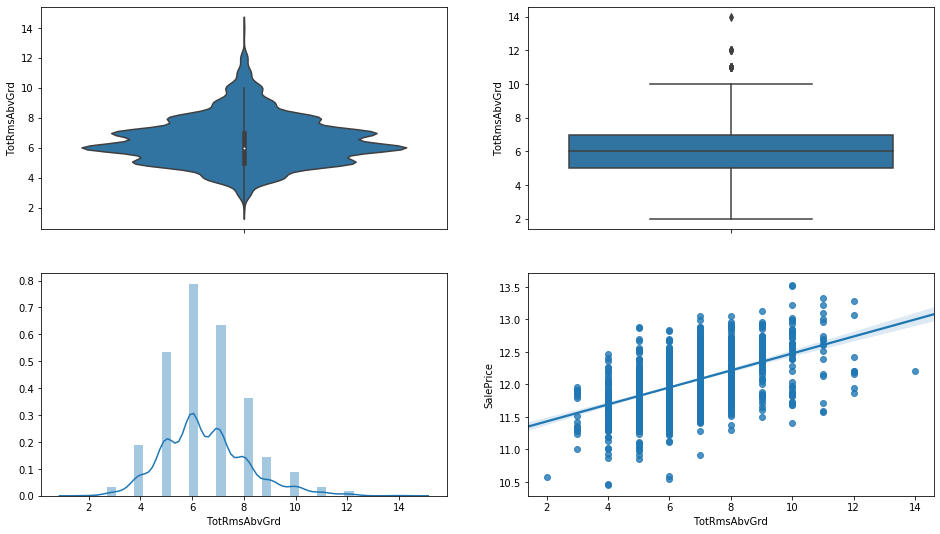

In [223]:
dist_plotter('TotRmsAbvGrd');

### Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

       Typ 	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod 	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev 	Severely Damaged
       Sal 	Salvage only

NaNs in df: 0
NaNs in fd: 2
value_count() of Functional categories in df, fd


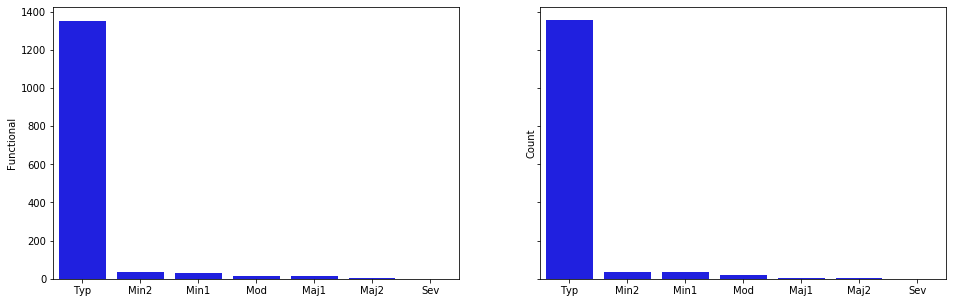

In [224]:
val_plotter('Functional');

In [225]:
fd[fd['Functional'].isnull()]

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtGLQ,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Baths
756,80.0,9.587680,0,3,1,1,5,1952,1952,0.0,...,1,0,0,0.0,0,0,0,1,0,1.0
1013,60.0,9.241839,0,3,2,4,1,1910,1950,0.0,...,0,0,0,0.0,0,1,0,0,0,2.0


In [226]:
fd['Functional'] = fd['Functional'].fillna('missing')

Overall Average Sale Price: $179712.85
(shown in red)


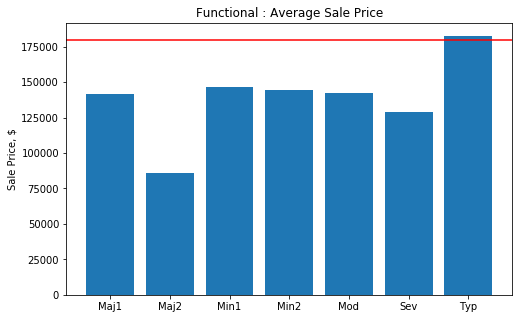

In [227]:
bar_plotter('Functional');

In [228]:
df,fd = series_dummier(df,fd,'Functional')

Categories in TRAIN absent TEST: SalePrice

          Category  NaN count      Mean  Corresponds
0  Functional_Maj1          0  0.008984         True
1  Functional_Maj2          0  0.003455         True
2  Functional_Min1          0  0.021424         True
3  Functional_Min2          0  0.023497         True
4   Functional_Mod          0  0.009675         True
5   Functional_Sev          0  0.000691         True
6   Functional_Typ          0  0.932274         True

Test for shape: Passed


### Fireplaces (Discrete): Number of fireplaces

### Fireplace Qu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

NaNs in df: 0
NaNs in fd: 0
value_count() of Fireplaces categories in df, fd


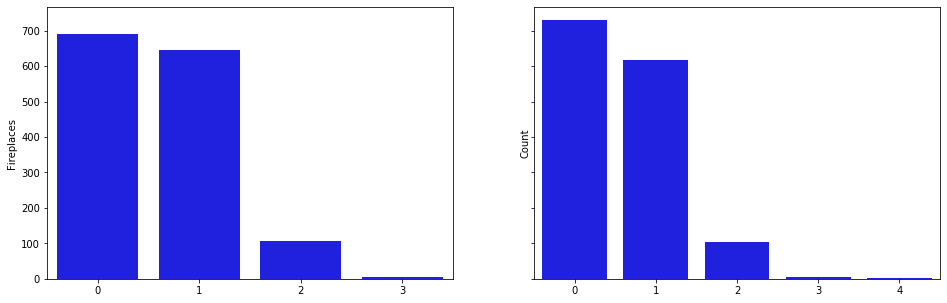

In [229]:
val_plotter('Fireplaces');

Overall Average Sale Price: $179712.85
(shown in red)


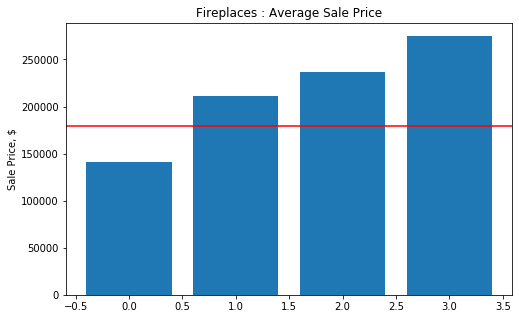

In [230]:
bar_plotter('Fireplaces');

NaNs in df: 690
NaNs in fd: 730
value_count() of FireplaceQu categories in df, fd


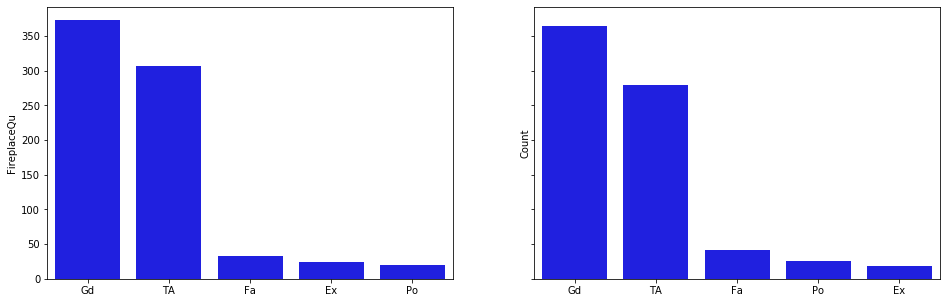

In [231]:
val_plotter('FireplaceQu');

In [232]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('no_fireplace')
fd['FireplaceQu'] = fd['FireplaceQu'].fillna('no_fireplace')

Overall Average Sale Price: $179712.85
(shown in red)


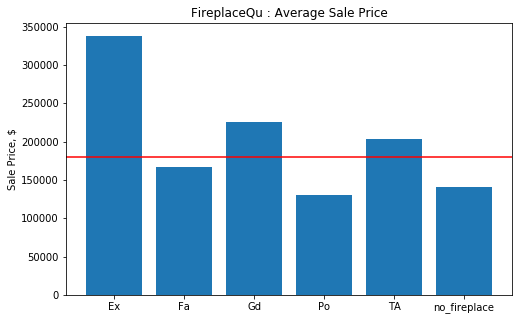

In [233]:
bar_plotter('FireplaceQu');

In [234]:
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex':5,
                                           'Gd':4,
                                           'TA':3,
                                           'Fa':2,
                                           'Po':1,
                                           'no_fireplace':0})
fd['FireplaceQu'] = fd['FireplaceQu'].map({'Ex':5,
                                           'Gd':4,
                                           'TA':3,
                                           'Fa':2,
                                           'Po':1,
                                           'no_fireplace':0})
shape_tester(df,fd)

Test for shape: Passed


### Garage Type (Nominal): Garage location
		
       2Types 	More than one type of garage
       Attchd 	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd 	Detached from home
       NA     	No Garage

NaNs in df: 81
NaNs in fd: 76
value_count() of GarageType categories in df, fd


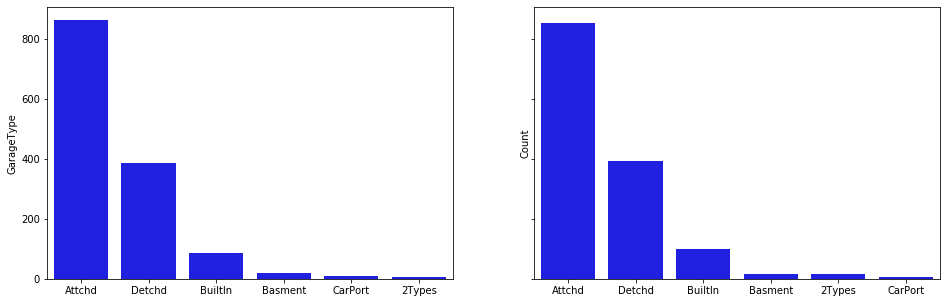

In [235]:
val_plotter('GarageType');

In [236]:
df['GarageType'] = df['GarageType'].fillna('no_garage')
fd['GarageType'] = fd['GarageType'].fillna('no_garage')

Overall Average Sale Price: $179712.85
(shown in red)


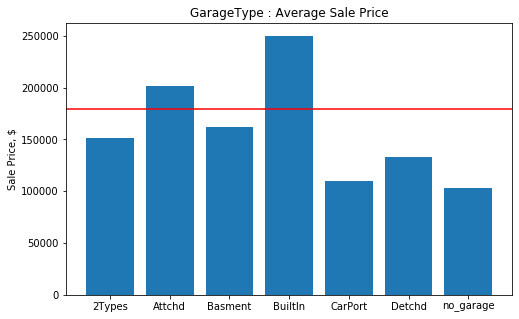

In [237]:
bar_plotter('GarageType');

In [238]:
df,fd = series_dummier(df,fd,'GarageType')

Categories in TRAIN absent TEST: SalePrice

               Category  NaN count      Mean  Corresponds
0     GarageType_2Types          0  0.004147         True
1     GarageType_Attchd          0  0.595715         True
2    GarageType_Basment          0  0.012440         True
3    GarageType_BuiltIn          0  0.059433         True
4    GarageType_CarPort          0  0.006220         True
5     GarageType_Detchd          0  0.266068         True
6  GarageType_no_garage          0  0.055978         True

Test for shape: Passed


### Garage Yr Blt (Discrete): Year garage was built

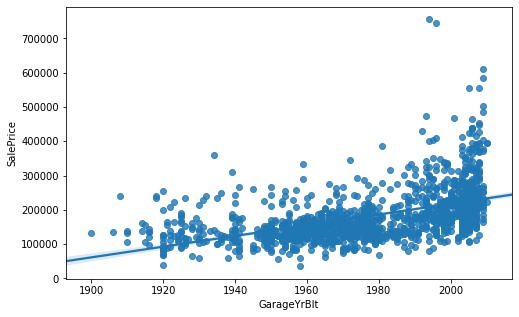

In [239]:
plt.figure(figsize=(8,5))
sns.regplot(x=df[df['GarageYrBlt'].notnull()]['GarageYrBlt'],
                y=df[df['GarageYrBlt'].notnull()]['SalePrice']);

In [240]:
# Imputing values for Garage Yr Blt for garageless properties (NaNs) is problematic.
# Drop Garage Yr Blt feature.

df = df.drop(columns=['GarageYrBlt'], axis=1)
fd = fd.drop(columns=['GarageYrBlt'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Garage Finish (Ordinal)	: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA 	No Garage

NaNs in df: 81
NaNs in fd: 78
value_count() of GarageFinish categories in df, fd


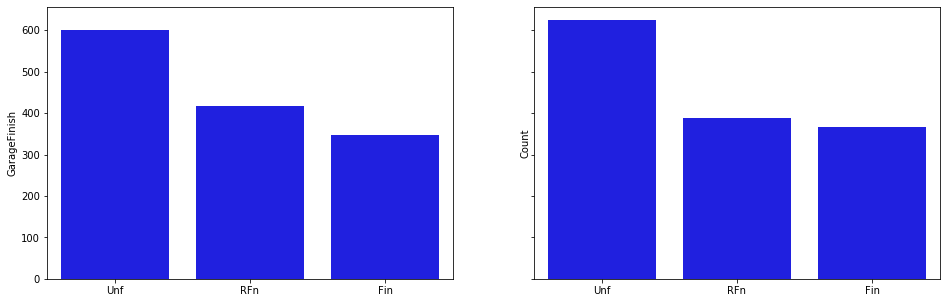

In [241]:
val_plotter('GarageFinish');

In [242]:
df['GarageFinish'] = df['GarageFinish'].fillna('no_garage')
fd['GarageFinish'] = fd['GarageFinish'].fillna('no_garage')

Overall Average Sale Price: $179712.85
(shown in red)


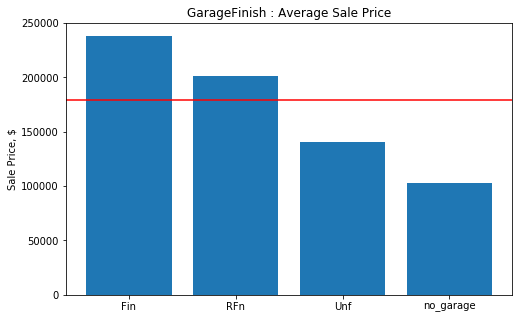

In [243]:
bar_plotter('GarageFinish');

In [244]:
df['GarageFinish'] = df['GarageFinish'].map({'Fin':3,
                                             'RFn':2,
                                             'Unf':1,
                                             'no_garage':0})
fd['GarageFinish'] = fd['GarageFinish'].map({'Fin':3,
                                             'RFn':2,
                                             'Unf':1,
                                             'no_garage':0})
shape_tester(df,fd)

Test for shape: Passed


### Garage Cars (Discrete): Size of garage in car capacity

### Garage Area (Continuous): Size of garage in square feet

#### Since many properties lack garage, number of cars has better scale than garage sqft

In [245]:
df = df.drop(columns=['GarageArea'], axis=1)
fd = fd.drop(columns=['GarageArea'], axis=1)

NaNs in df: 0
NaNs in fd: 1
value_count() of GarageCars categories in df, fd


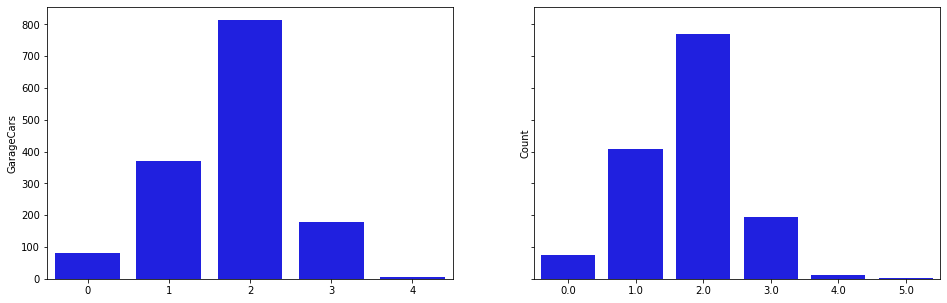

In [246]:
val_plotter('GarageCars');

In [247]:
fd['GarageCars'] = fd['GarageCars'].fillna(0)

Overall Average Sale Price: $179712.85
(shown in red)


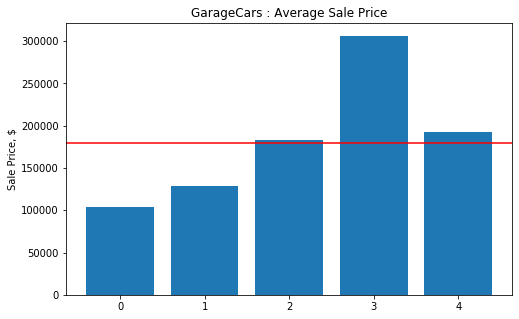

In [248]:
bar_plotter('GarageCars');

### Garage Qual (Ordinal): Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

NaNs in df: 81
NaNs in fd: 78
value_count() of GarageQual categories in df, fd


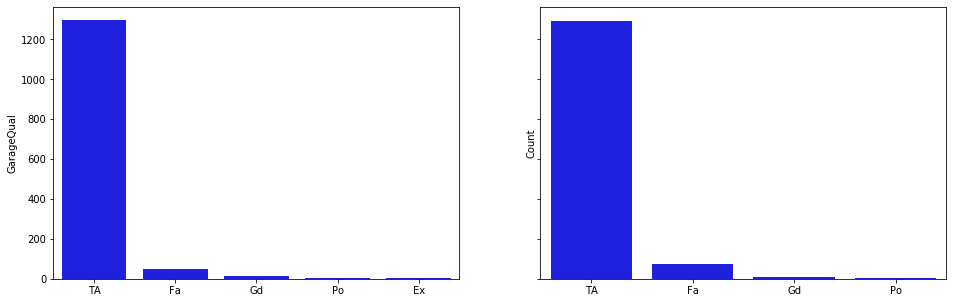

In [249]:
val_plotter('GarageQual');

In [250]:
df['GarageQual'] = df['GarageQual'].fillna('no_garage')
fd['GarageQual'] = fd['GarageQual'].fillna('no_garage')

Overall Average Sale Price: $179712.85
(shown in red)


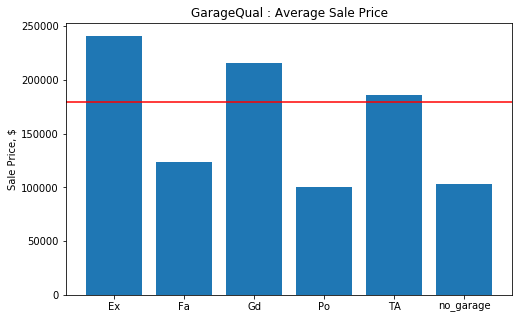

In [251]:
bar_plotter('GarageQual');

In [252]:
df['GarageQual'] = df['GarageQual'].map({'Ex':5,
                                         'Gd':4,
                                         'TA':3,
                                         'Fa':2,
                                         'Po':1,
                                         'no_garage':0})
fd['GarageQual'] = fd['GarageQual'].map({'Ex':5,
                                         'Gd':4,
                                         'TA':3,
                                         'Fa':2,
                                         'Po':1,
                                         'no_garage':0})
shape_tester(df,fd)

Test for shape: Passed


### Garage Cond (Ordinal): Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

NaNs in df: 81
NaNs in fd: 78
value_count() of GarageCond categories in df, fd


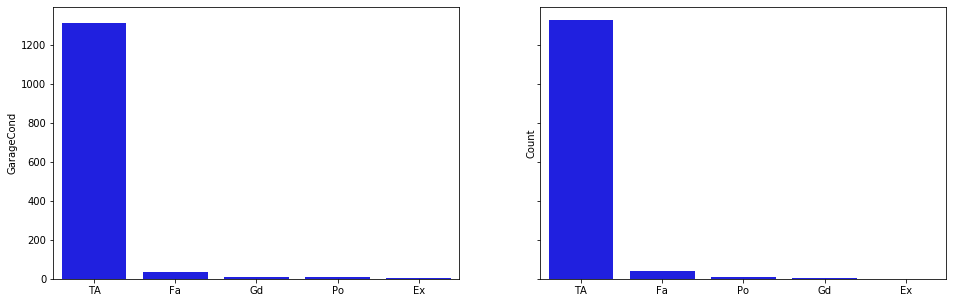

In [253]:
val_plotter('GarageCond');

Overall Average Sale Price: $179712.85
(shown in red)


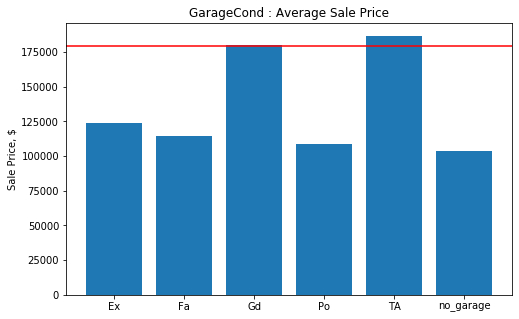

In [254]:
df['GarageCond'] = df['GarageCond'].fillna('no_garage')
fd['GarageCond'] = fd['GarageCond'].fillna('no_garage')

bar_plotter('GarageCond');

In [255]:
df.groupby(df['GarageCond'])['OverallQual'].mean().rename_axis('OverallQual')

OverallQual
Ex           5.500000
Fa           4.828571
Gd           5.888889
Po           5.142857
TA           6.220107
no_garage    4.604938
Name: OverallQual, dtype: float64

In [256]:
df['GarageCond'] = df['GarageCond'].map({'Ex':5,
                                         'Gd':4,
                                         'TA':3,
                                         'Fa':2,
                                         'Po':1,
                                         'no_garage':0})
fd['GarageCond'] = fd['GarageCond'].map({'Ex':5,
                                         'Gd':4,
                                         'TA':3,
                                         'Fa':2,
                                         'Po':1,
                                         'no_garage':0})
shape_tester(df,fd)

Test for shape: Passed


### Paved Drive (Ordinal): Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

NaNs in df: 0
NaNs in fd: 0
value_count() of PavedDrive categories in df, fd


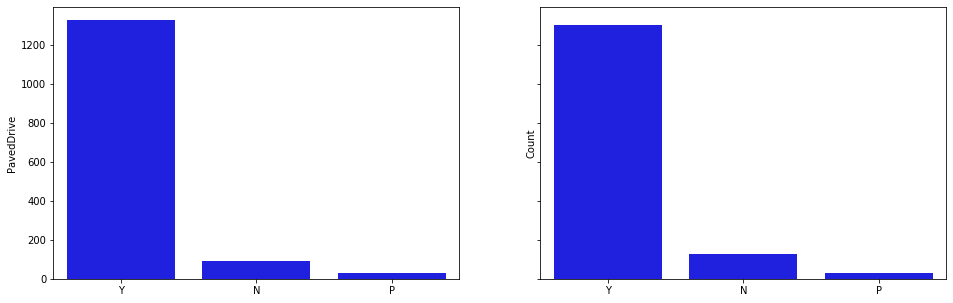

In [257]:
val_plotter('PavedDrive');

Overall Average Sale Price: $179712.85
(shown in red)


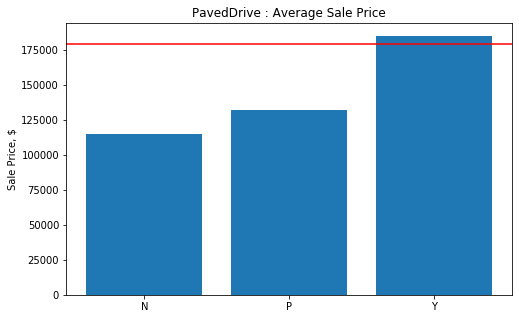

In [258]:
bar_plotter('PavedDrive');

In [259]:
df['PavedDrive'] = df['PavedDrive'].map({'Y':2,
                                         'P':1,
                                         'N':0})
fd['PavedDrive'] = fd['PavedDrive'].map({'Y':2,
                                         'P':1,
                                         'N':0})
shape_tester(df,fd)

Test for shape: Passed


### Wood Deck SF (Continuous): Wood deck area in square feet

### Open Porch SF (Continuous): Open porch area in square feet

### Enclosed Porch (Continuous): Enclosed porch area in square feet

### 3Ssn Porch (Continuous): Three season porch area in square feet

### Screen Porch (Continuous): Screen porch area in square feet

count    1447.000000
mean       93.265377
std       123.740487
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

NaNs in fd: 0


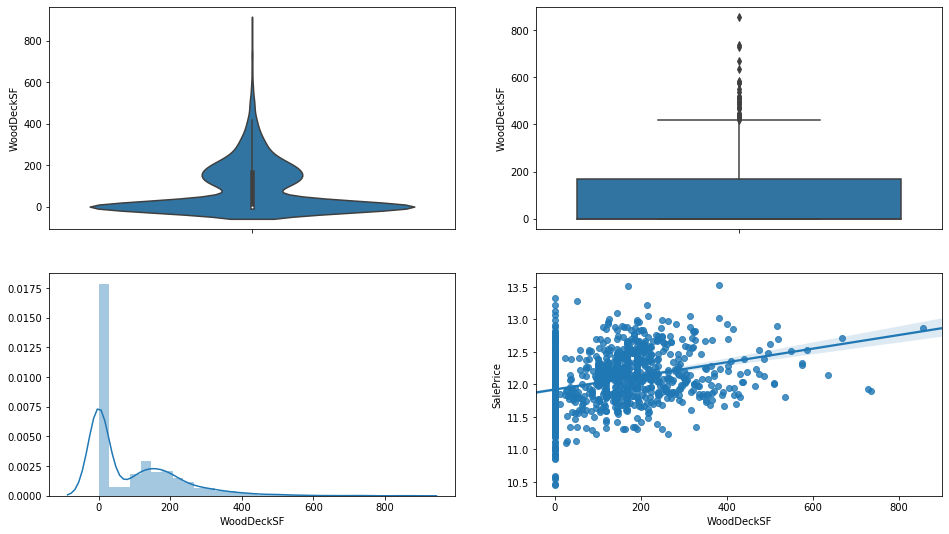

In [260]:
dist_plotter('WoodDeckSF');

count    1447.000000
mean       46.514167
std        66.142504
min         0.000000
25%         0.000000
50%        24.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

NaNs in fd: 0


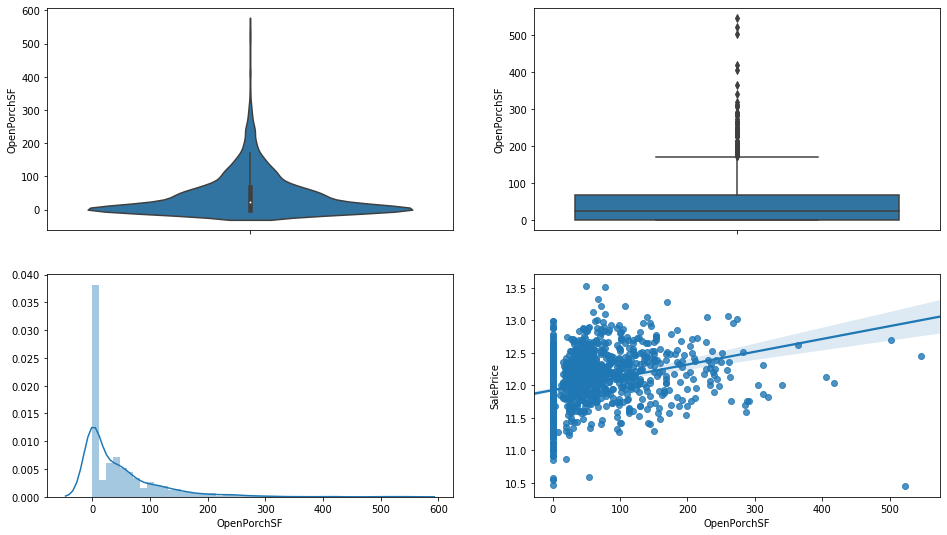

In [261]:
dist_plotter('OpenPorchSF');

count    1447.000000
mean       22.151348
std        61.357656
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

NaNs in fd: 0


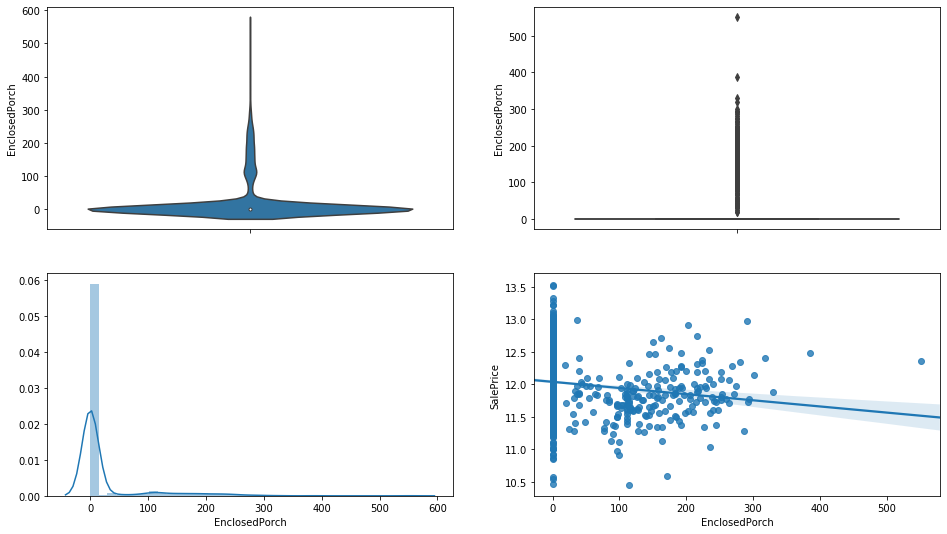

In [262]:
dist_plotter('EnclosedPorch');

count    1447.000000
mean        3.440221
std        29.447031
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

NaNs in fd: 0


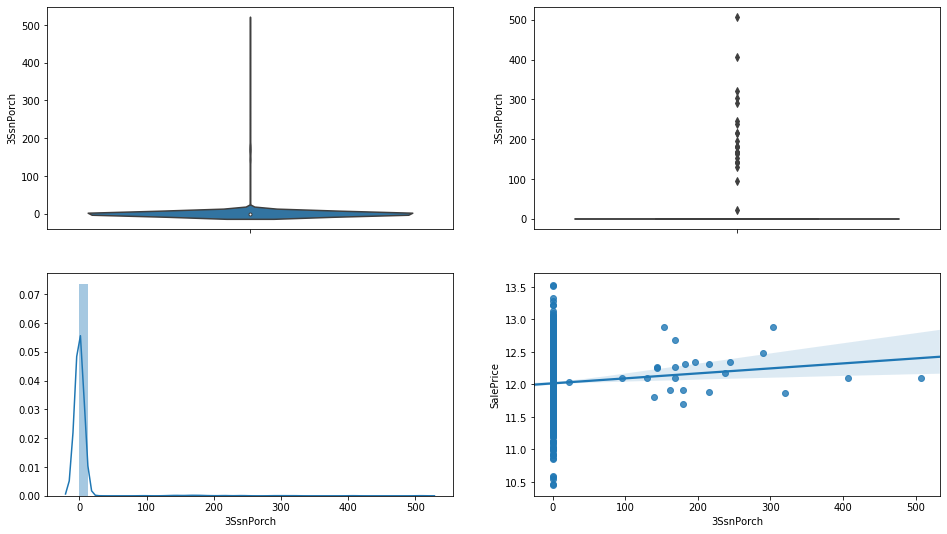

In [263]:
dist_plotter('3SsnPorch');

count    1447.000000
mean       14.753283
std        55.253089
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

NaNs in fd: 0


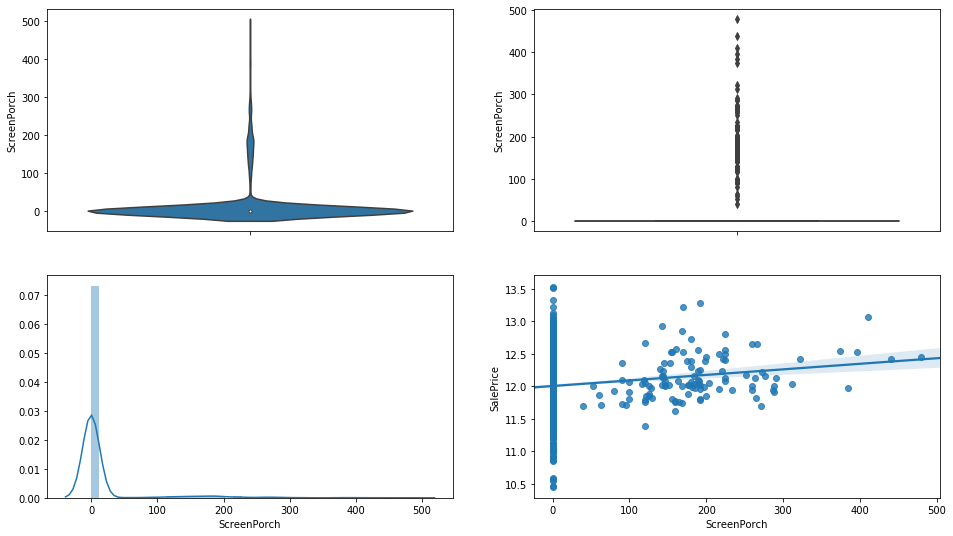

In [264]:
dist_plotter('ScreenPorch');

In [265]:
porch_df = df[['WoodDeckSF',
               'OpenPorchSF',
               'EnclosedPorch',
               '3SsnPorch',
               'ScreenPorch',
               'SalePrice']]

In [266]:
porch_df['TotalPorch'] = df['WoodDeckSF']+df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']

/Users/mikhaillenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [267]:
porch_df.corr()['SalePrice']

WoodDeckSF       0.314846
OpenPorchSF      0.327892
EnclosedPorch   -0.126437
3SsnPorch        0.047581
ScreenPorch      0.107811
SalePrice        1.000000
TotalPorch       0.387961
Name: SalePrice, dtype: float64

#### Since the sum of all porch areas is more highly correlated with price, we use that engineered feature and drop the component features.

In [268]:
df['TotalPorch'] = df['WoodDeckSF']+df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']
fd['TotalPorch'] = fd['WoodDeckSF']+fd['OpenPorchSF']+fd['EnclosedPorch']+fd['3SsnPorch']+fd['ScreenPorch']

df = df.drop(columns=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis=1)
fd = fd.drop(columns=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Pool Area (Continuous): Pool area in square feet

### Pool QC (Ordinal): Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

NaNs in df: 1441
NaNs in fd: 1456
value_count() of PoolQC categories in df, fd


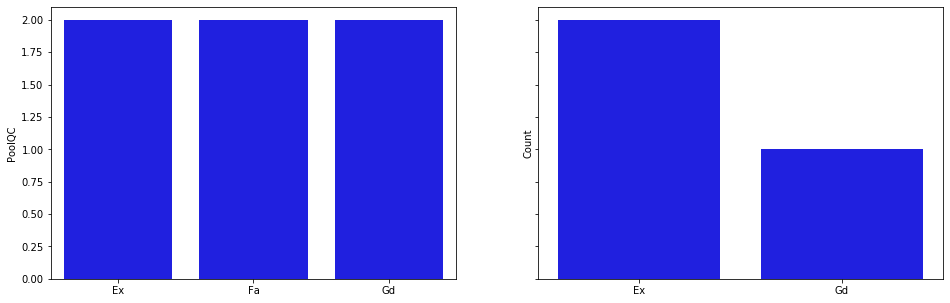

In [269]:
val_plotter('PoolQC');

Overall Average Sale Price: $179712.85
(shown in red)


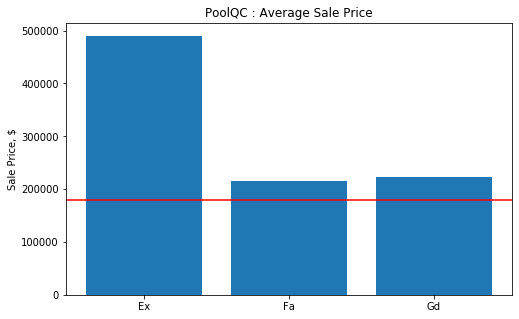

In [270]:
bar_plotter('PoolQC');

#### Since there are so few properties with pools (8 in train, 4 in test), this feature is dropped.

In [271]:
df = df.drop(columns=['PoolArea','PoolQC'], axis=1)
fd = fd.drop(columns=['PoolArea','PoolQC'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo 	Good Wood
       MnWw 	Minimum Wood/Wire
       NA   	No Fence

NaNs in df: 1167
NaNs in fd: 1169
value_count() of Fence categories in df, fd


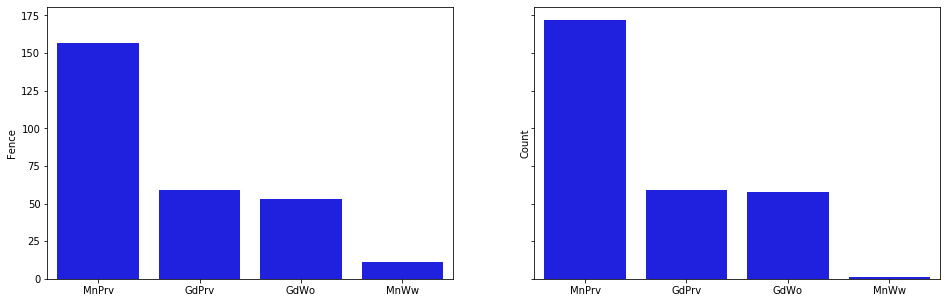

In [272]:
val_plotter('Fence');

In [273]:
df['Fence'] = df['Fence'].fillna('no_fence')
fd['Fence'] = fd['Fence'].fillna('no_fence')

NaNs in df: 0
NaNs in fd: 0
value_count() of Fence categories in df, fd


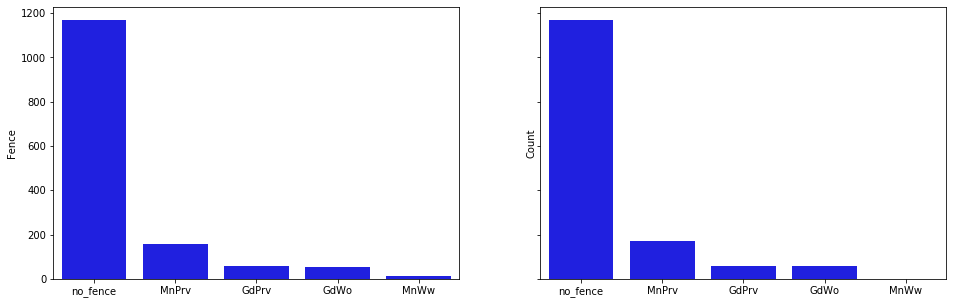

In [274]:
val_plotter('Fence');

Overall Average Sale Price: $179712.85
(shown in red)


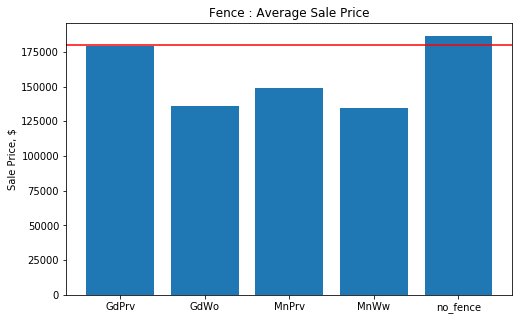

In [275]:
bar_plotter('Fence');

In [276]:
df.groupby(df['Fence'])['OverallQual'].mean().rename_axis('OverallQual')

OverallQual
GdPrv       6.305085
GdWo        5.113208
MnPrv       5.445860
MnWw        5.181818
no_fence    6.215938
Name: OverallQual, dtype: float64

In [277]:
df['Fence'] = df['Fence'].map({'GdPrv':4,
                               'MnPrv':3,
                               'GdWo':2,
                               'MnWw':1,
                               'no_fence':0})
fd['Fence'] = fd['Fence'].map({'GdPrv':4,
                               'MnPrv':3,
                               'GdWo':2,
                               'MnWw':1,
                               'no_fence':0})
shape_tester(df,fd)

Test for shape: Passed


### Misc Feature (Nominal): Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA  	None

NaNs in df: 1395
NaNs in fd: 1408
value_count() of MiscFeature categories in df, fd


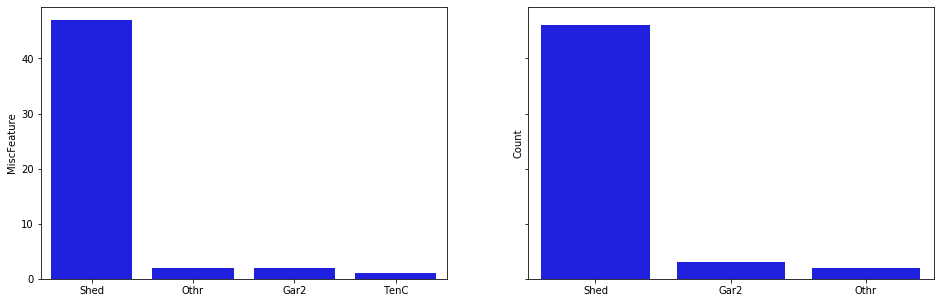

In [278]:
val_plotter('MiscFeature');

In [279]:
df = df.drop(columns=['MiscFeature'], axis=1)
fd = fd.drop(columns=['MiscFeature'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Misc Val (Continuous): $Value of miscellaneous feature

count     1447.000000
mean        43.050449
std        497.889690
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

NaNs in fd: 0


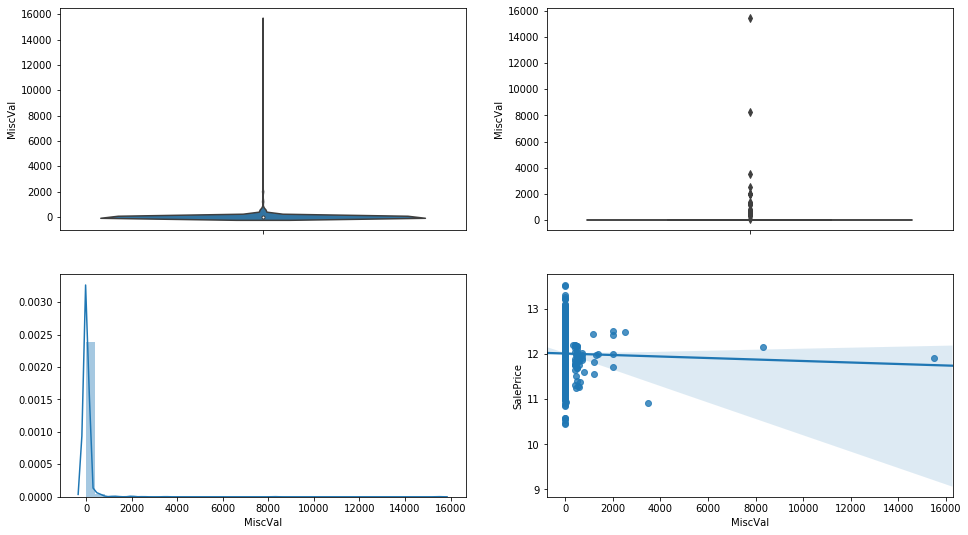

In [280]:
dist_plotter('MiscVal');

In [281]:
# Since this feature is both uncommon and uninformative, it is dropped.
df = df.drop(columns='MiscVal', axis=1)
fd = fd.drop(columns='MiscVal', axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Mo Sold (Discrete): Month Sold (MM)

NaNs in df: 0
NaNs in fd: 0
value_count() of MoSold categories in df, fd


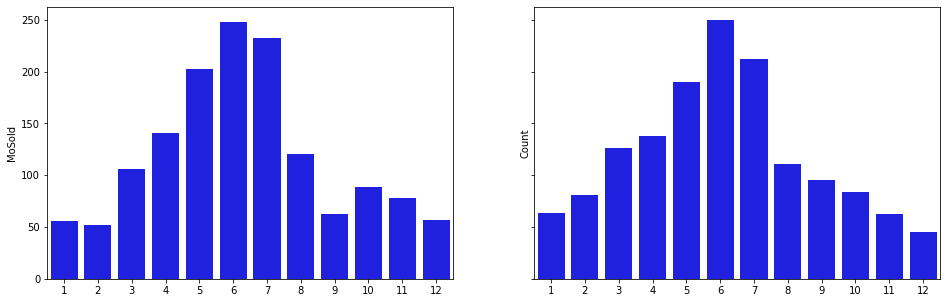

In [282]:
val_plotter('MoSold');

Overall Average Sale Price: $179712.85
(shown in red)


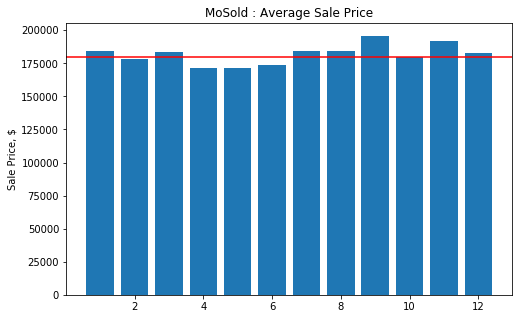

In [283]:
bar_plotter('MoSold');

In [284]:
df,fd = series_dummier(df,fd,'MoSold')

Categories in TRAIN absent TEST: SalePrice

     Category  NaN count      Mean  Corresponds
0    MoSold_1          0  0.038701         True
1    MoSold_2          0  0.035936         True
2    MoSold_3          0  0.073255         True
3    MoSold_4          0  0.097443         True
4    MoSold_5          0  0.140290         True
5    MoSold_6          0  0.171389         True
6    MoSold_7          0  0.161023         True
7    MoSold_8          0  0.083621         True
8    MoSold_9          0  0.043538         True
9   MoSold_10          0  0.061507         True
10  MoSold_11          0  0.053905         True
11  MoSold_12          0  0.039392         True

Test for shape: Passed


### Yr Sold (Discrete): Year Sold (YYYY)

NaNs in df: 0
NaNs in fd: 0
value_count() of YrSold categories in df, fd


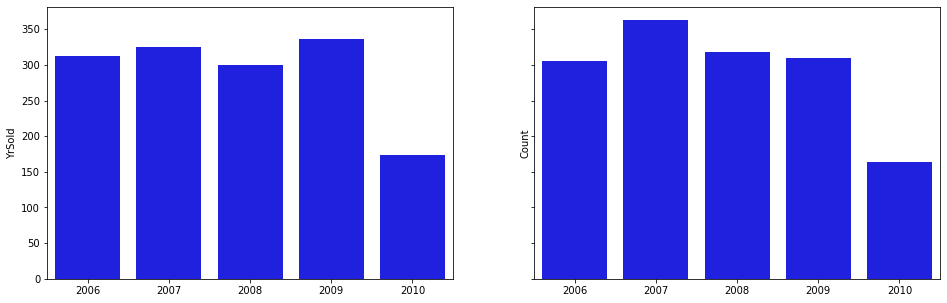

In [285]:
val_plotter('YrSold');

Overall Average Sale Price: $179712.85
(shown in red)


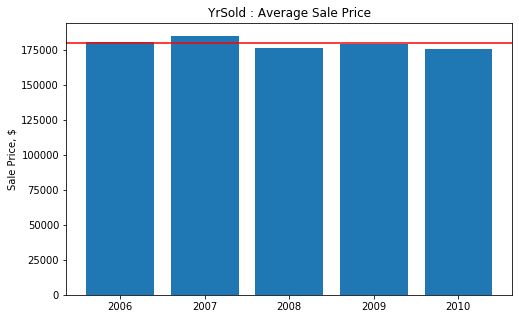

In [286]:
bar_plotter('YrSold');

In [287]:
# Shocking that there seems to be no effect of the '07,'08 recession.
# But, since average prices don't vary with the year of the sale, feature is dropped.
df = df.drop(columns=['YrSold'], axis=1)
fd = fd.drop(columns=['YrSold'], axis=1)

shape_tester(df,fd)

Test for shape: Passed


### Sale Type (Nominal): Type of sale
		
       WD       Warranty Deed - Conventional
       CWD  	Warranty Deed - Cash
       VWD  	Warranty Deed - VA Loan
       New  	Home just constructed and sold
       COD  	Court Officer Deed/Estate
       Con  	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth  	Other

NaNs in df: 0
NaNs in fd: 1
value_count() of SaleType categories in df, fd


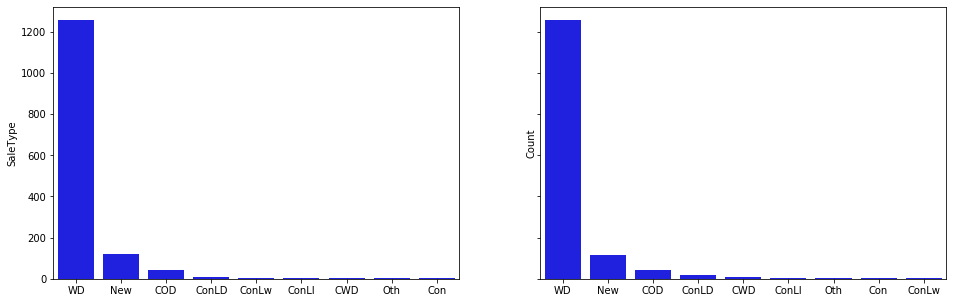

In [288]:
val_plotter('SaleType');

In [289]:
fd['SaleType'] = fd['SaleType'].fillna('WD')

Overall Average Sale Price: $179712.85
(shown in red)


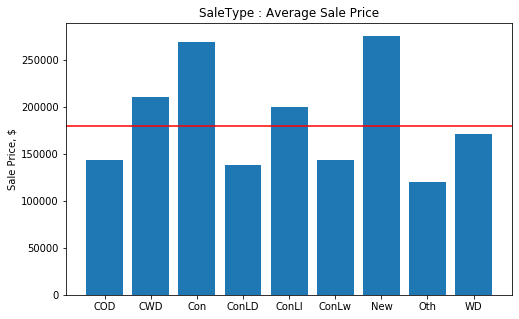

In [290]:
bar_plotter('SaleType');

In [291]:
feature_checker(df,fd,'SaleType')

Categories in TRAIN absent TEST: set()

Categories in TEST absent TRAIN: set()


In [292]:
df,fd = series_dummier(df,fd,'SaleType')

Categories in TRAIN absent TEST: SalePrice

         Category  NaN count      Mean  Corresponds
0    SaleType_COD          0  0.029026         True
1    SaleType_CWD          0  0.002764         True
2    SaleType_Con          0  0.001382         True
3  SaleType_ConLD          0  0.006220         True
4  SaleType_ConLI          0  0.003455         True
5  SaleType_ConLw          0  0.003455         True
6    SaleType_New          0  0.083621         True
7    SaleType_Oth          0  0.002073         True
8     SaleType_WD          0  0.868003         True

Test for shape: Passed


### Sale Condition (Nominal): Condition of sale

       Normal 	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca 	Allocation - two linked properties with separate deeds, typically condo
                    with a garage unit	
       Family 	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

NaNs in df: 0
NaNs in fd: 0
value_count() of SaleCondition categories in df, fd


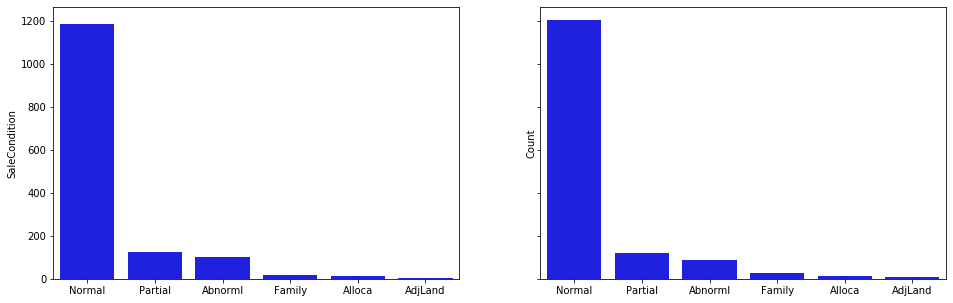

In [293]:
val_plotter('SaleCondition');

Overall Average Sale Price: $179712.85
(shown in red)


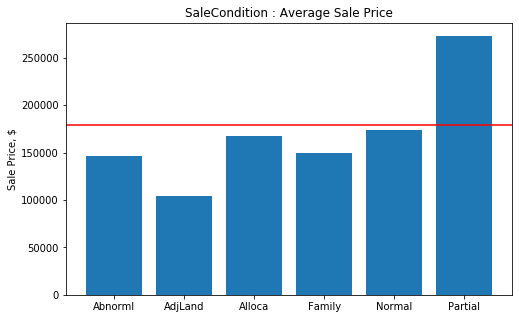

In [294]:
bar_plotter('SaleCondition');

In [295]:
df, fd = series_dummier(df,fd,'SaleCondition')

Categories in TRAIN absent TEST: SalePrice

                Category  NaN count      Mean  Corresponds
0  SaleCondition_Abnorml          0  0.069109         True
1  SaleCondition_AdjLand          0  0.002764         True
2   SaleCondition_Alloca          0  0.008293         True
3   SaleCondition_Family          0  0.013822         True
4   SaleCondition_Normal          0  0.820318         True
5  SaleCondition_Partial          0  0.085695         True

Test for shape: Passed


# Exporting to .csv

In [296]:
df.to_csv('./data/df.csv', index=False)
fd.to_csv('./data/fd.csv', index=False)